<div style="background-color: ##000080;font-weight:bold;font-family:segoe ui;font-size:20px;color:white;padding:10px;line-height:1.3;text-align:left;border-radius: 10px;">
<div align="center">
Pós-graduação Lato Sensu em Ciência de Dados e Big Data - PUC MG
</div>

## Apresentação dos Resultados

In [1]:
# Carregando Bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Formatando impressão de Array Numpy
np.set_printoptions(precision=4, suppress=True) 
# Formatando impressão de numeros no Pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [3]:
# Instalando Biblioteca de Visualização
!pip install sweetviz   

In [4]:
import sweetviz as sv

In [5]:
# Carregando base utilizada na criação do modelo de Machine Learning
df_kmeans = pd.read_csv('tcc_conformidade_3.csv', dtype={'setor_cod': 'string',
                                                       'cnae_classe': 'string',
                                                       'impacto': 'string'})

In [6]:
# Carregando clusters (labels) gerados pelo modelo Kmeans
kmeans_cl = np.fromfile('kmeans_label.txt',dtype='int8', sep=';')

In [7]:
# Concatenando o Dataset com os labels dos Clusters
df_kmeans = pd.concat([df_kmeans,pd.DataFrame(kmeans_cl,columns=['cluster'])], axis=1)
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   setor_cod              8392 non-null   string 
 1   cnae_classe            8392 non-null   string 
 2   obrigacoes_acessorias  8392 non-null   float64
 3   obrigacao_principal    8392 non-null   float64
 4   atuacao_fiscal         8392 non-null   float64
 5   analise_comparativa    8392 non-null   float64
 6   consistencia           8392 non-null   float64
 7   comercio_exterior      8392 non-null   float64
 8   conformidade           8392 non-null   float64
 9   impacto                8392 non-null   string 
 10  cluster                8392 non-null   int8   
dtypes: float64(7), int8(1), string(3)
memory usage: 663.9 KB


In [8]:
# Separando o Dataset por Cluster atribuído a cada registro
df_kmeans_cl0 = df_kmeans.loc[df_kmeans['cluster'] == 0]
df_kmeans_cl1 = df_kmeans.loc[df_kmeans['cluster'] == 1] 
df_kmeans_cl2 = df_kmeans.loc[df_kmeans['cluster'] == 2]  
df_kmeans_cl3 = df_kmeans.loc[df_kmeans['cluster'] == 3]
df_kmeans_cl4 = df_kmeans.loc[df_kmeans['cluster'] == 4] 

print('Cluster 0 - {:,} registros - {:.2f}%'.format(df_kmeans_cl0.shape[0],df_kmeans_cl0.shape[0]/df_kmeans.shape[0]*100))
print('Cluster 1 - {:,} registros - {:.2f}%'.format(df_kmeans_cl1.shape[0],df_kmeans_cl1.shape[0]/df_kmeans.shape[0]*100))
print('Cluster 2 - {:,} registros - {:.2f}%'.format(df_kmeans_cl2.shape[0],df_kmeans_cl2.shape[0]/df_kmeans.shape[0]*100))
print('Cluster 3 - {:,} registros - {:.2f}%'.format(df_kmeans_cl3.shape[0],df_kmeans_cl3.shape[0]/df_kmeans.shape[0]*100))
print('Cluster 4 - {:,} registros - {:.2f}%'.format(df_kmeans_cl4.shape[0],df_kmeans_cl4.shape[0]/df_kmeans.shape[0]*100))

Cluster 0 - 2,479 registros - 29.54%
Cluster 1 - 704 registros - 8.39%
Cluster 2 - 1,698 registros - 20.23%
Cluster 3 - 2,307 registros - 27.49%
Cluster 4 - 1,204 registros - 14.35%


In [9]:
def plot_pizza(dataset,coluna,titulo,n_items=7):
  df = dataset.groupby(by=[coluna]).count().sort_values(by='cluster', ascending=False)

  codigos = []
  qtd = []
  if len(df) > n_items:    
    tot_outros = df['cluster'].iloc[n_items-1]
    for i in range(0,len(df)):
      codigos.append(df.index[i])
      qtd.append(df['cluster'].iloc[i])
      if i > n_items-1:
        tot_outros += df['cluster'].iloc[i]
    
    codigos[n_items-1] = 'Outros'
    qtd[n_items-1] = tot_outros
 
    df = pd.DataFrame(list(zip(codigos[:n_items],qtd[:n_items])), columns= [coluna,'cluster'])
    df.set_index(coluna, inplace=True)
  
  explode = (0.1,0.1)
  for i in range(2,len(df)):
    if i > (n_items-4):
      explode = explode + (0,)
    else:
      explode = explode + (0.1,)
  df['cluster'].plot(kind='pie', title=titulo, ylabel='', autopct='%1.0f%%', explode=None)

In [10]:
# Analisando Cluster 0
df_kmeans_cl0.describe()

obrigacoes_acessorias  obrigacao_principal  atuacao_fiscal  \
count              2479.0000            2479.0000       2479.0000   
mean                  0.9195               0.9510          0.9726   
std                   0.0817               0.0655          0.0576   
min                   0.3636               0.6669          0.6000   
25%                   0.8846               0.9239          0.9833   
50%                   0.9434               0.9816          1.0000   
75%                   0.9817               0.9998          1.0000   
max                   1.0000               1.0000          1.0000   

       analise_comparativa  consistencia  comercio_exterior  conformidade  \
count            2479.0000     2479.0000          2479.0000     2479.0000   
mean                0.5597        0.9235             0.9878        0.9102   
std                 0.1025        0.0521             0.0326        0.0300   
min                 0.1111        0.7722             0.8403        0.8026   
25%                 0.4444        0.8918             1.0000        0.8915   
50%                 0.5556        0.9337             1.0000        0.9140   
75%                 0.6667        0.9643             1.0000        0.9324   
max                 1.0000        1.0000             1.0000        0.9976   

        cluster  
count 2479.0000  
mean     0.0000  
std      0.0000  
min      0.0000  
25%      0.0000  
50%      0.0000  
75%      0.0000  
max      0.0000

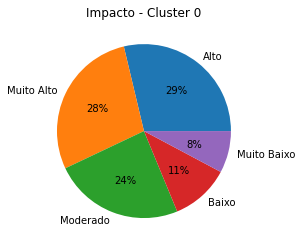

In [11]:
plot_pizza(df_kmeans_cl0, 'impacto', 'Impacto - Cluster 0', 5)

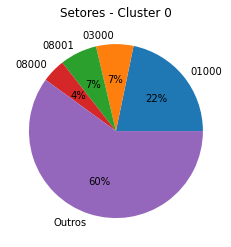

In [12]:
plot_pizza(df_kmeans_cl0, 'setor_cod', 'Setores - Cluster 0', 5)

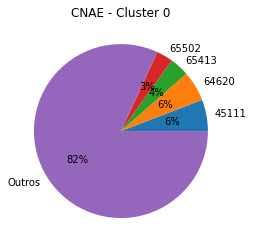

In [13]:
plot_pizza(df_kmeans_cl0, 'cnae_classe', 'CNAE - Cluster 0', 5)


Report Rais_kmeans0.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



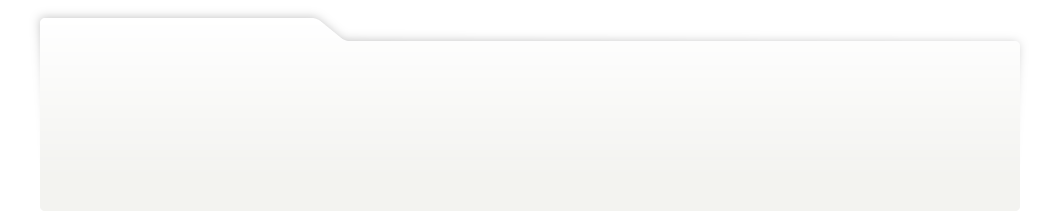
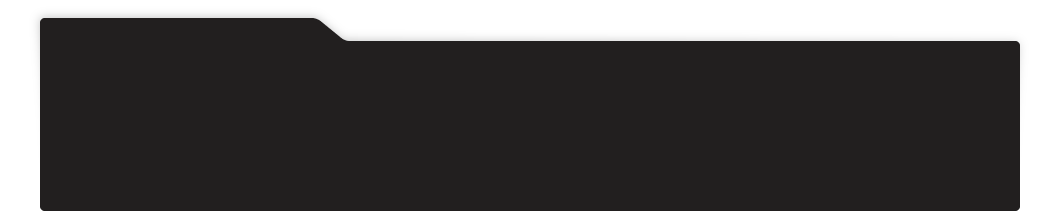
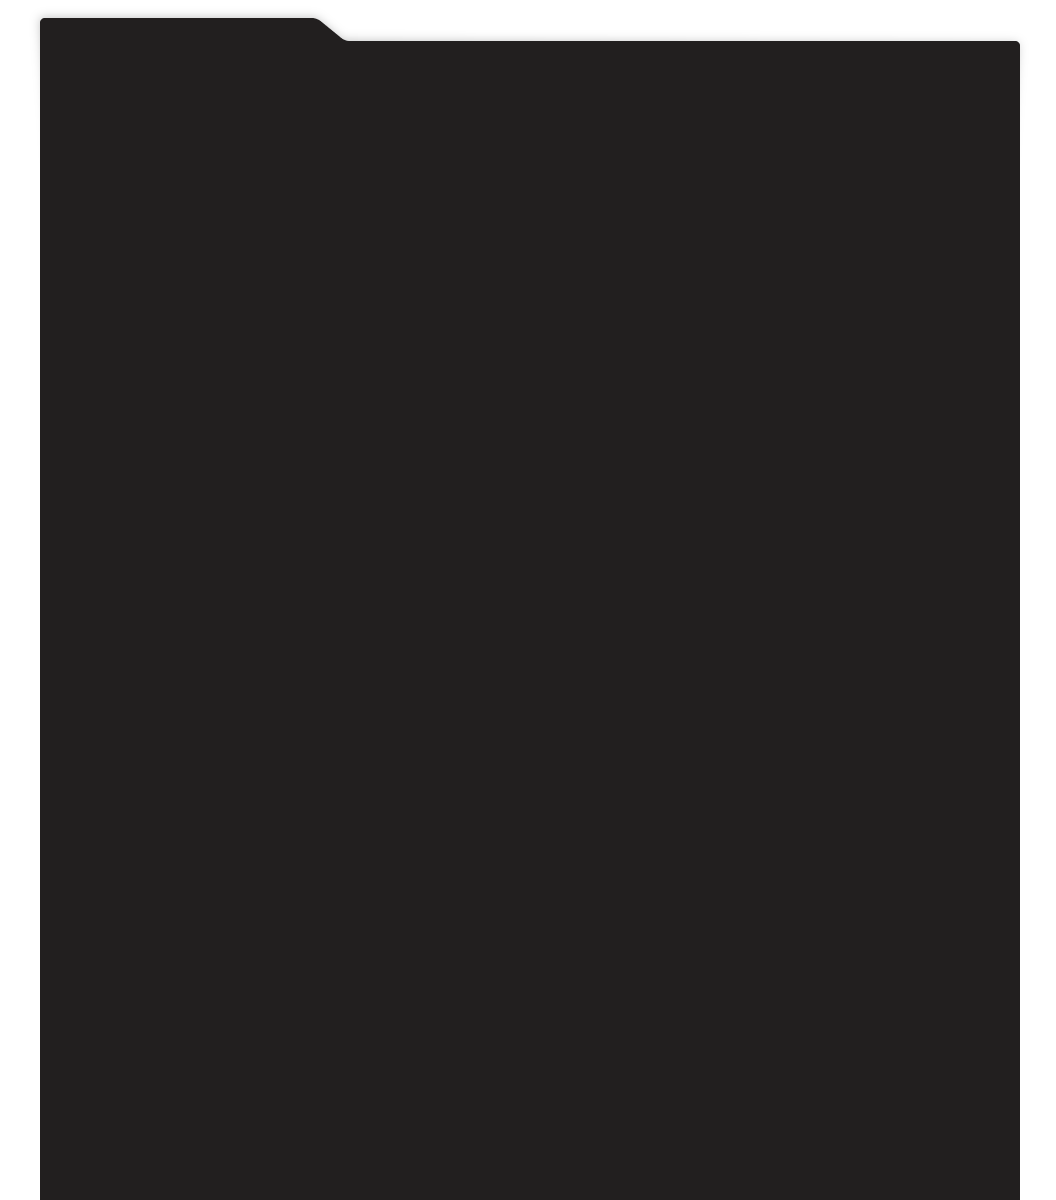
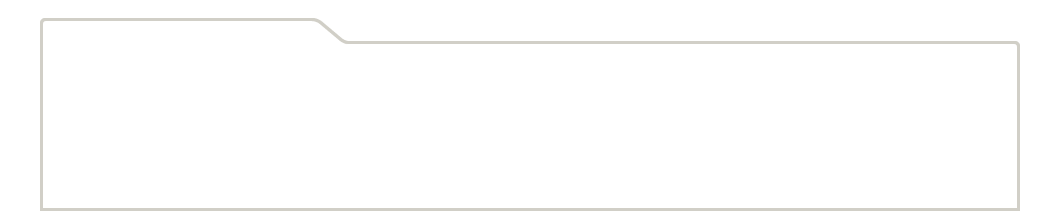
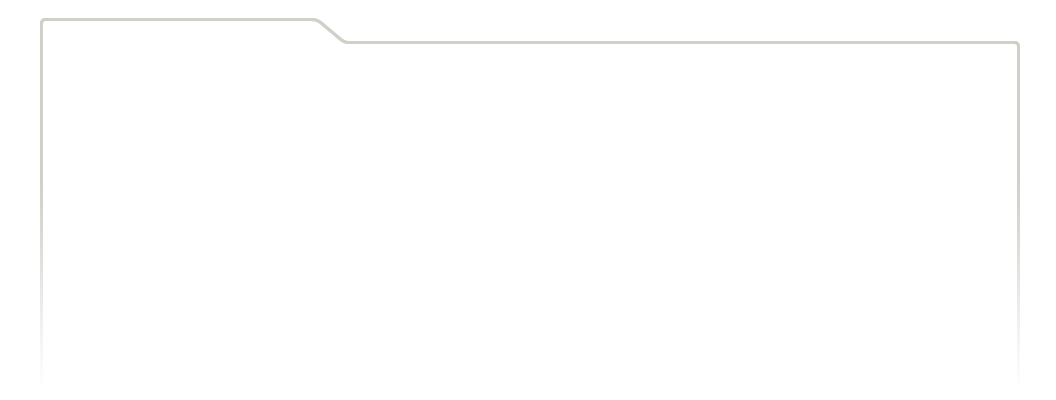
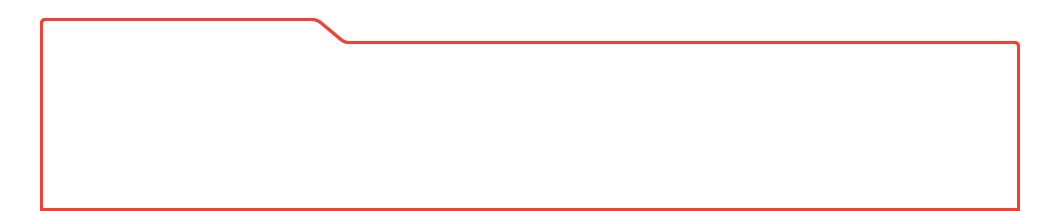
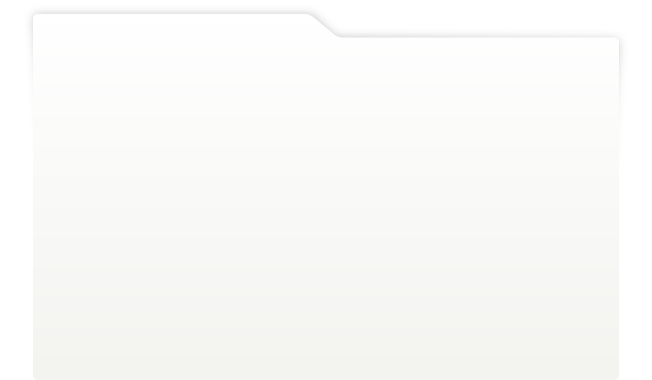
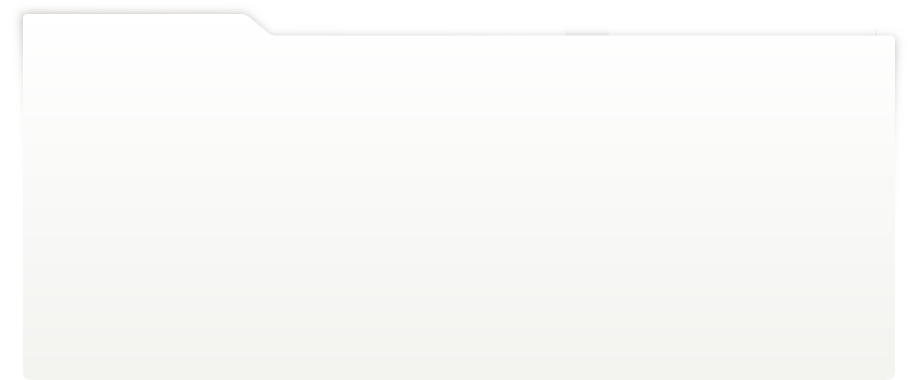
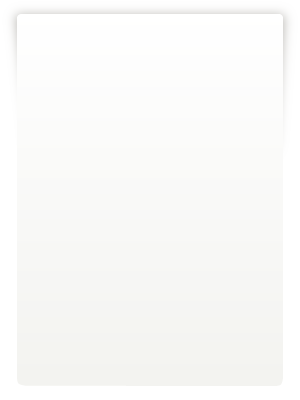
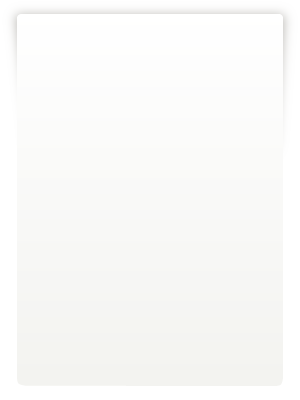
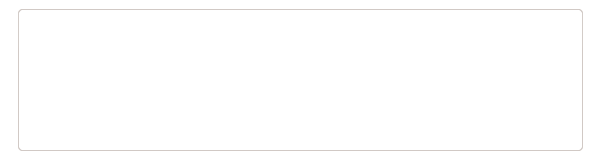
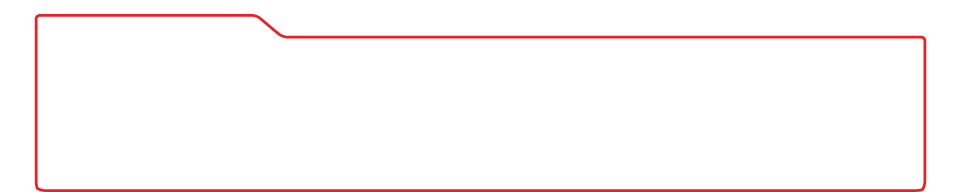
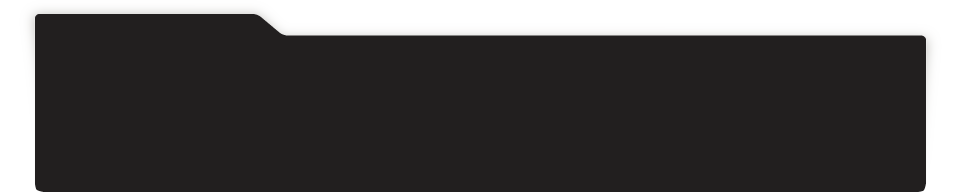
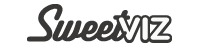
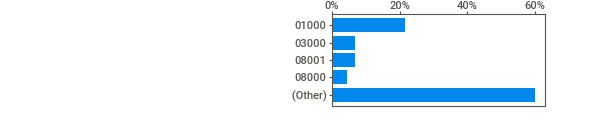
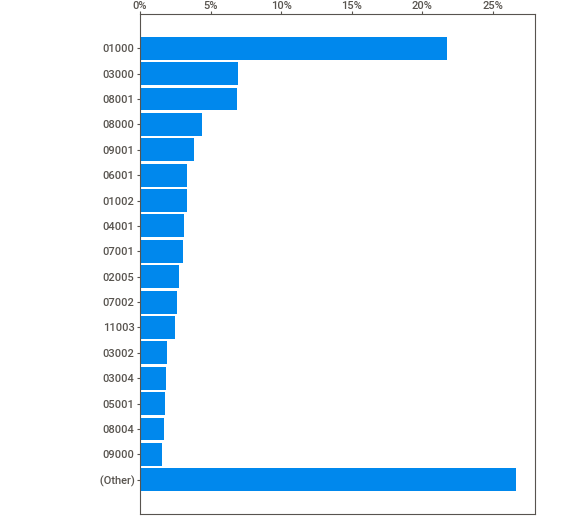
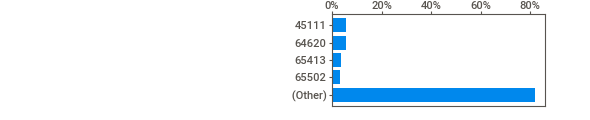
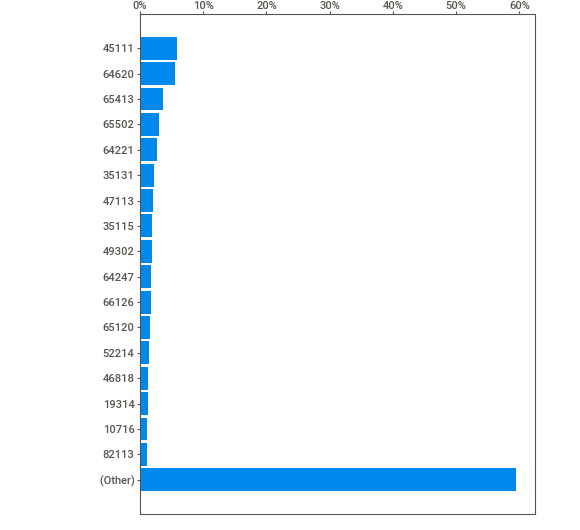
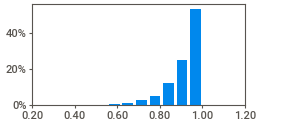
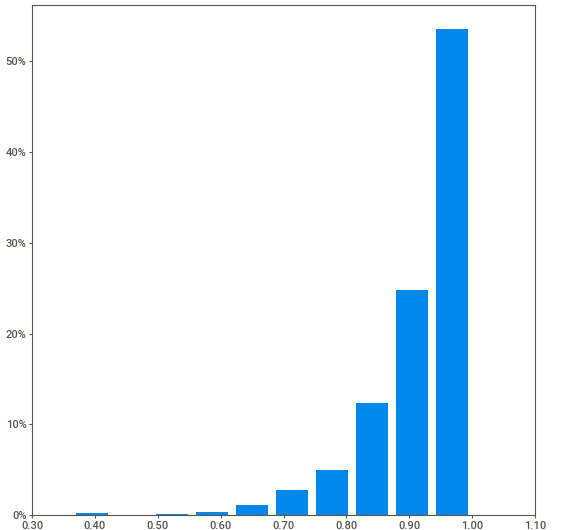
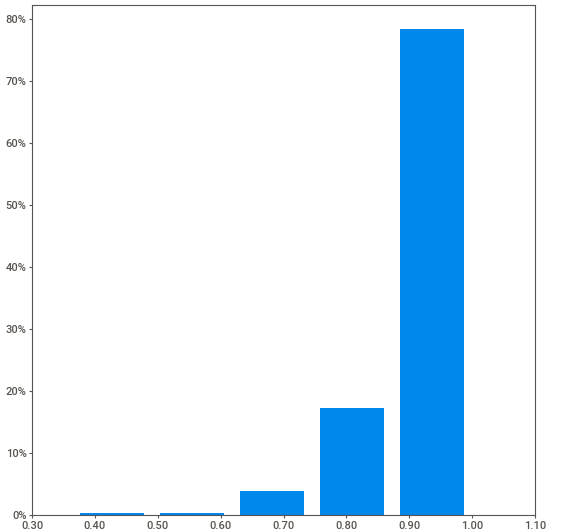
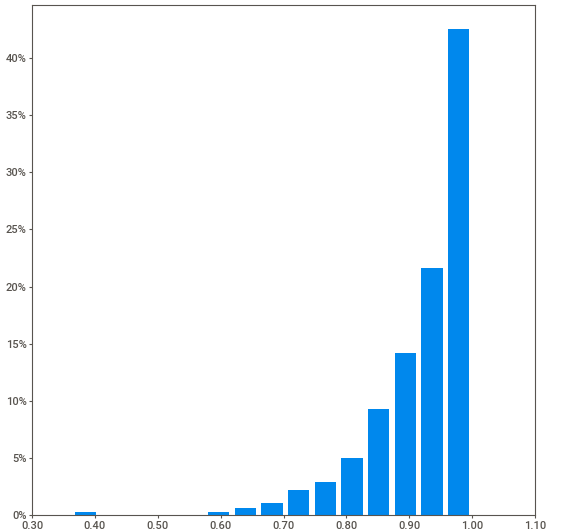
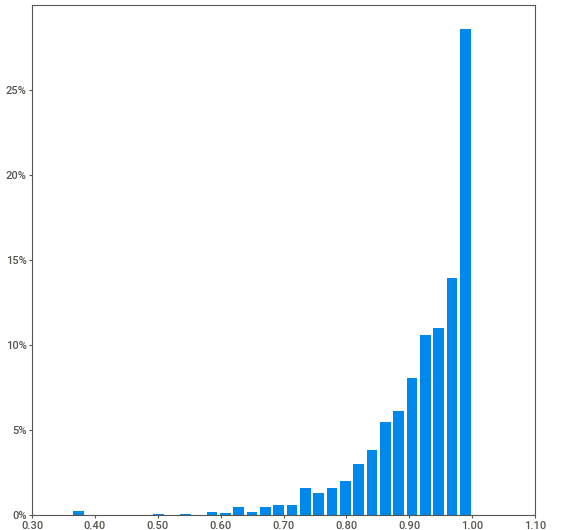
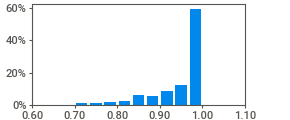
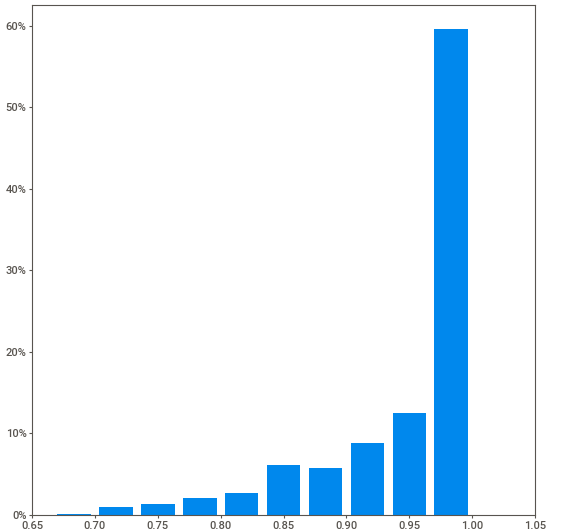
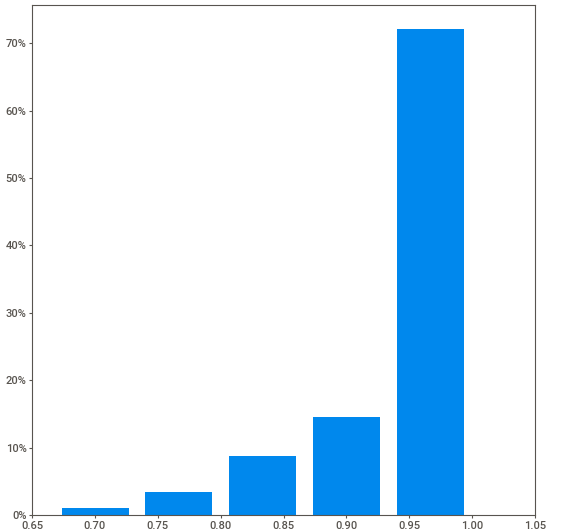
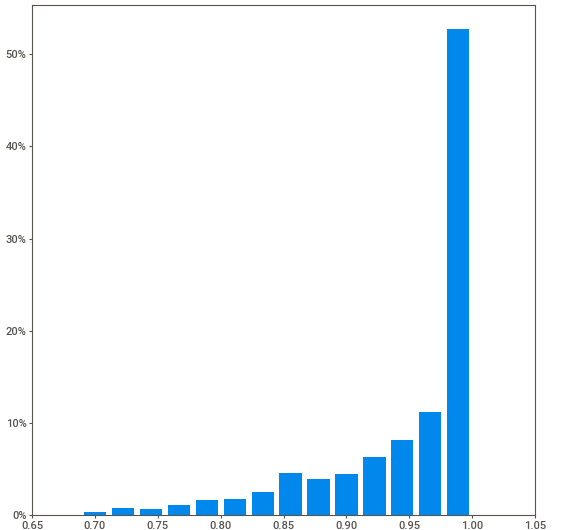
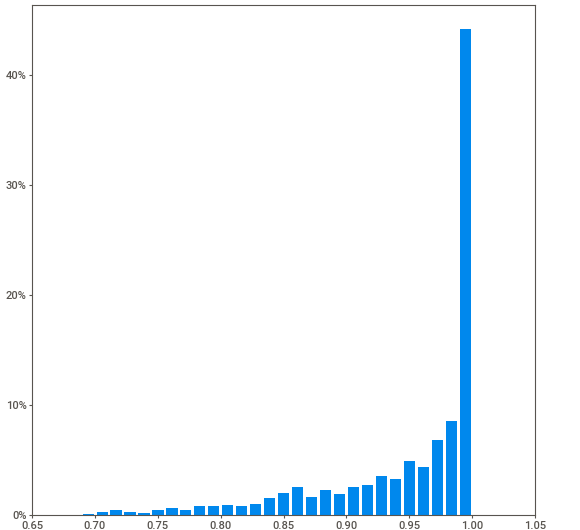
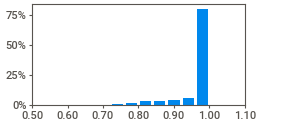
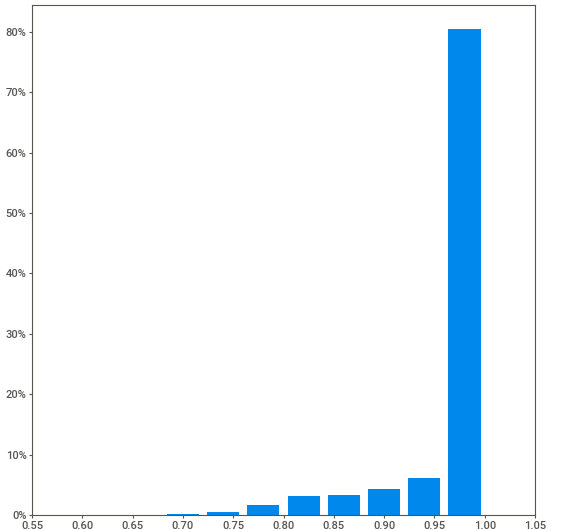
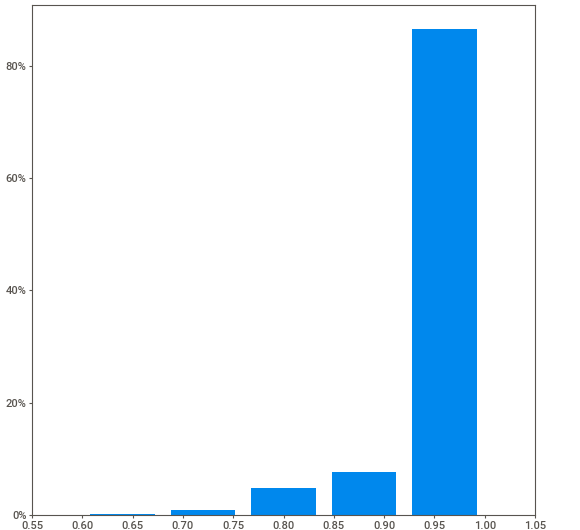
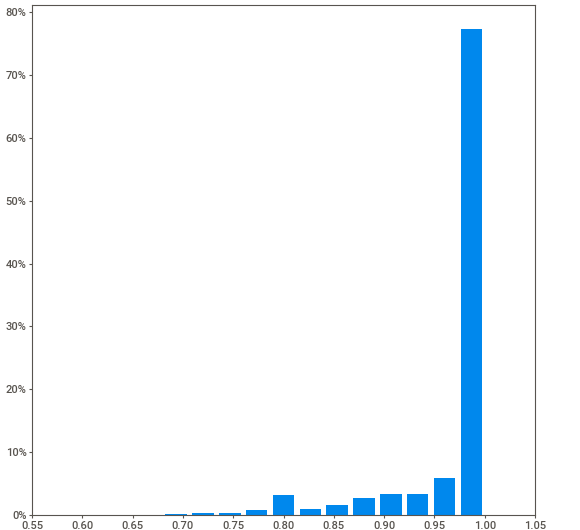
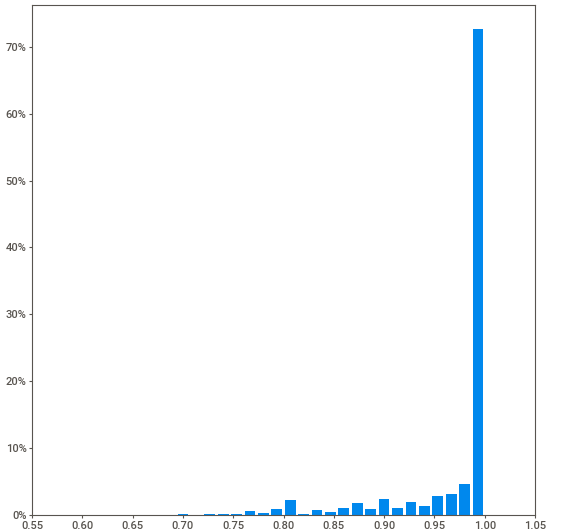
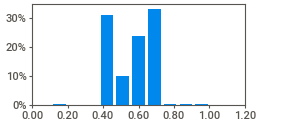
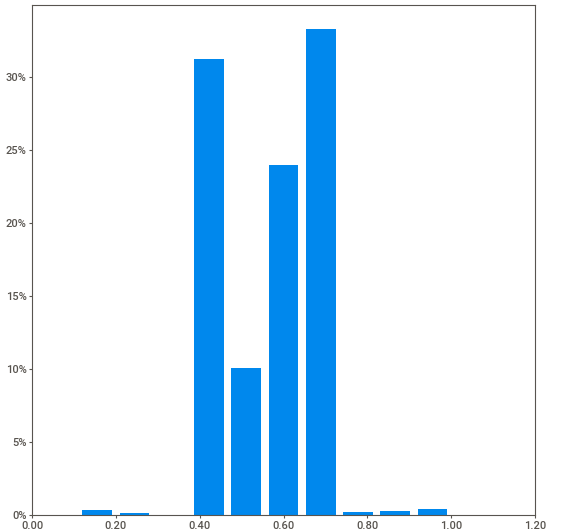
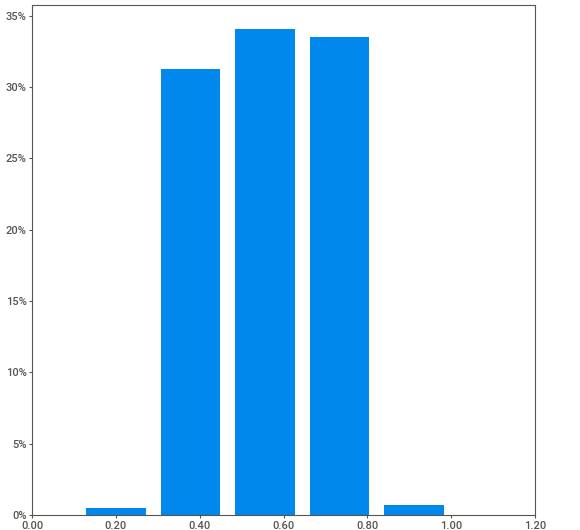
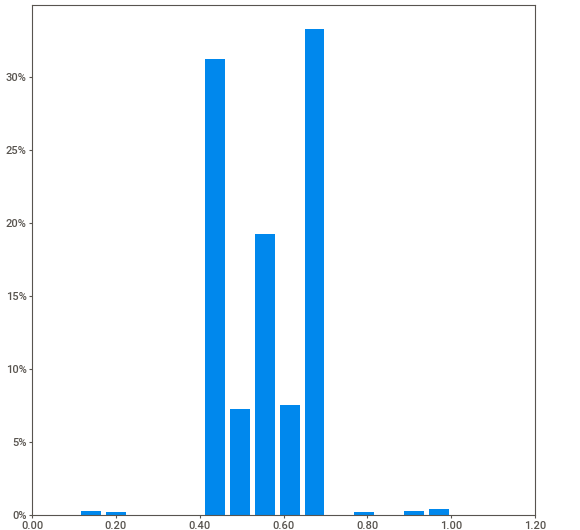
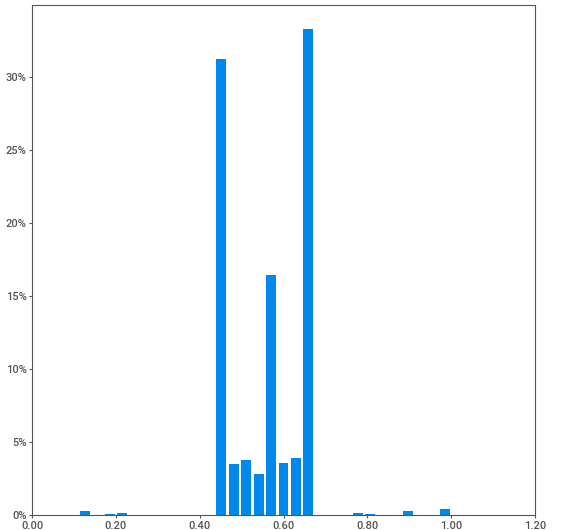
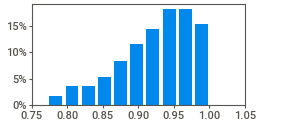
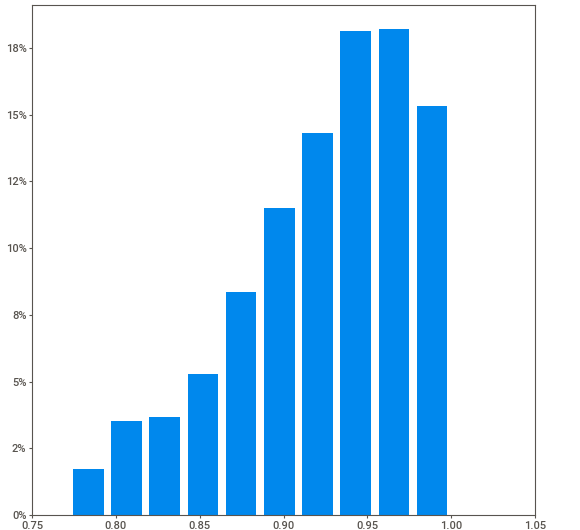
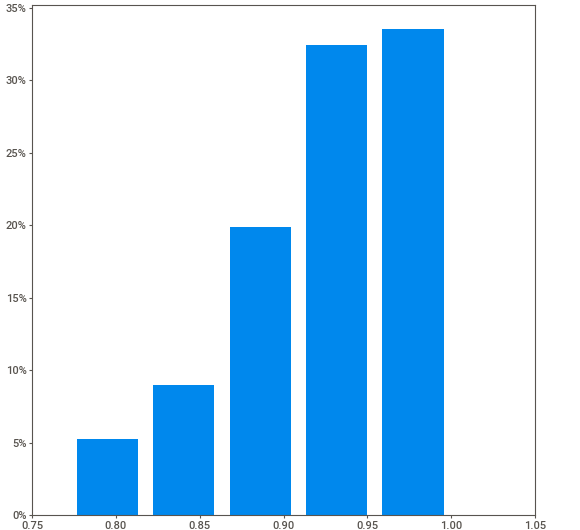
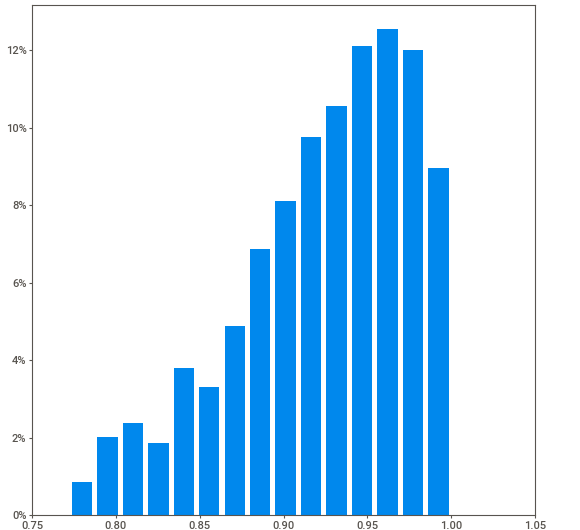
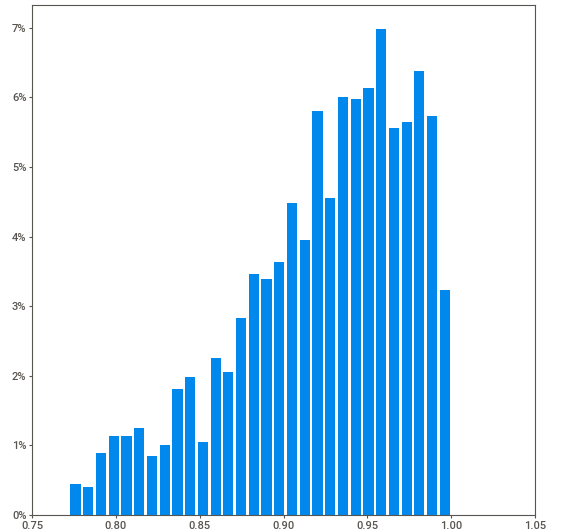
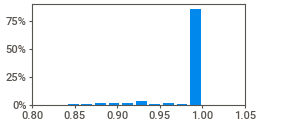
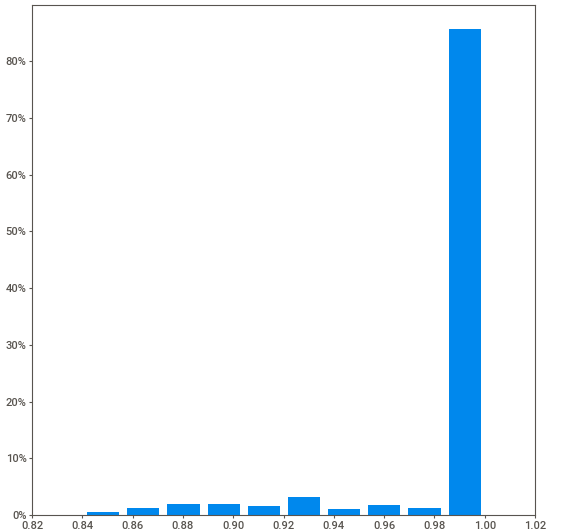
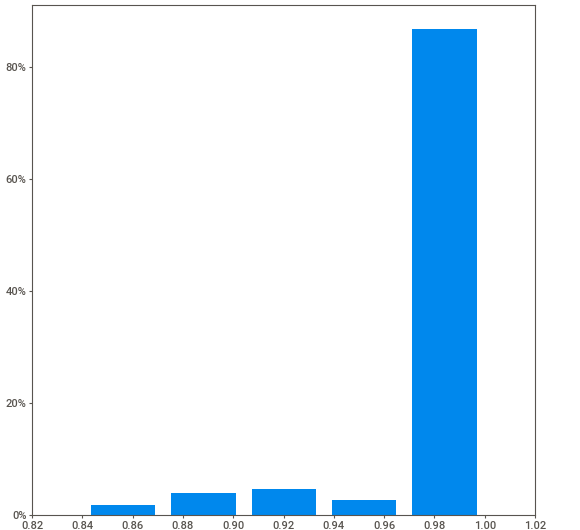
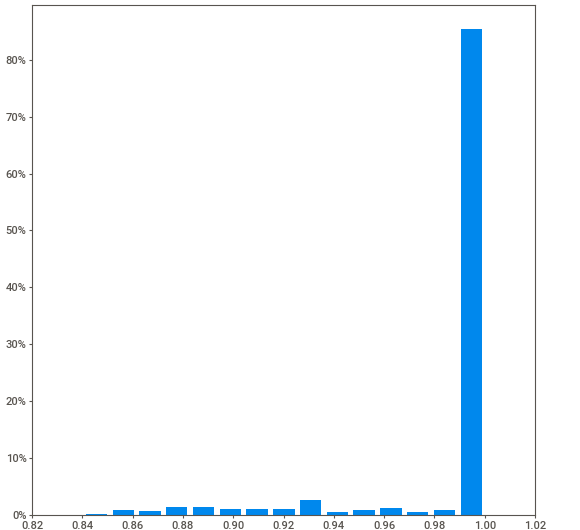
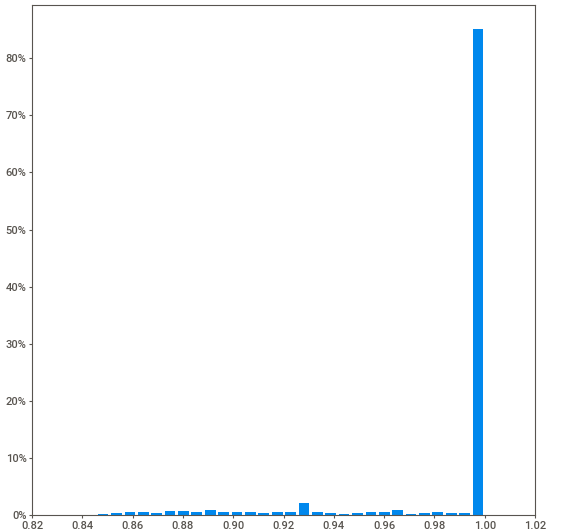
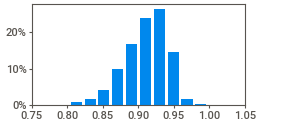
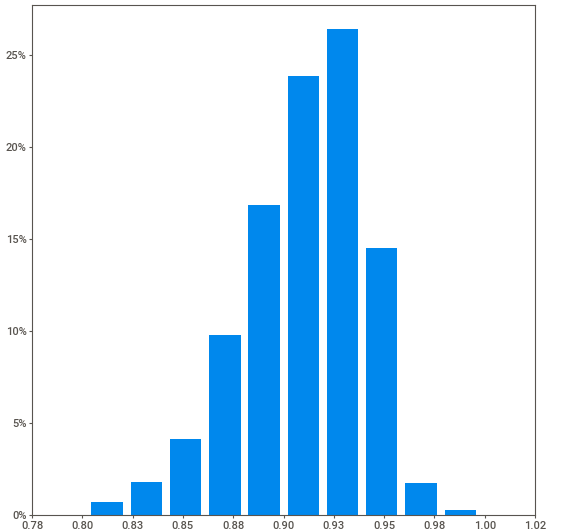
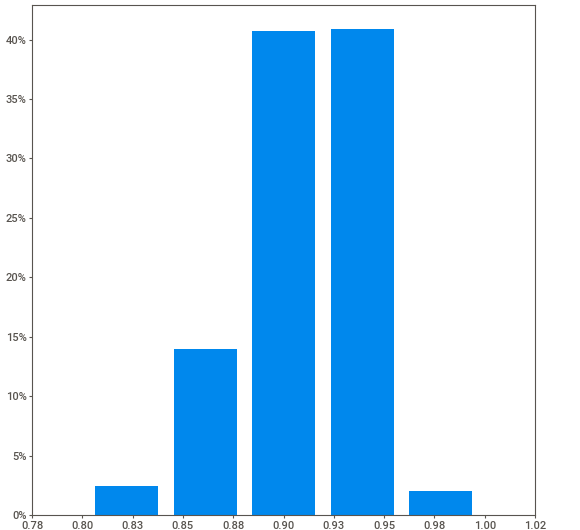
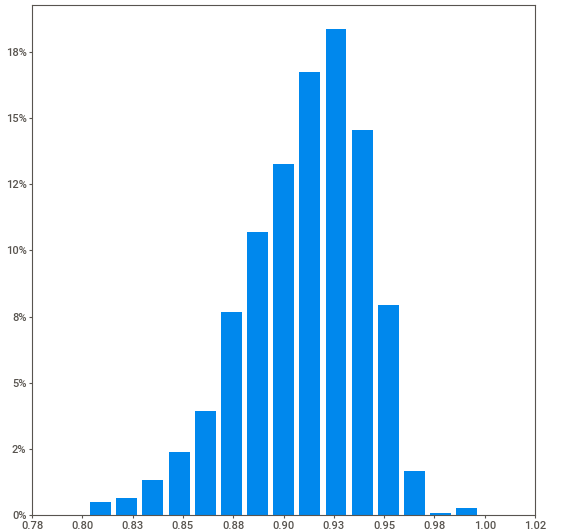
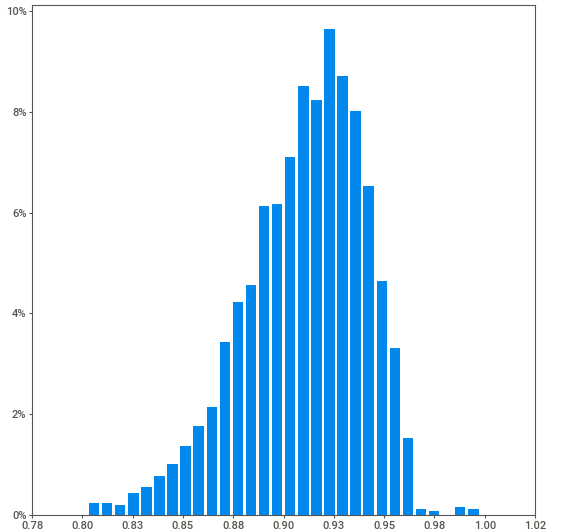
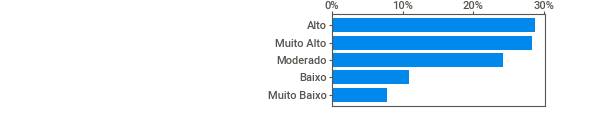
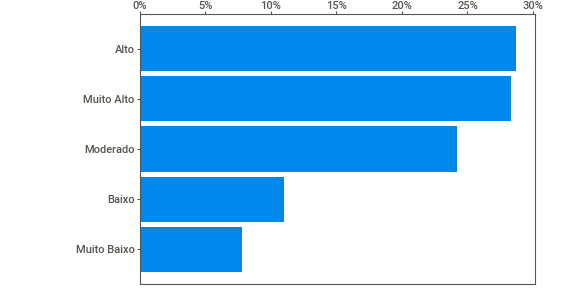
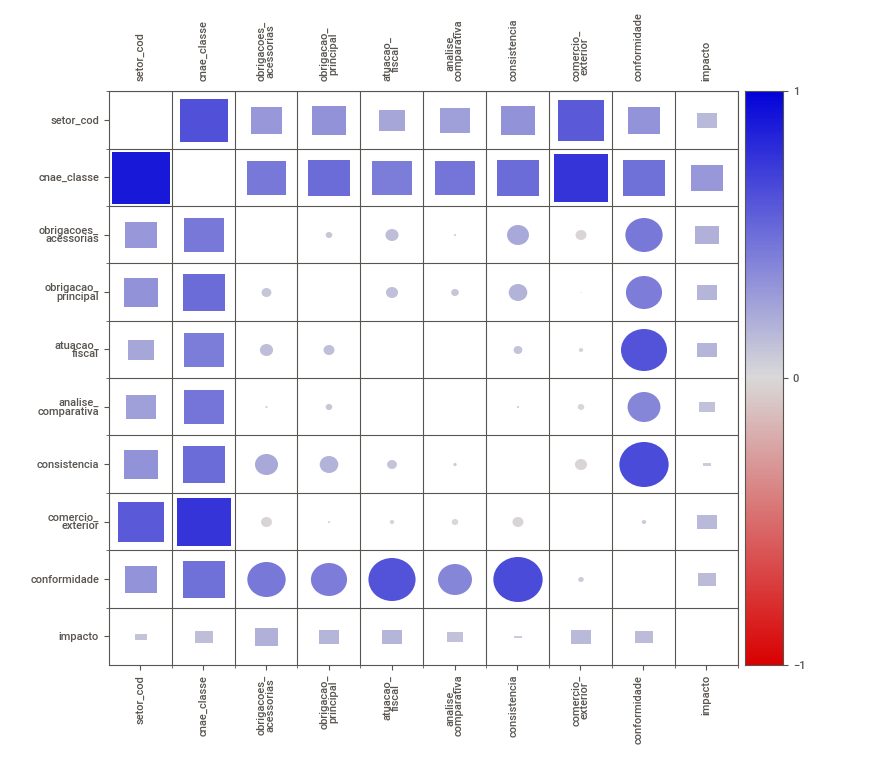
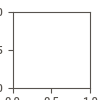

In [14]:
sv_config = sv.FeatureConfig(skip=['cluster'], 
                             
                             force_cat=['setor_cod','cnae_classe','impacto'])

rais_report = sv.analyze(df_kmeans_cl0, feat_cfg=sv_config)

# Salvando o Relatório
rais_report.show_html('Rais_kmeans0.html')

# Mostrando o Relatório
rais_report.show_notebook()

In [15]:
# Analisando Cluster 1
df_kmeans_cl1.describe()

obrigacoes_acessorias  obrigacao_principal  atuacao_fiscal  \
count               704.0000             704.0000        704.0000   
mean                  0.7746               0.8797          0.9429   
std                   0.1511               0.1199          0.0884   
min                   0.0000               0.3947          0.5803   
25%                   0.6979               0.7868          0.9000   
50%                   0.7896               0.9123          1.0000   
75%                   0.8929               0.9949          1.0000   
max                   1.0000               1.0000          1.0000   

       analise_comparativa  consistencia  comercio_exterior  conformidade  \
count             704.0000      704.0000           704.0000      704.0000   
mean                0.5041        0.4691             0.9343        0.7316   
std                 0.1496        0.1295             0.1039        0.0514   
min                 0.1111        0.0348             0.5247        0.4733   
25%                 0.4444        0.3903             0.8571        0.7046   
50%                 0.5417        0.4795             1.0000        0.7418   
75%                 0.6358        0.5622             1.0000        0.7688   
max                 0.8889        0.7204             1.0000        0.8284   

       cluster  
count 704.0000  
mean    1.0000  
std     0.0000  
min     1.0000  
25%     1.0000  
50%     1.0000  
75%     1.0000  
max     1.0000

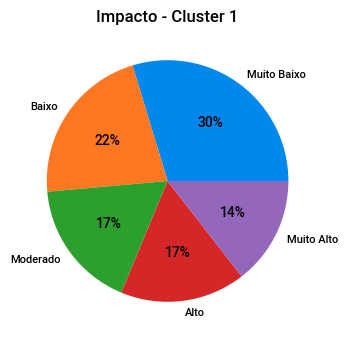

In [16]:
plot_pizza(df_kmeans_cl1, 'impacto', 'Impacto - Cluster 1', 5)

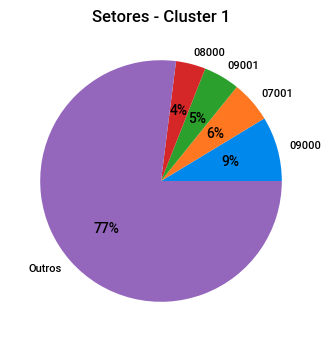

In [17]:
plot_pizza(df_kmeans_cl1, 'setor_cod', 'Setores - Cluster 1', 5)

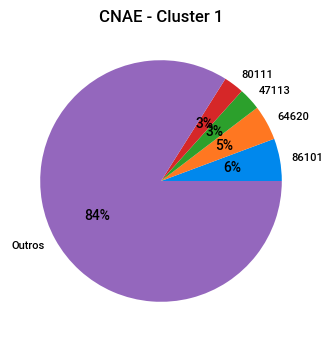

In [18]:
plot_pizza(df_kmeans_cl1, 'cnae_classe', 'CNAE - Cluster 1', 5)


Report Rais_kmeans1.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



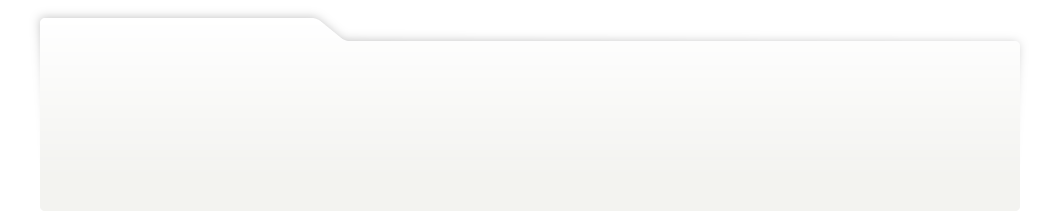
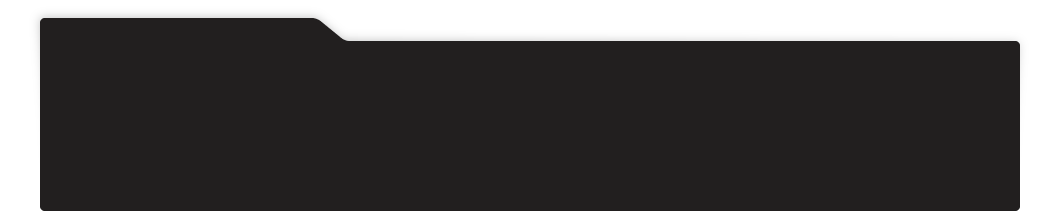
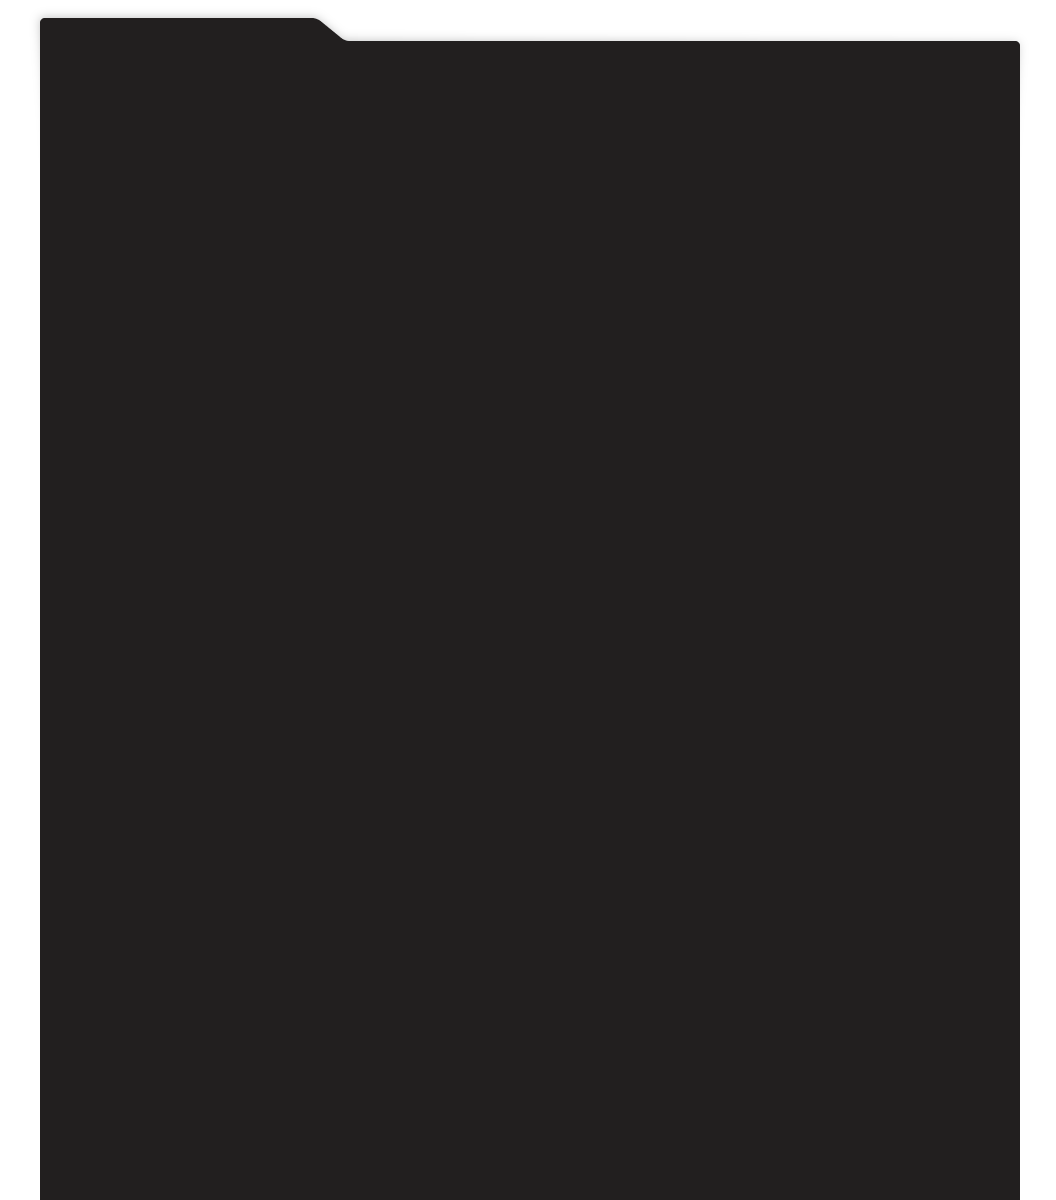
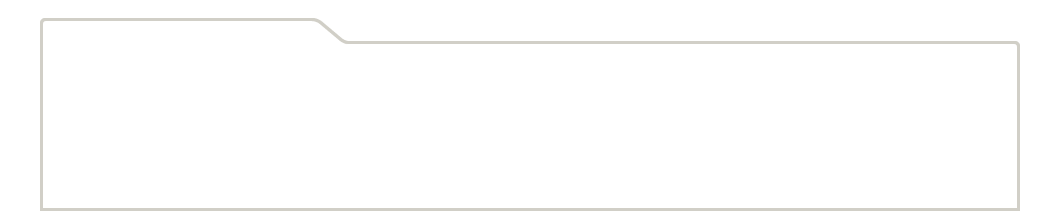
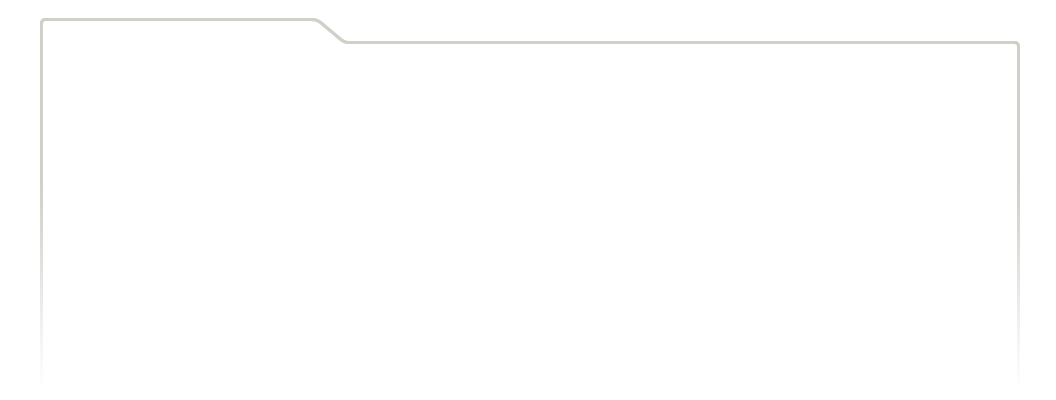
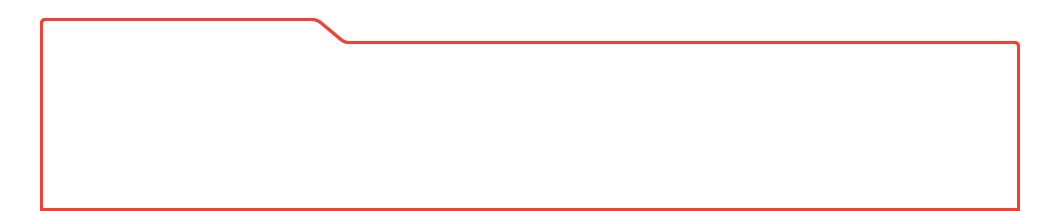
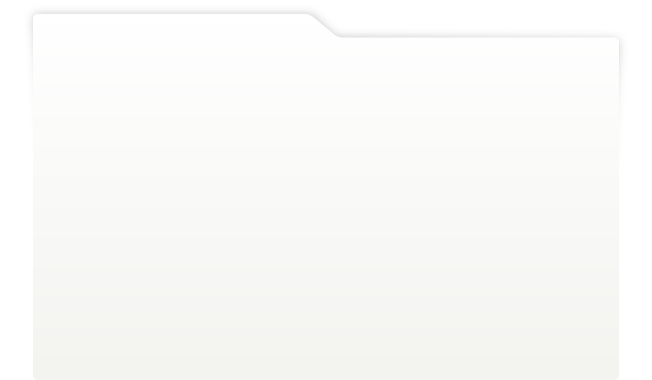
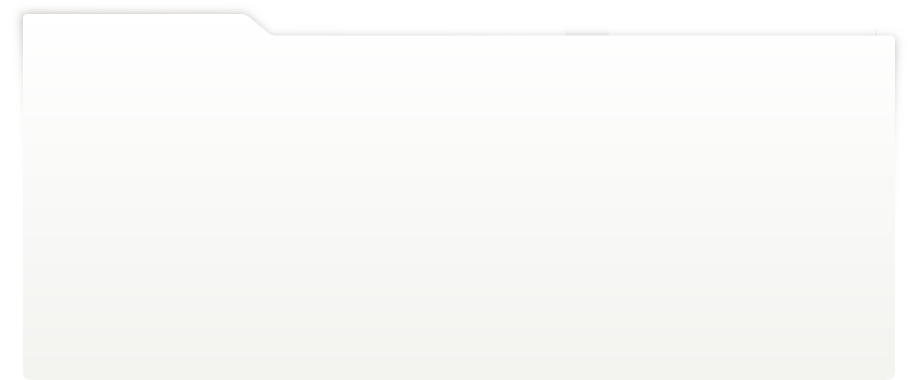
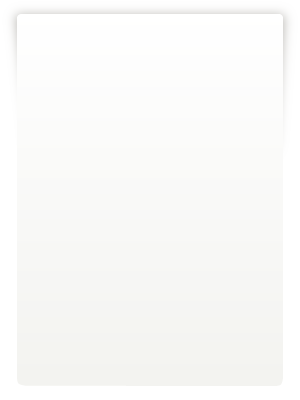
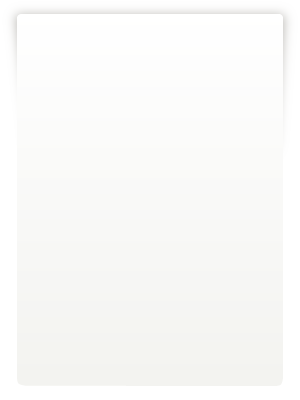
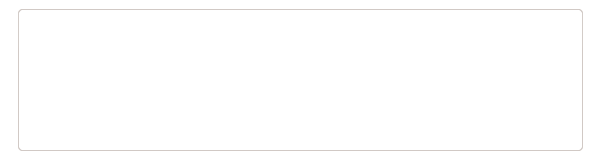
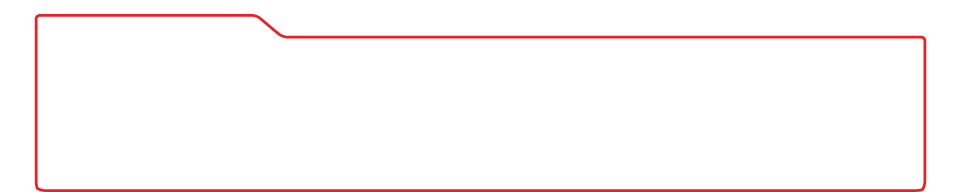
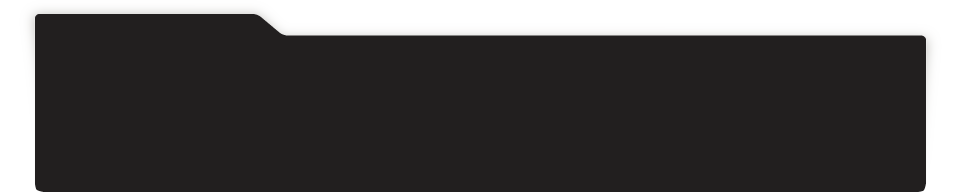
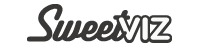
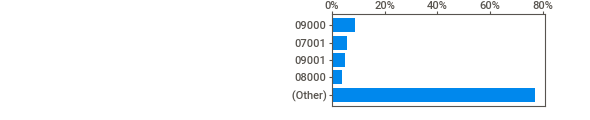
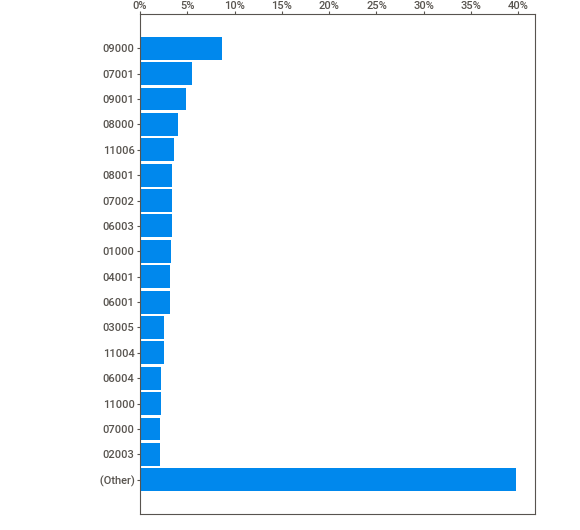
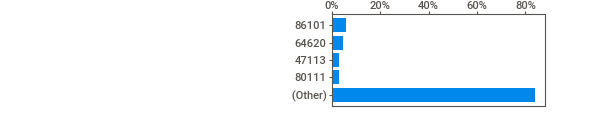
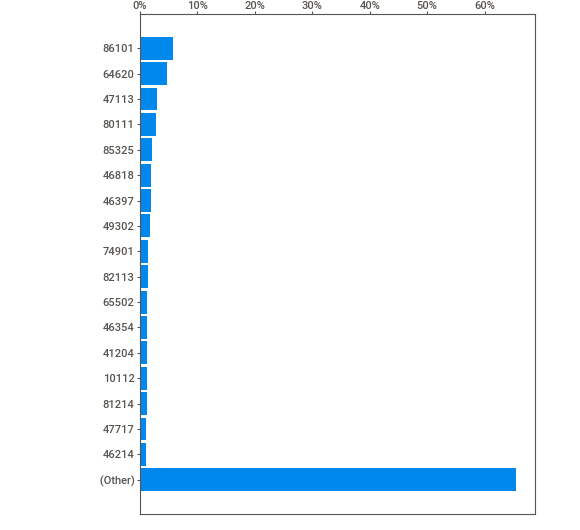
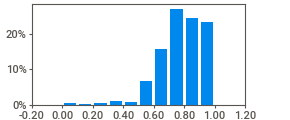
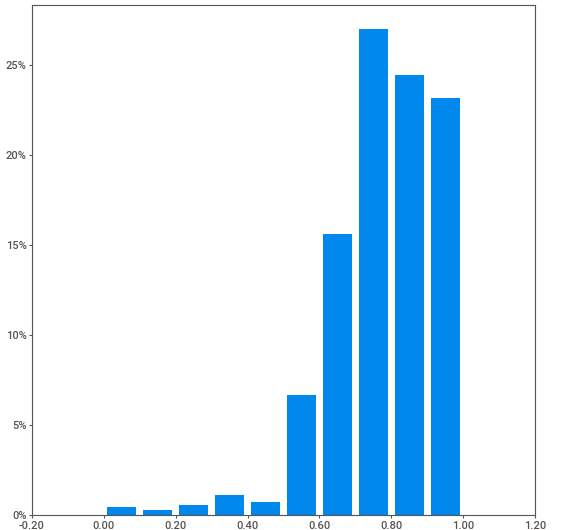
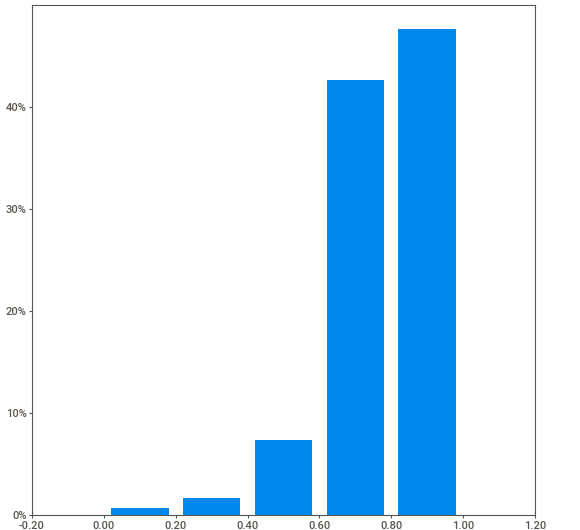
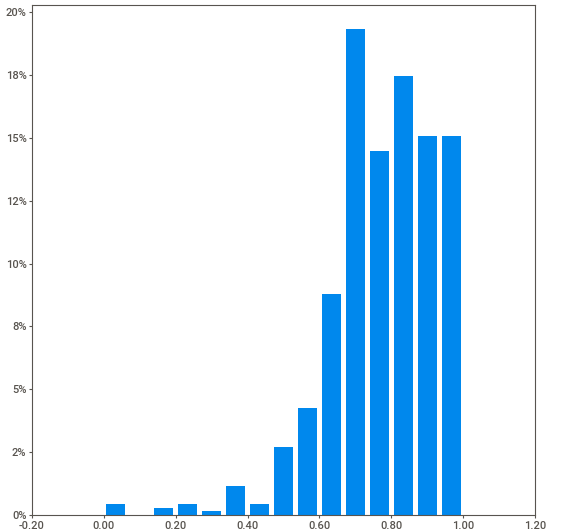
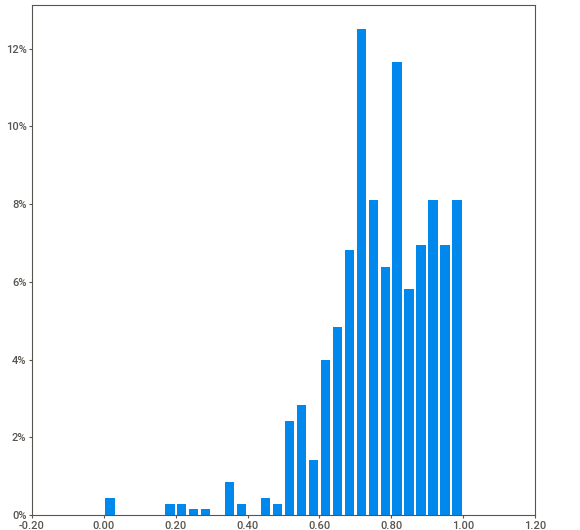
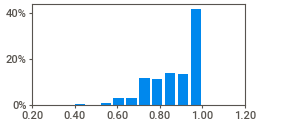
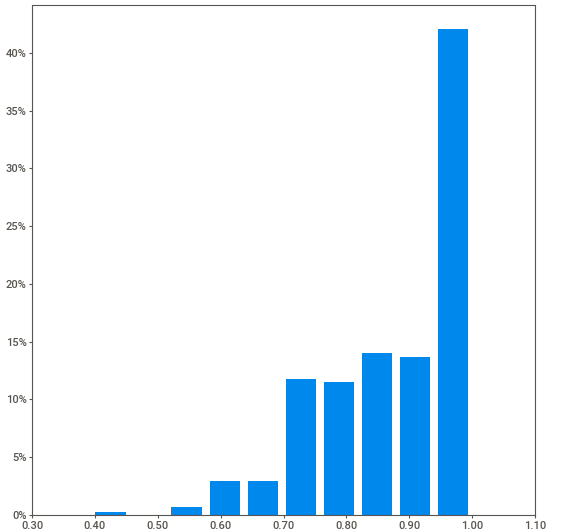
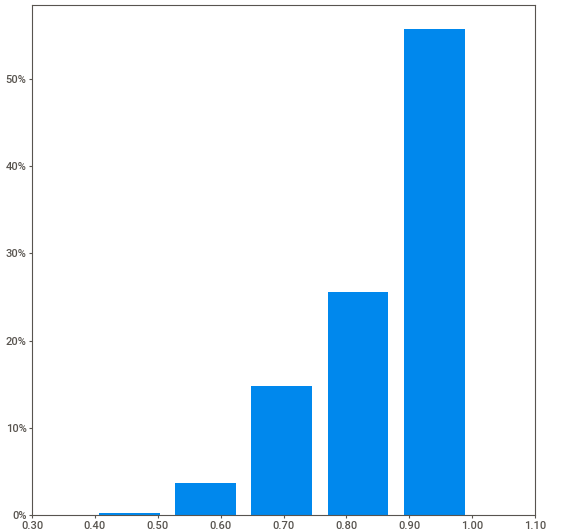
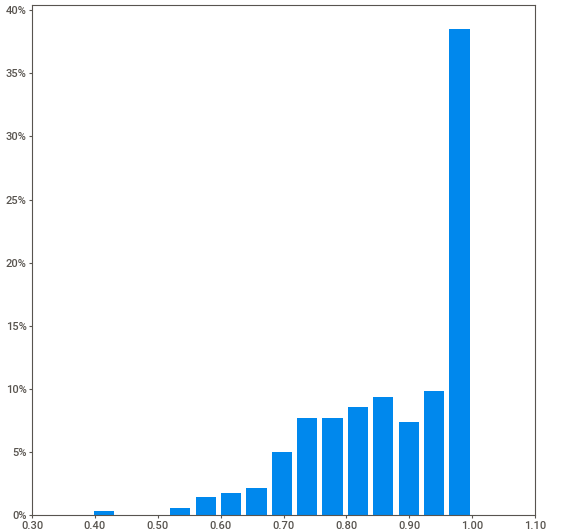
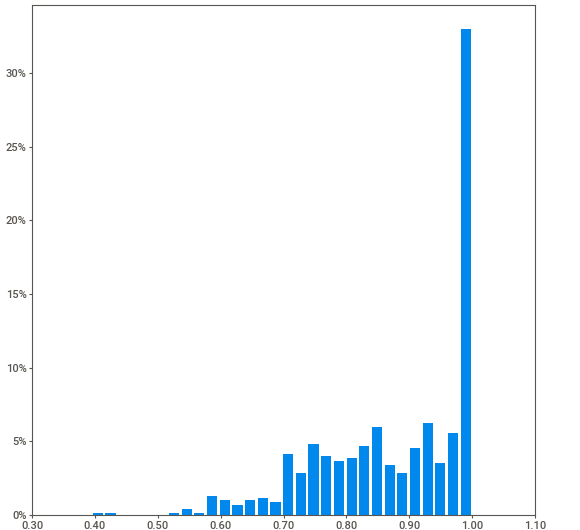
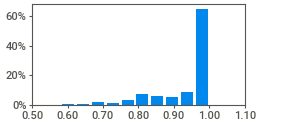
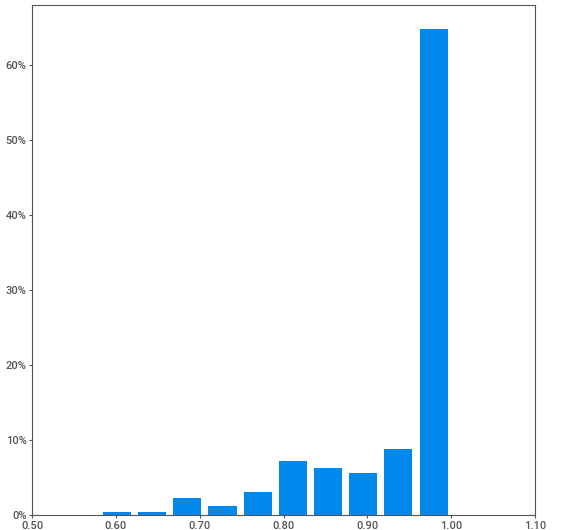
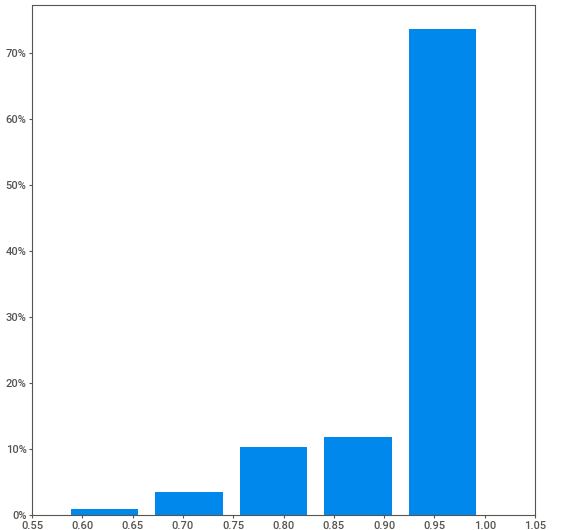
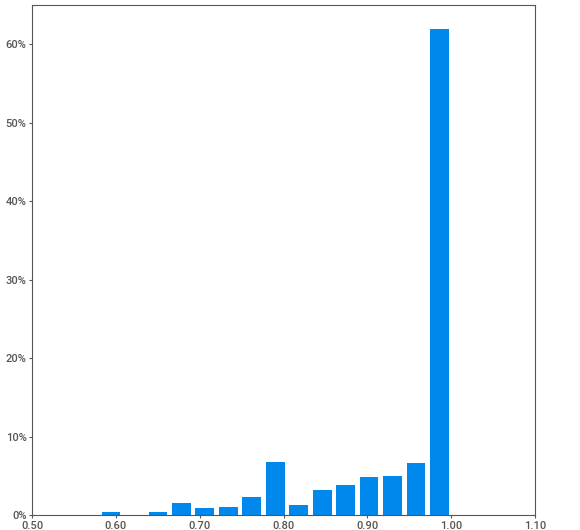
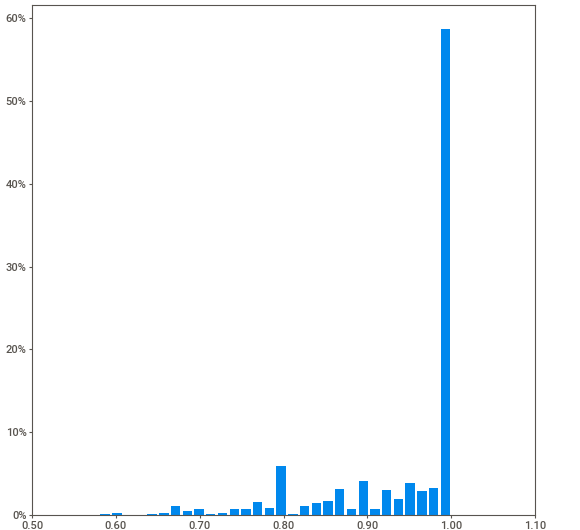
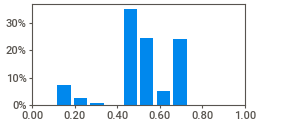
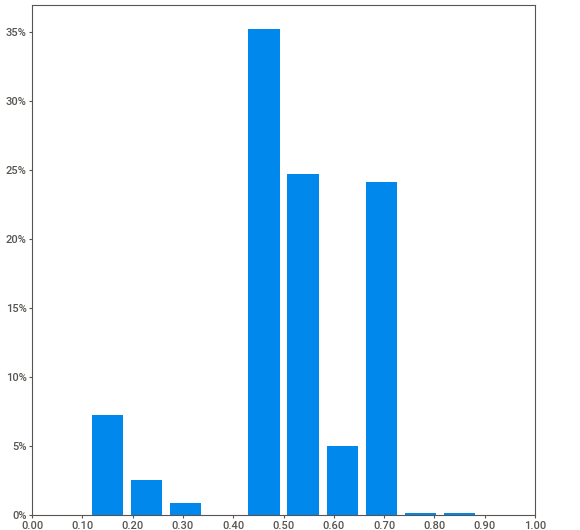
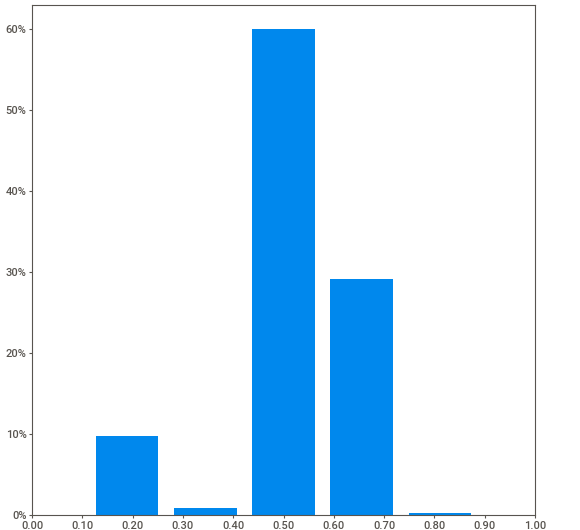
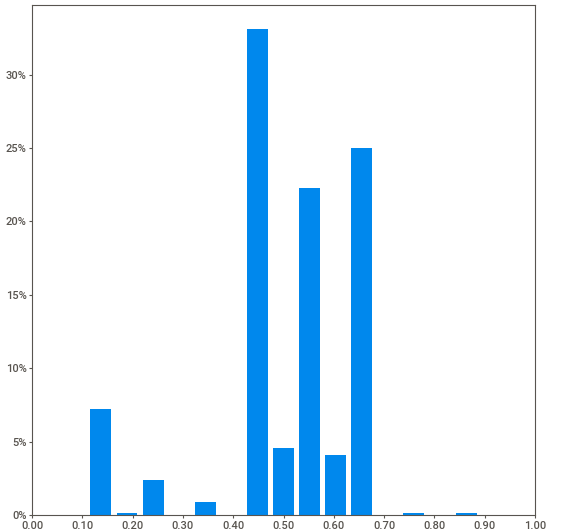
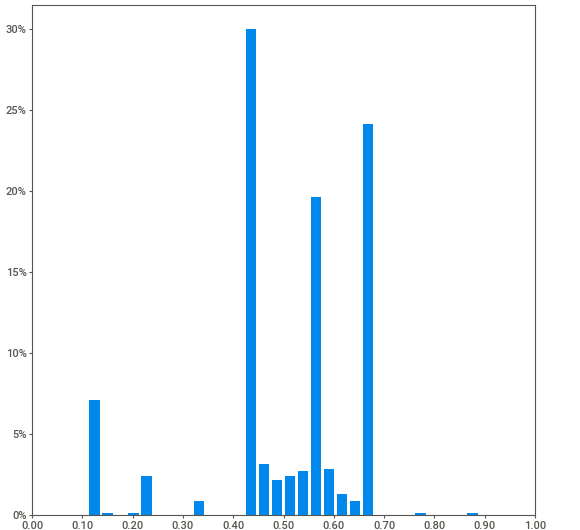
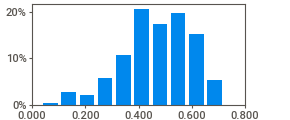
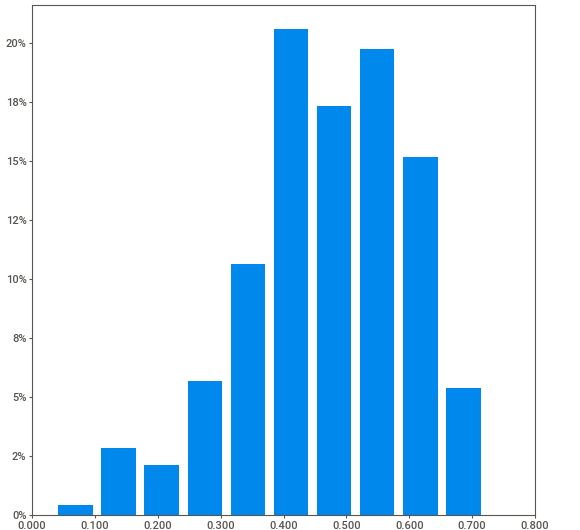
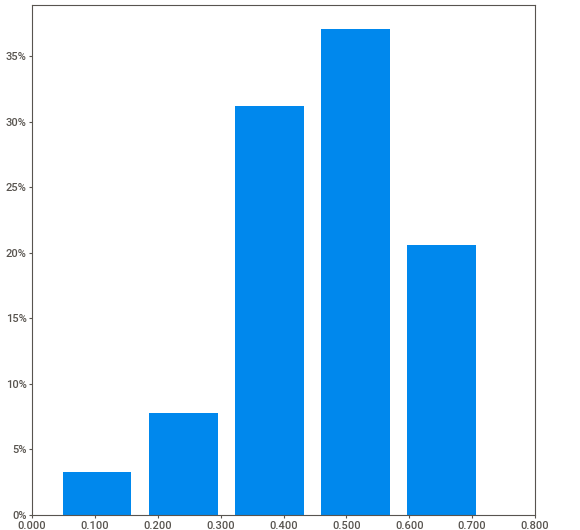
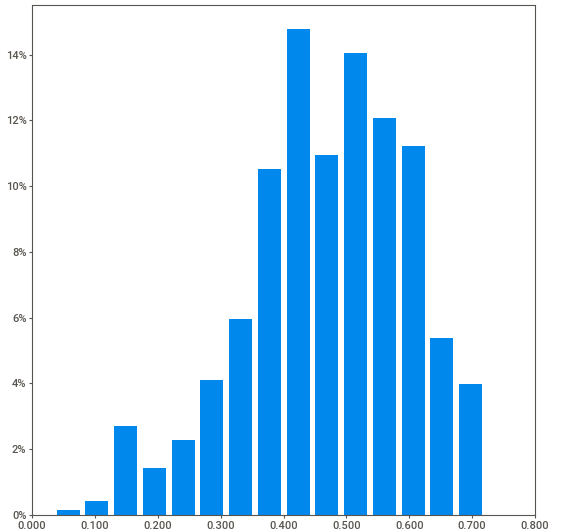
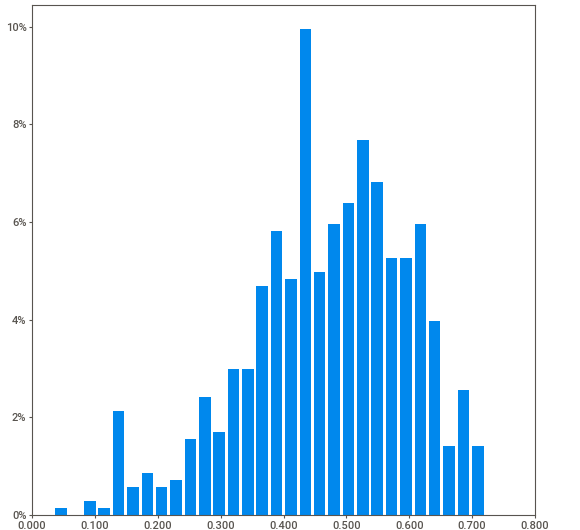
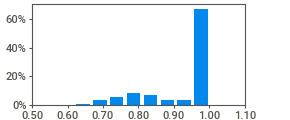
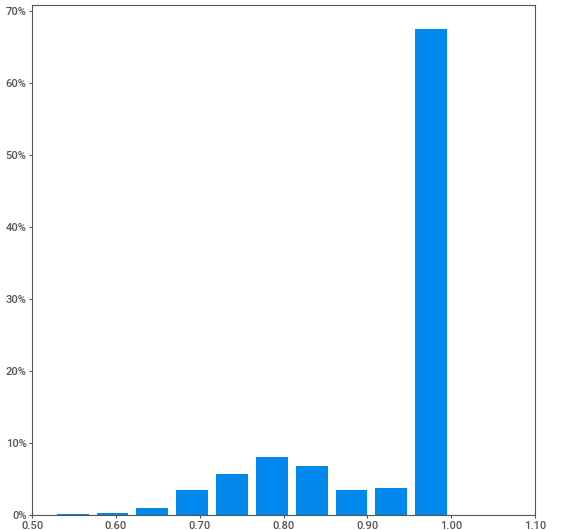
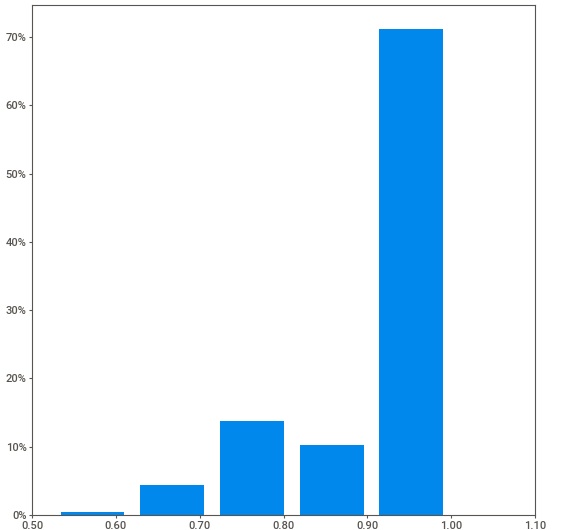
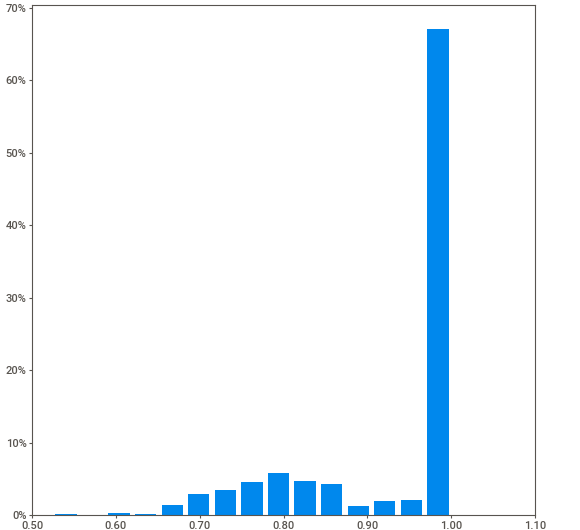
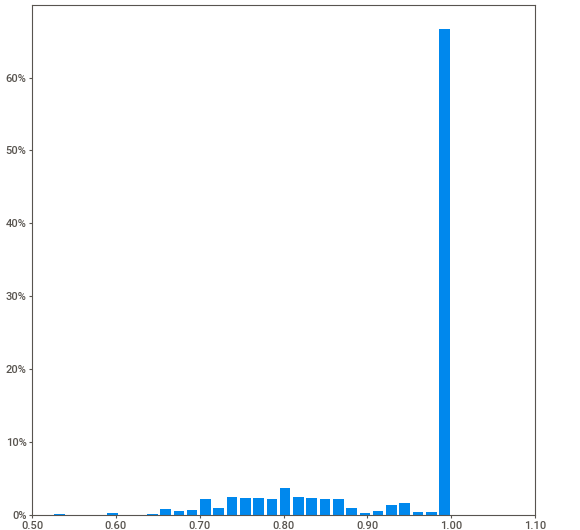
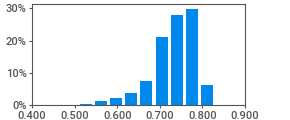
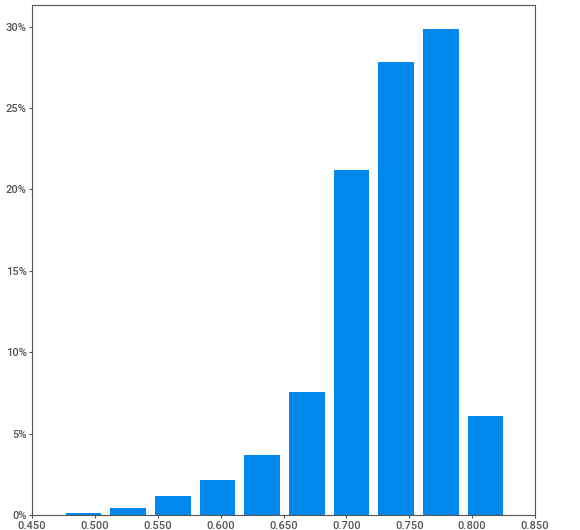
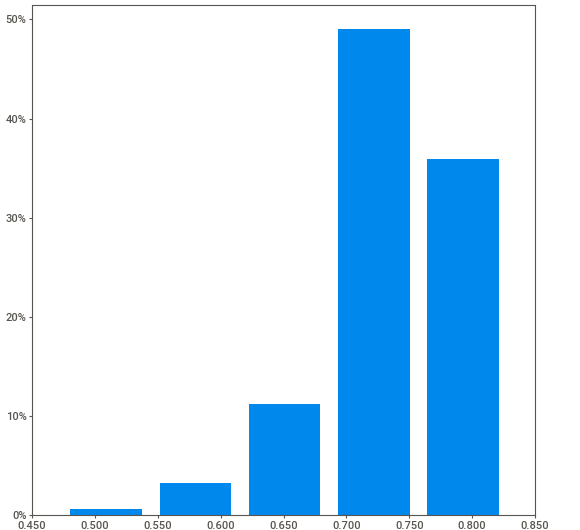
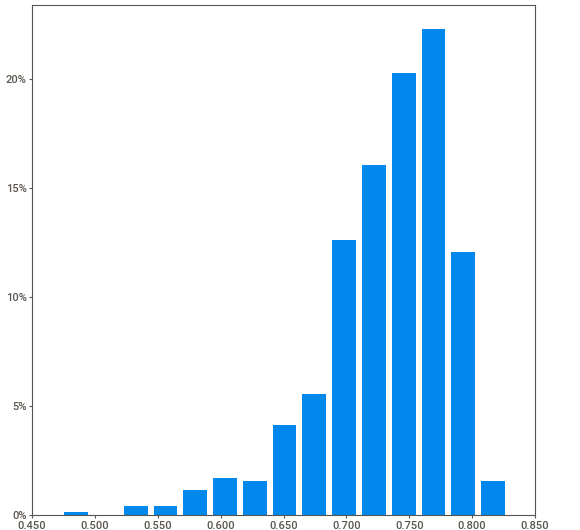
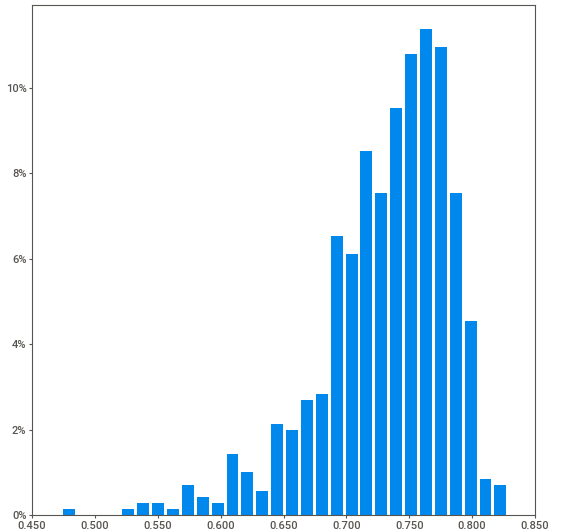
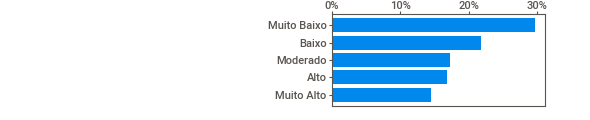
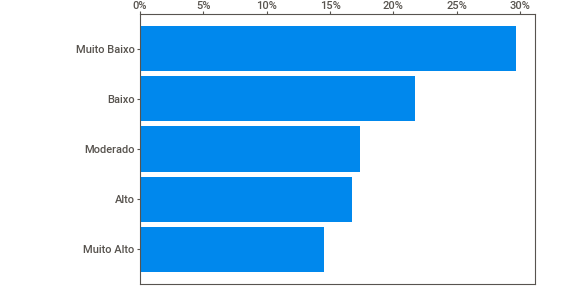
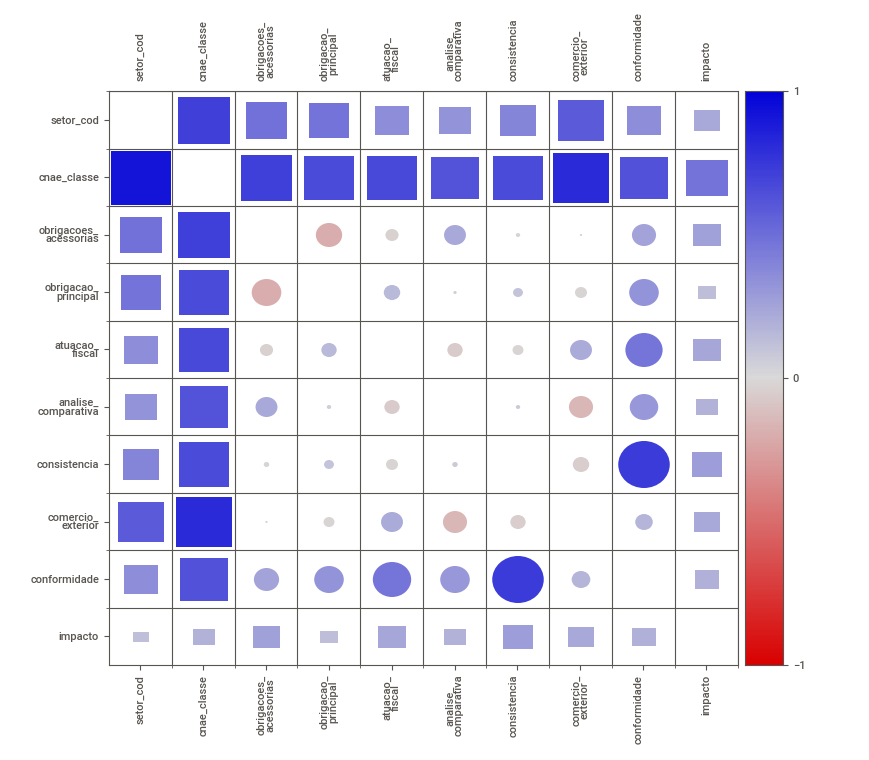
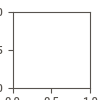

In [19]:
sv_config = sv.FeatureConfig(skip=['cluster'], 
                             
                             force_cat=['setor_cod','cnae_classe','impacto'])

rais_report = sv.analyze(df_kmeans_cl1, feat_cfg=sv_config)

# Salvando o Relatório
rais_report.show_html('Rais_kmeans1.html')

# Mostrando o Relatório
rais_report.show_notebook()

In [20]:
# Analisando Cluster 2
df_kmeans_cl2.describe()

obrigacoes_acessorias  obrigacao_principal  atuacao_fiscal  \
count              1698.0000            1698.0000       1698.0000   
mean                  0.8958               0.9330          0.9308   
std                   0.0876               0.0660          0.0901   
min                   0.3636               0.6290          0.4193   
25%                   0.8533               0.8934          0.8934   
50%                   0.9178               0.9525          0.9682   
75%                   0.9651               0.9900          1.0000   
max                   1.0000               1.0000          1.0000   

       analise_comparativa  consistencia  comercio_exterior  conformidade  \
count            1698.0000     1698.0000          1698.0000     1698.0000   
mean                0.5636        0.8954             0.7779        0.8649   
std                 0.0962        0.0714             0.0668        0.0409   
min                 0.4444        0.6262             0.4276        0.6817   
25%                 0.4444        0.8562             0.7385        0.8388   
50%                 0.5556        0.9118             0.7857        0.8717   
75%                 0.6667        0.9504             0.8248        0.8963   
max                 1.0000        1.0000             1.0000        0.9609   

        cluster  
count 1698.0000  
mean     2.0000  
std      0.0000  
min      2.0000  
25%      2.0000  
50%      2.0000  
75%      2.0000  
max      2.0000

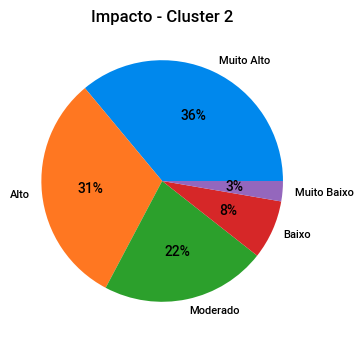

In [21]:
plot_pizza(df_kmeans_cl2, 'impacto', 'Impacto - Cluster 2', 5)

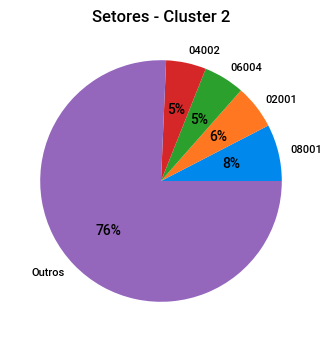

In [22]:
plot_pizza(df_kmeans_cl2, 'setor_cod', 'Setores - Cluster 2', 5)

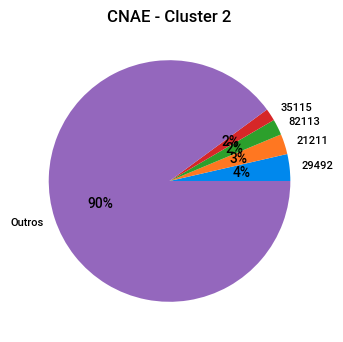

In [23]:
plot_pizza(df_kmeans_cl2, 'cnae_classe', 'CNAE - Cluster 2', 5)


Report Rais_kmeans2.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



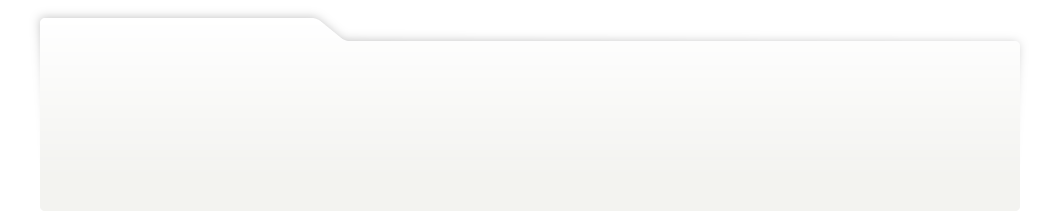
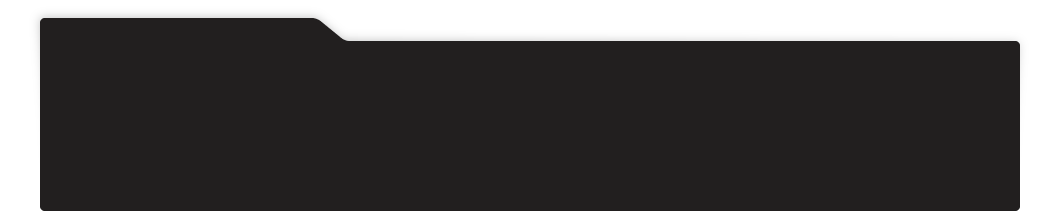
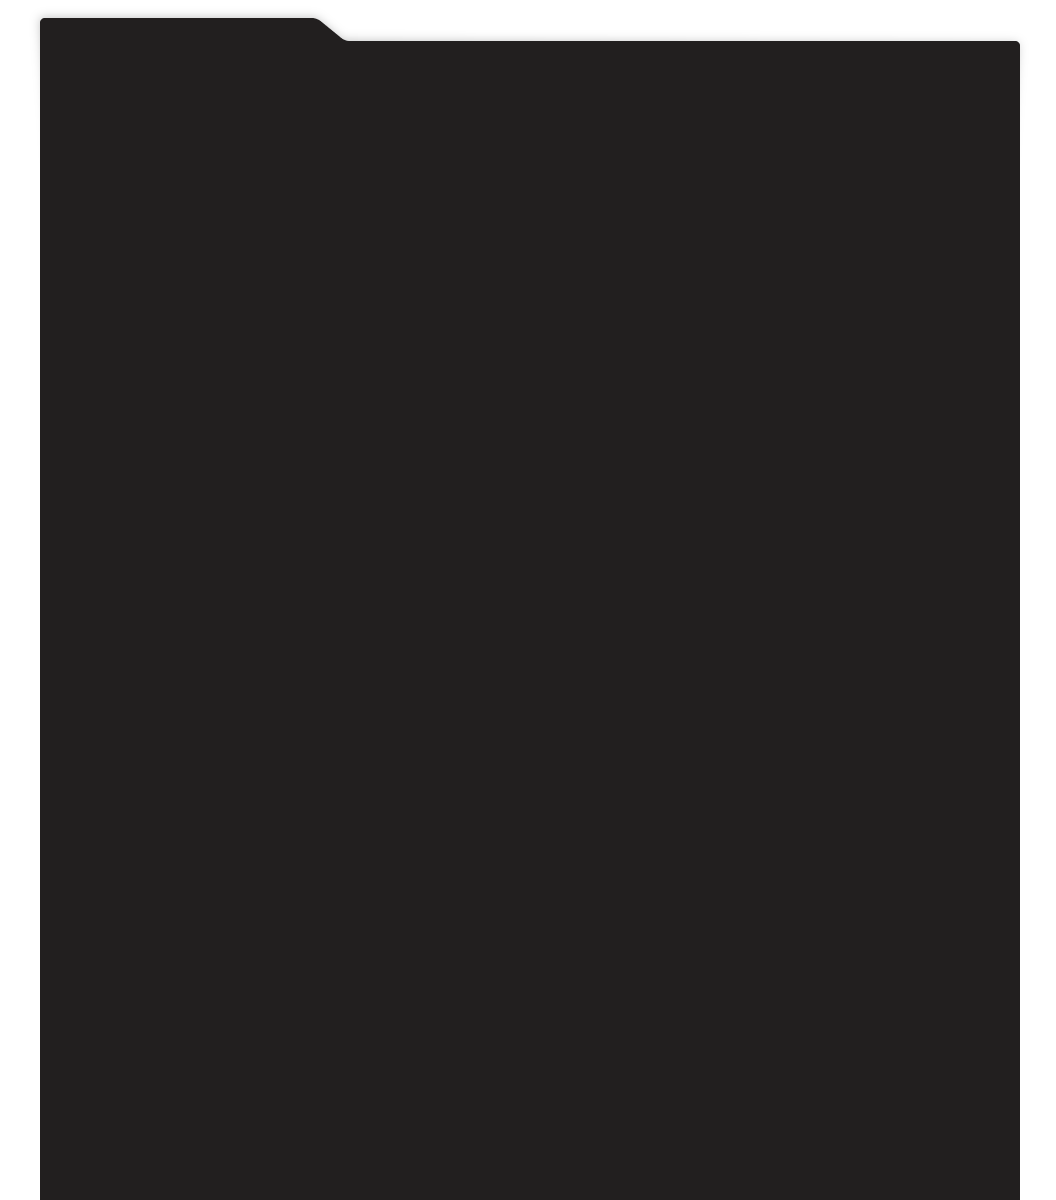
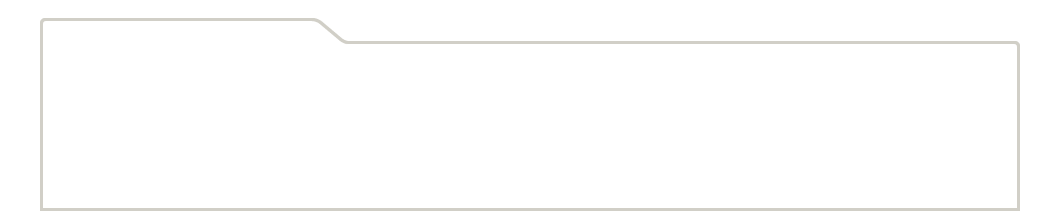
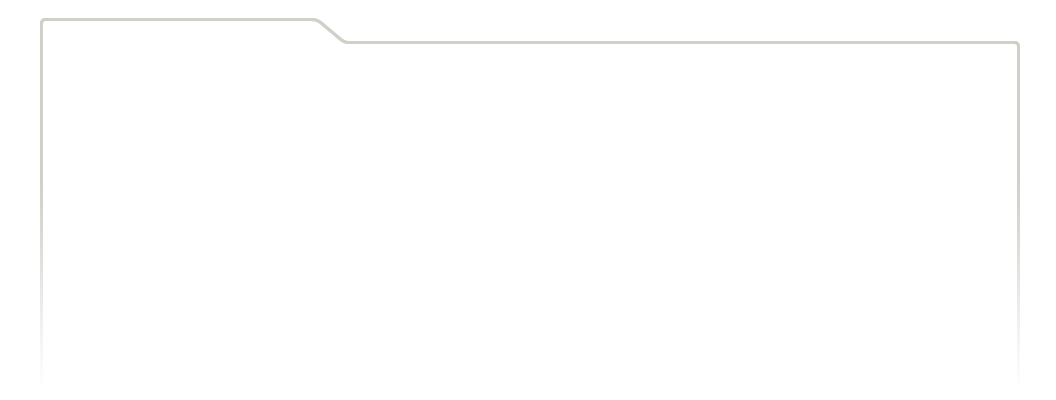
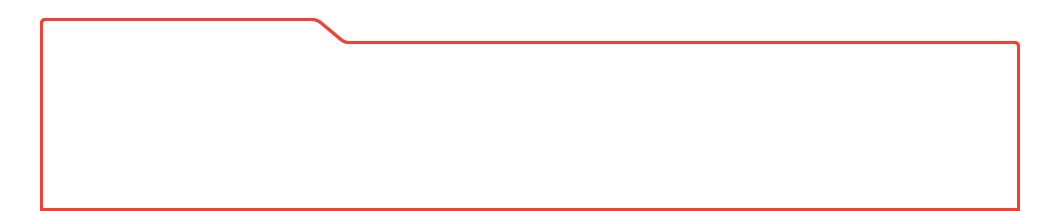
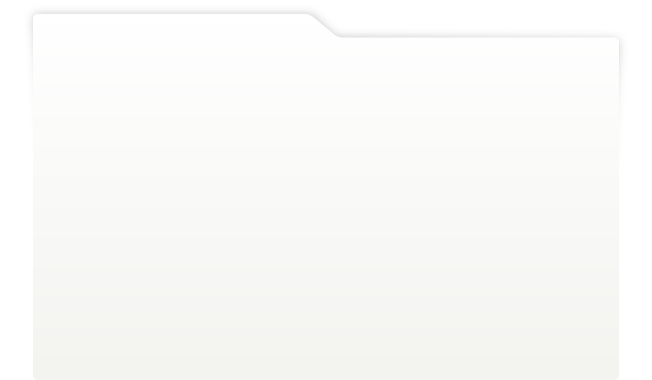
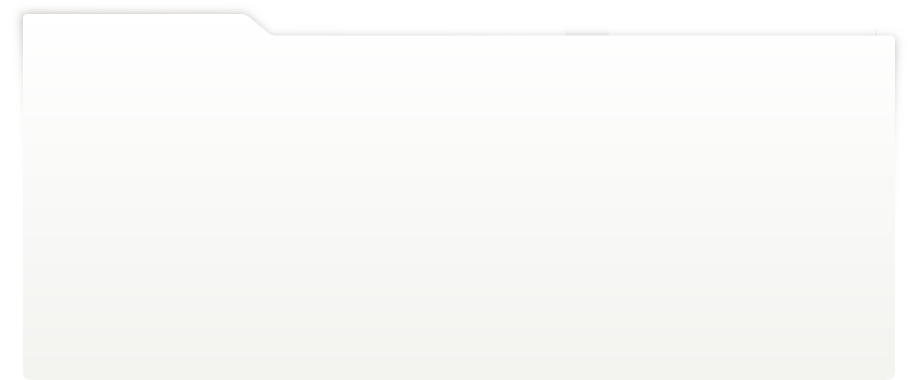
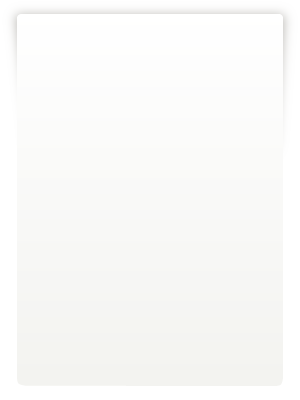
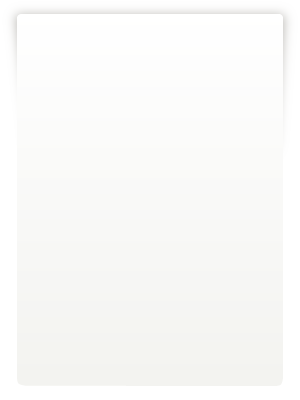
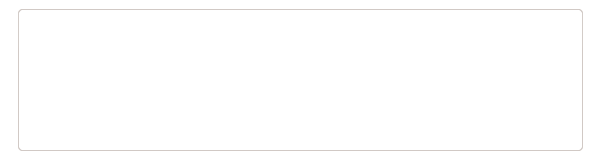
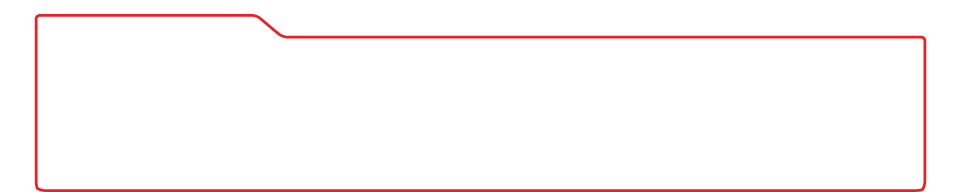
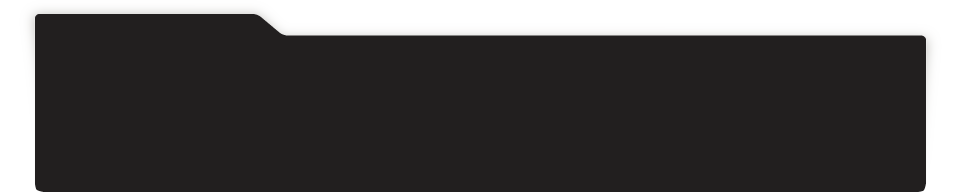
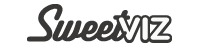
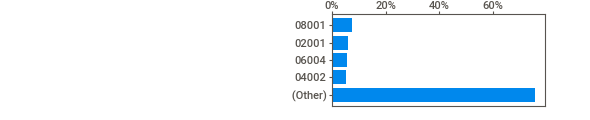
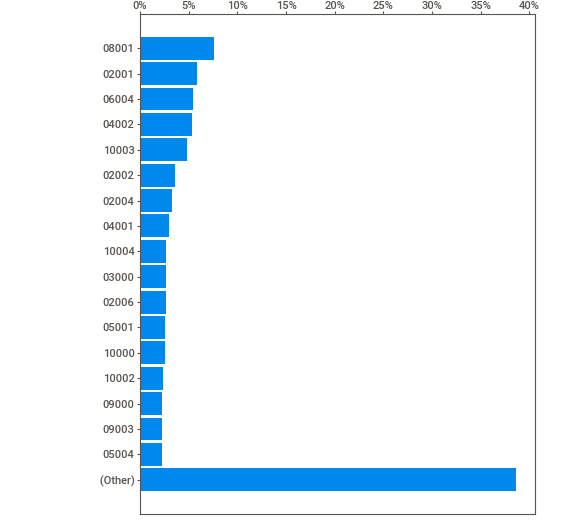
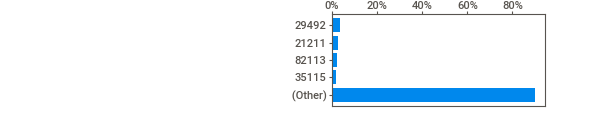
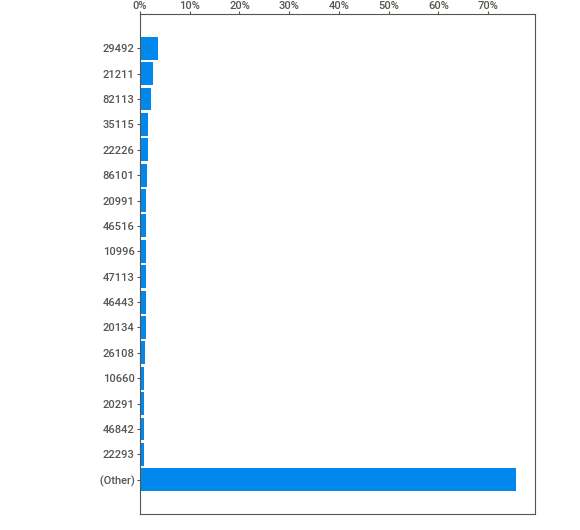
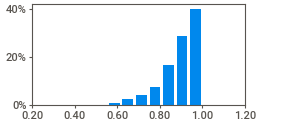
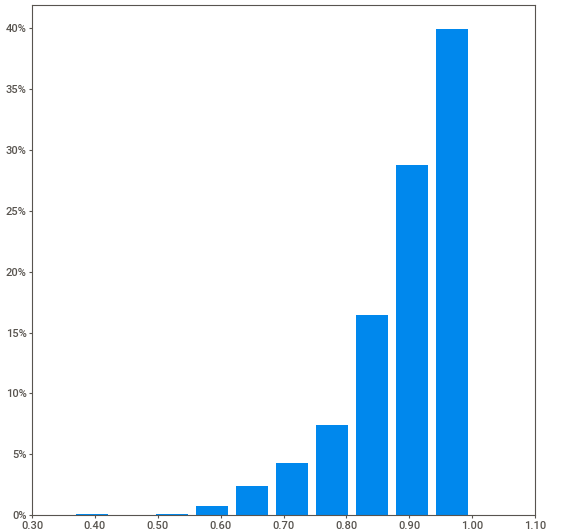
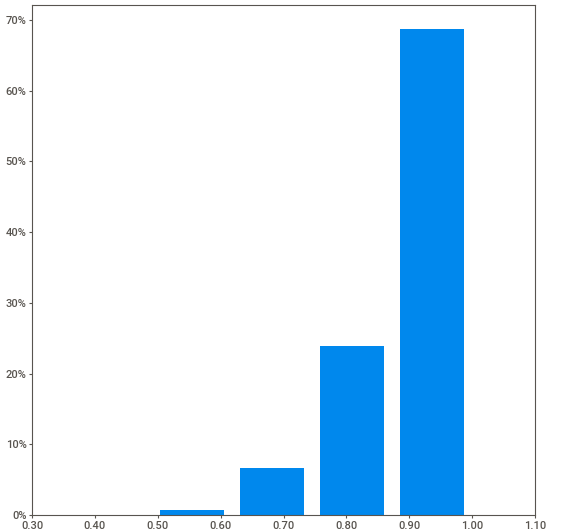
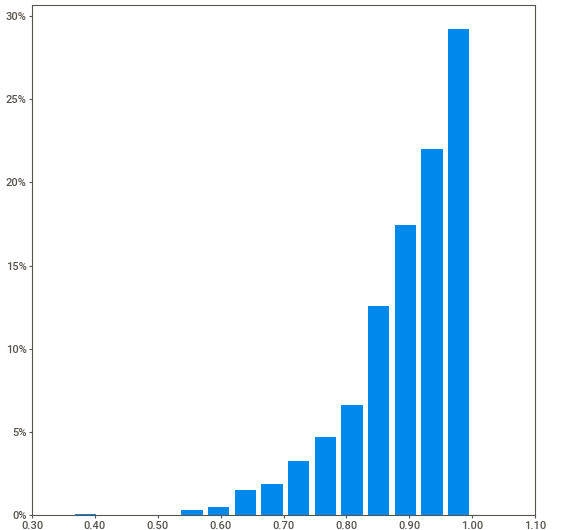
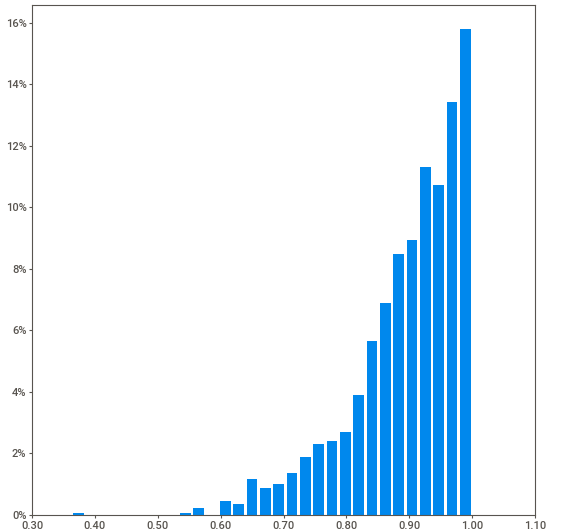
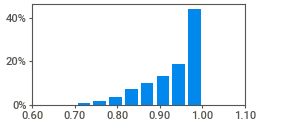
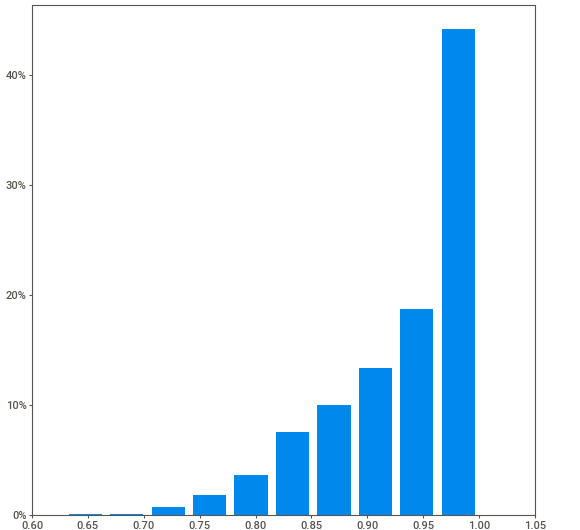
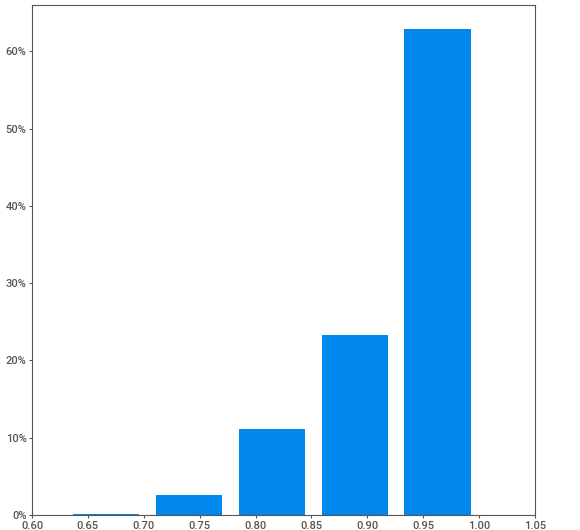
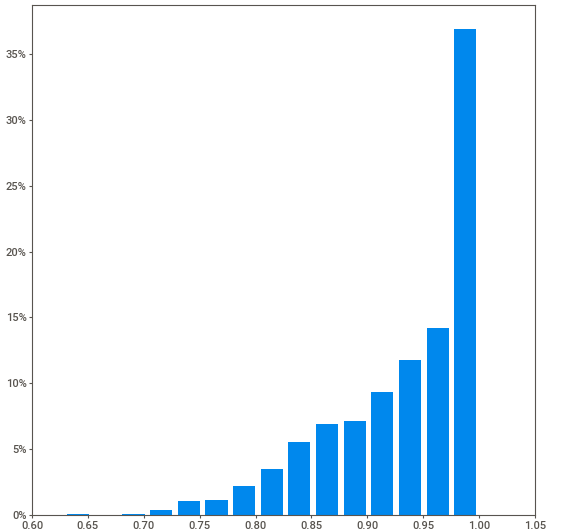
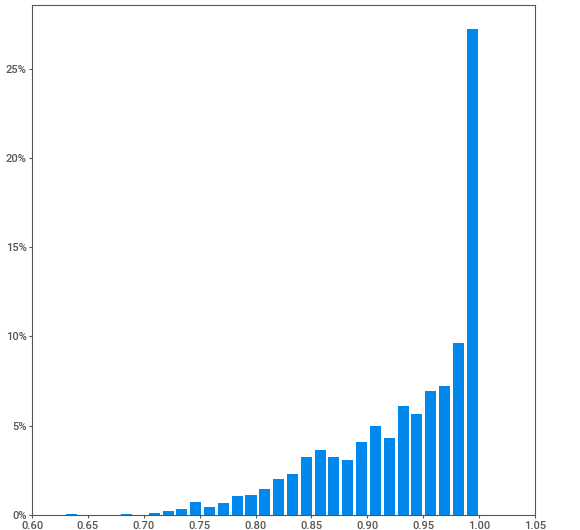
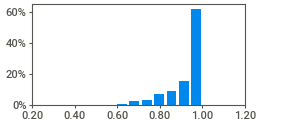
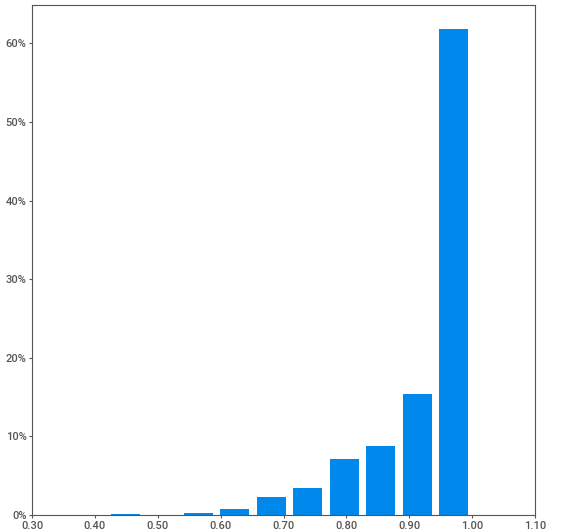
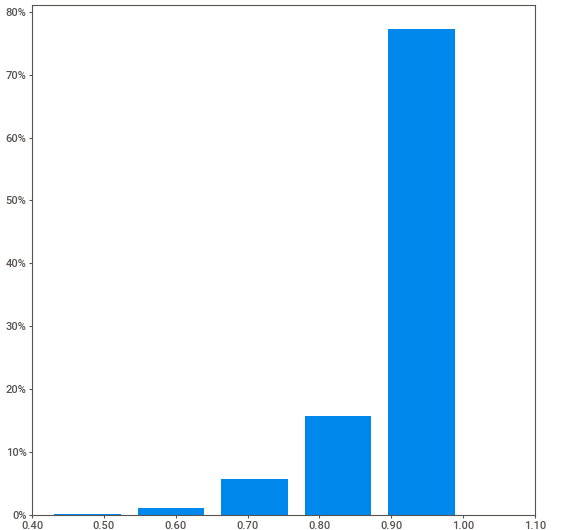
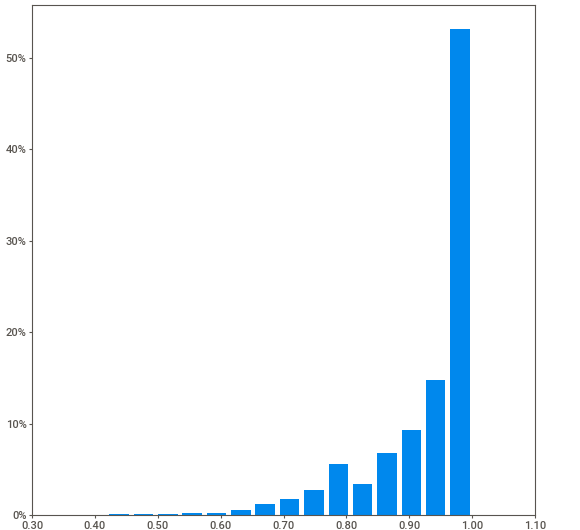
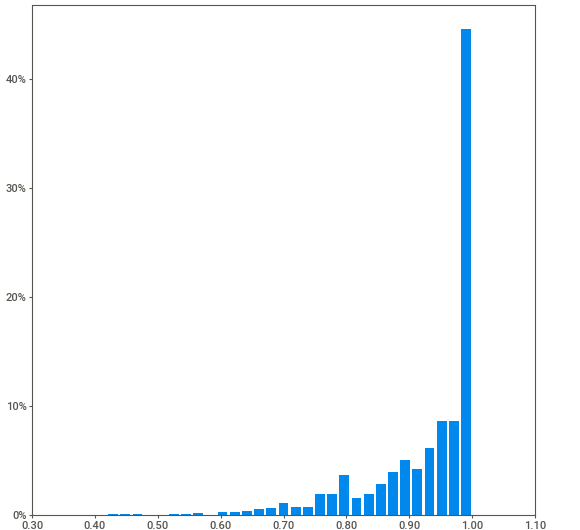
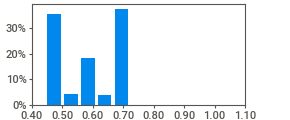
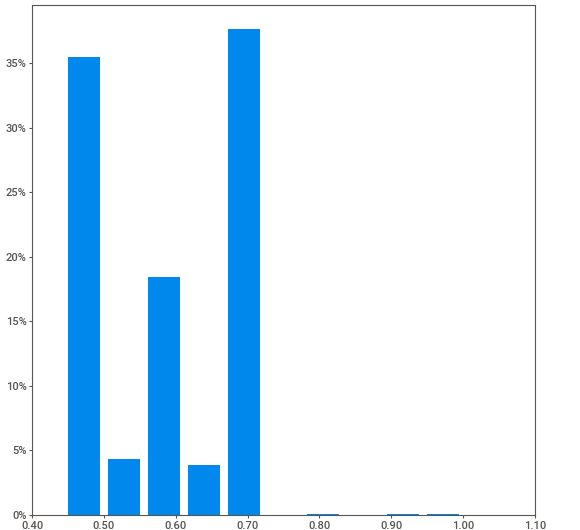
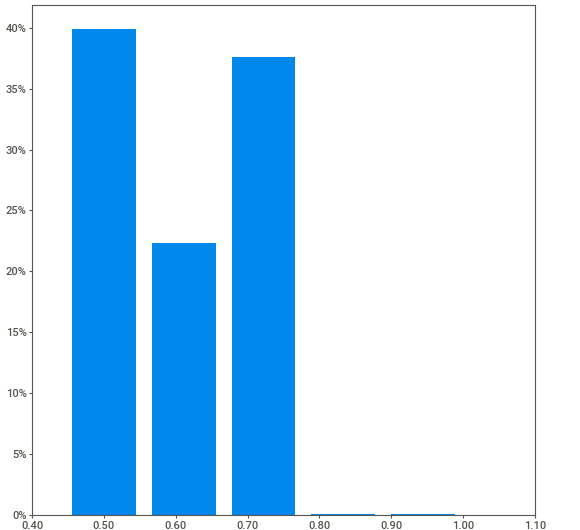
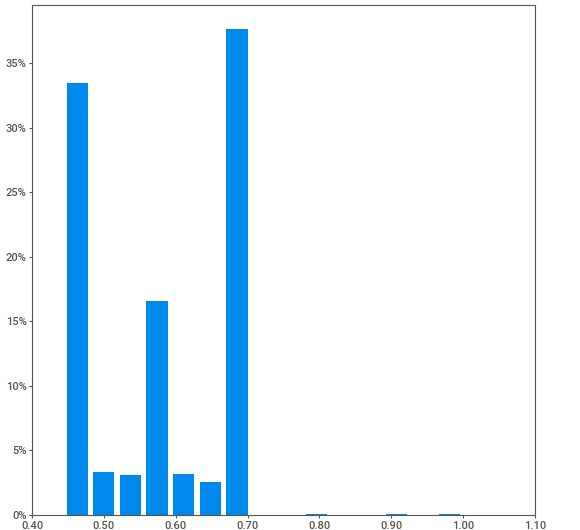
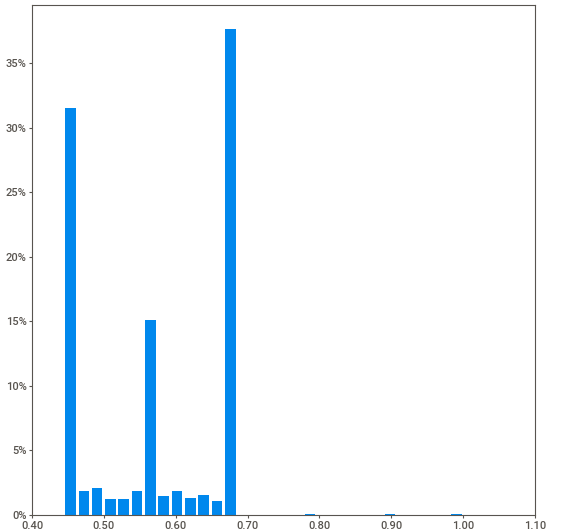
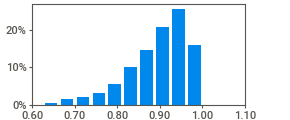
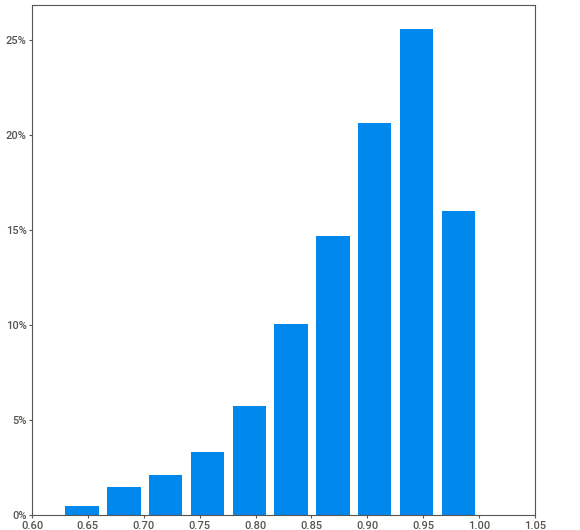
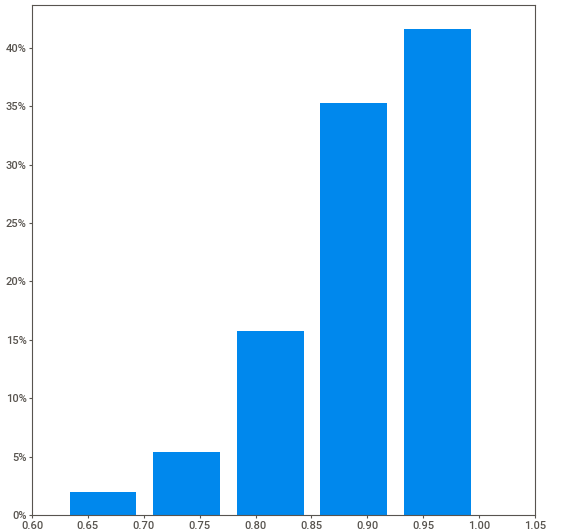
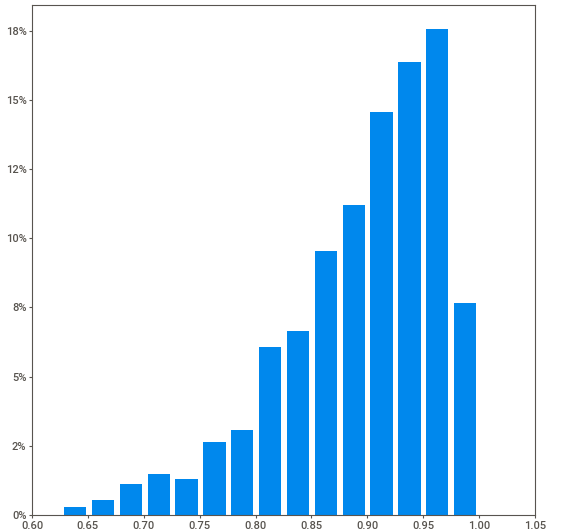
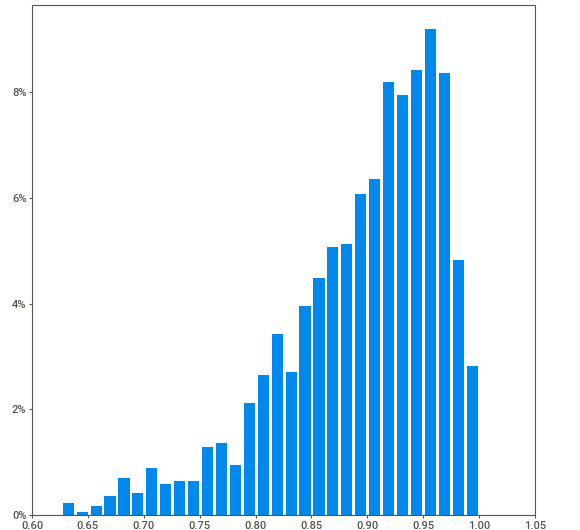
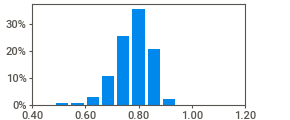
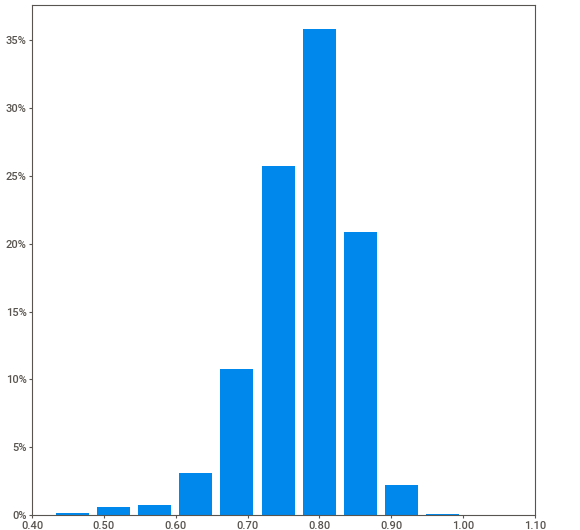
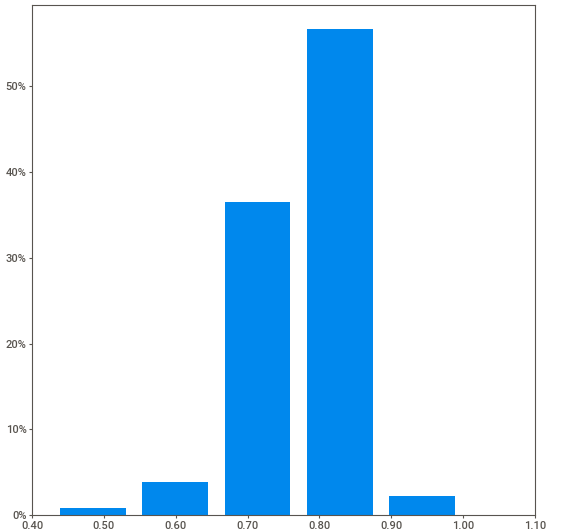
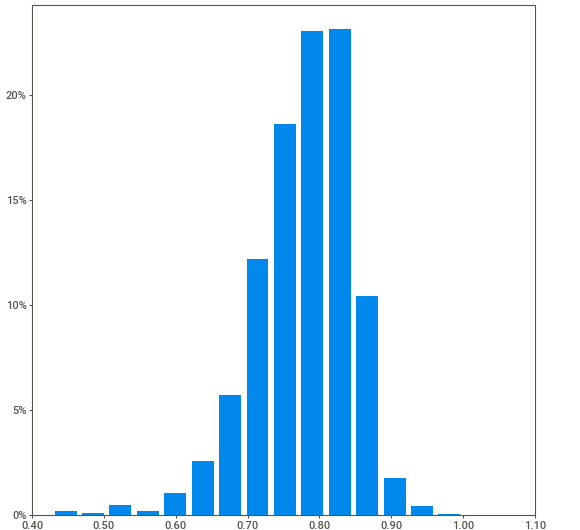
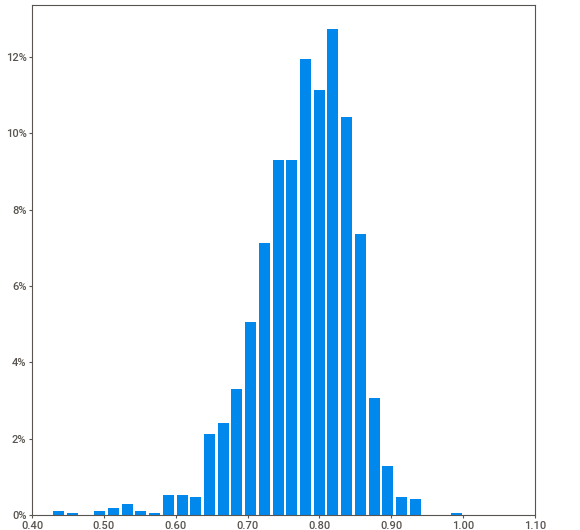
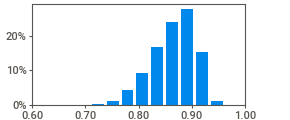
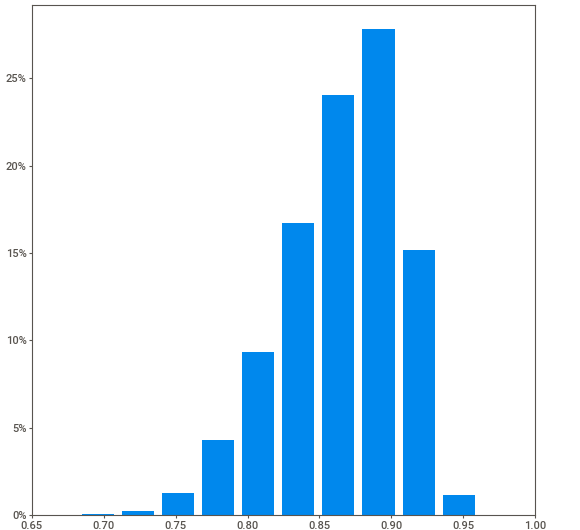
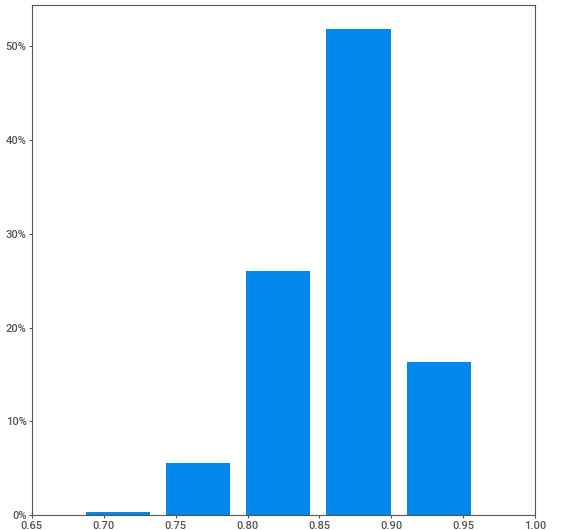
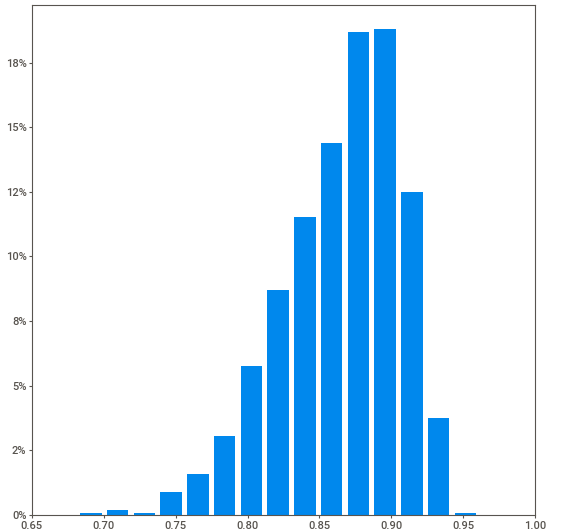
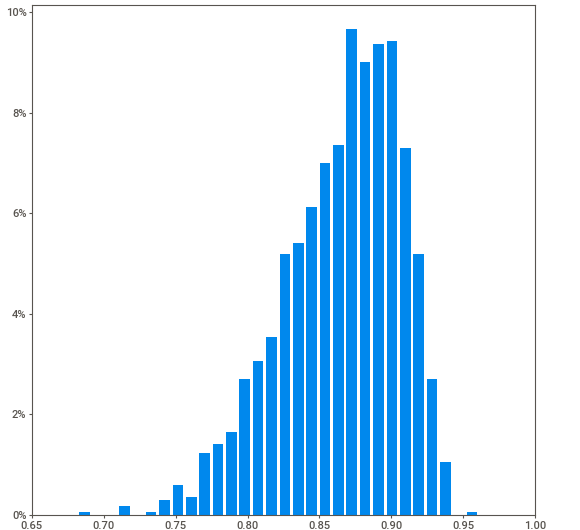
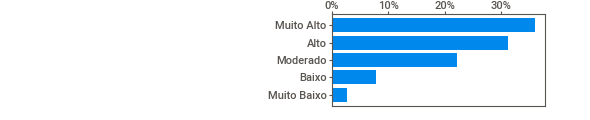
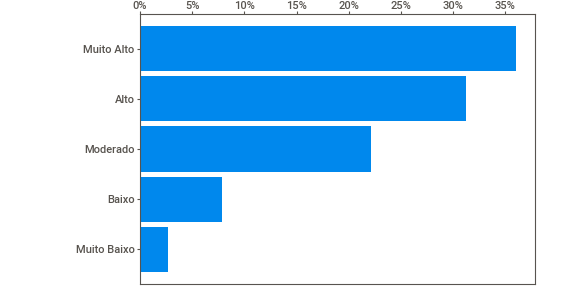
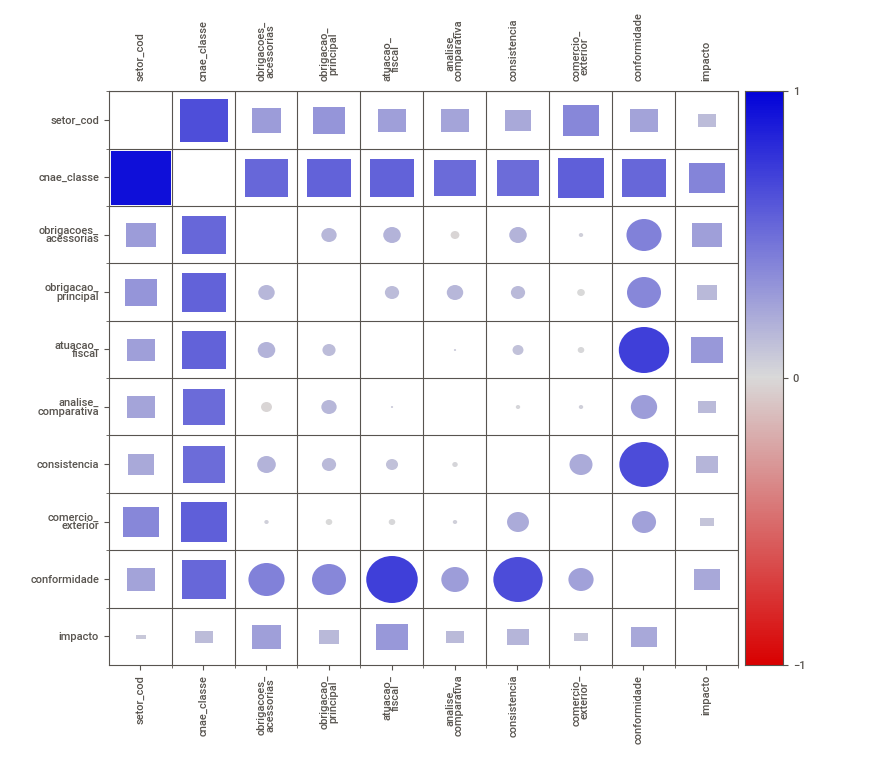
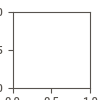

In [24]:
sv_config = sv.FeatureConfig(skip=['cluster'],
                             
                                        force_cat=['setor_cod','cnae_classe','impacto'])

rais_report = sv.analyze(df_kmeans_cl2, feat_cfg=sv_config)

# Salvando o Relatório
rais_report.show_html('Rais_kmeans2.html')

# Mostrando o Relatório
rais_report.show_notebook()

In [25]:
# Analisando Cluster 3
df_kmeans_cl3.describe()

obrigacoes_acessorias  obrigacao_principal  atuacao_fiscal  \
count              2307.0000            2307.0000       2307.0000   
mean                  0.9265               0.9410          0.9722   
std                   0.0694               0.0684          0.0576   
min                   0.5947               0.6632          0.6327   
25%                   0.8931               0.8973          0.9781   
50%                   0.9475               0.9705          1.0000   
75%                   0.9821               0.9996          1.0000   
max                   1.0000               1.0000          1.0000   

       analise_comparativa  consistencia  comercio_exterior  conformidade  \
count            2307.0000     2307.0000          2307.0000     2307.0000   
mean                0.5797        0.6412             0.9454        0.8227   
std                 0.0973        0.0628             0.0897        0.0303   
min                 0.1111        0.3877             0.6050        0.7084   
25%                 0.4642        0.6041             0.8935        0.8034   
50%                 0.6226        0.6487             1.0000        0.8240   
75%                 0.6667        0.6858             1.0000        0.8454   
max                 0.6667        0.7936             1.0000        0.8928   

        cluster  
count 2307.0000  
mean     3.0000  
std      0.0000  
min      3.0000  
25%      3.0000  
50%      3.0000  
75%      3.0000  
max      3.0000

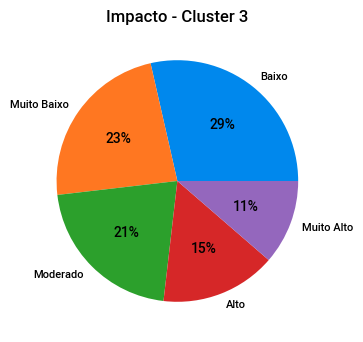

In [26]:
plot_pizza(df_kmeans_cl3, 'impacto', 'Impacto - Cluster 3', 5)

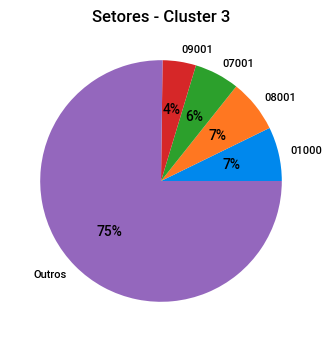

In [27]:
plot_pizza(df_kmeans_cl3, 'setor_cod', 'Setores - Cluster 3', 5)

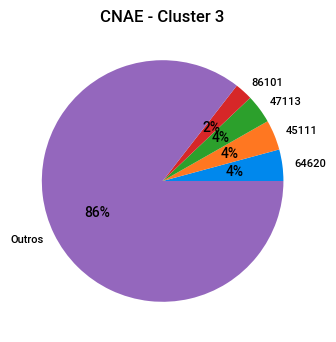

In [28]:
plot_pizza(df_kmeans_cl3, 'cnae_classe', 'CNAE - Cluster 3', 5)


Report Rais_kmeans3.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



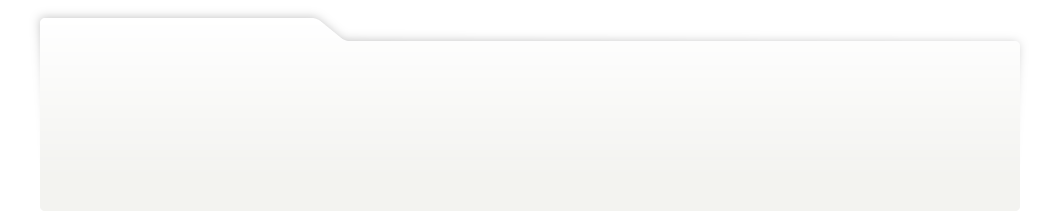
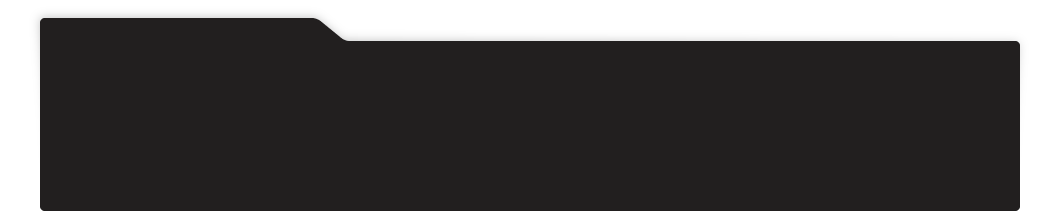
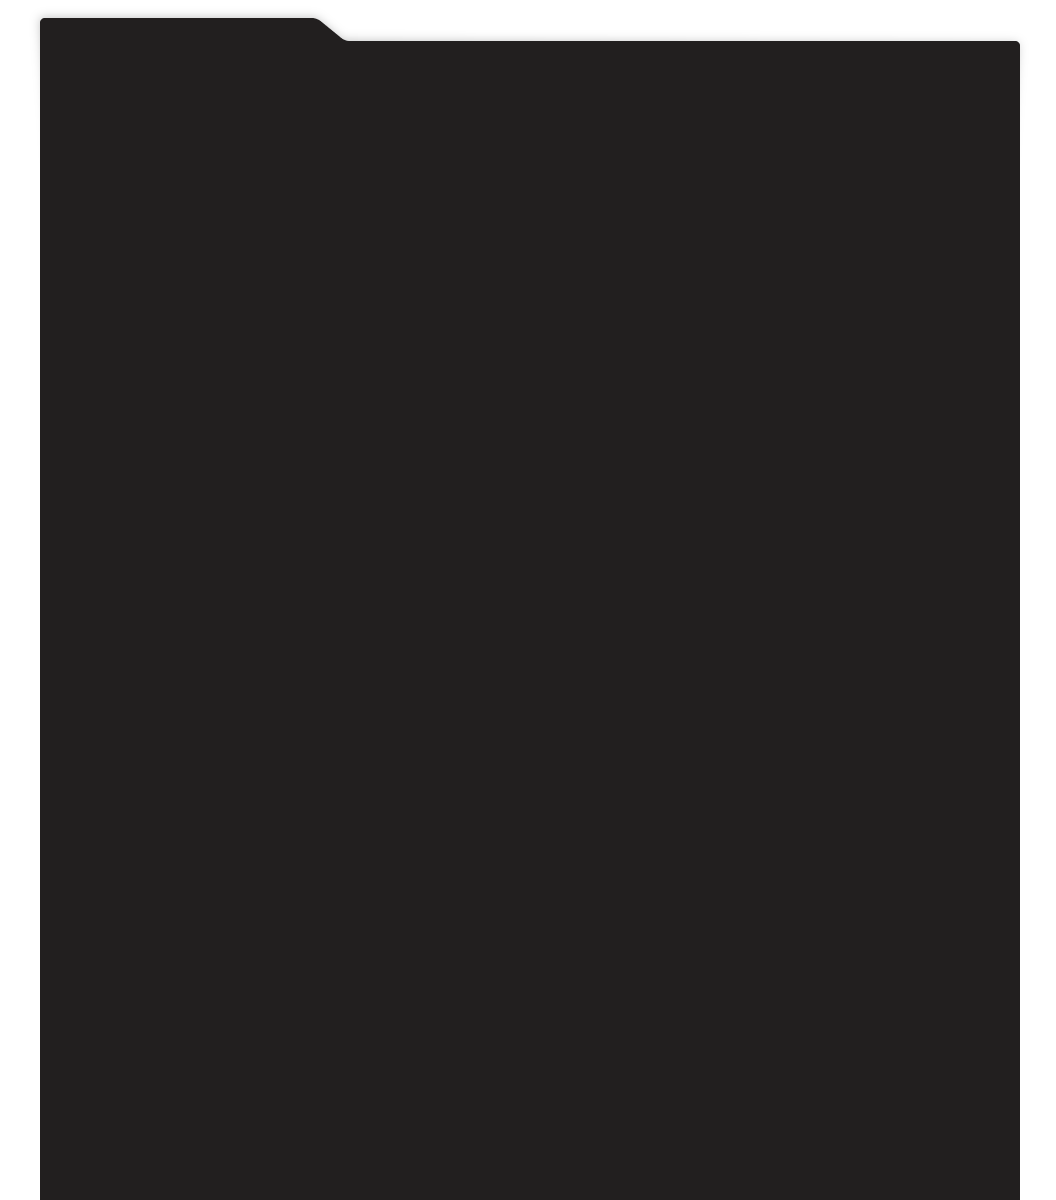
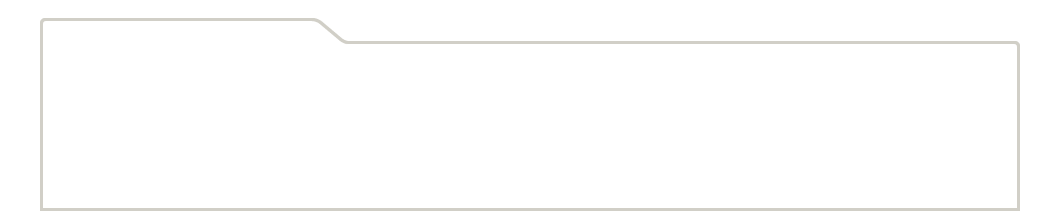
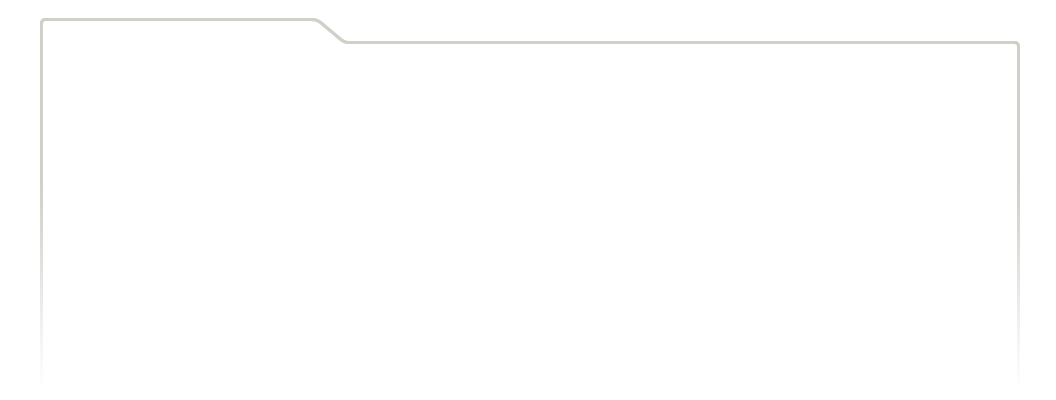
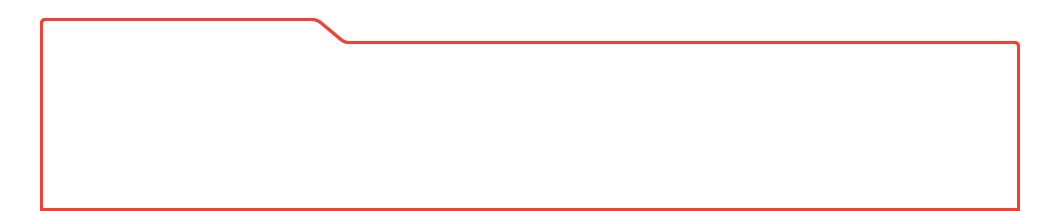
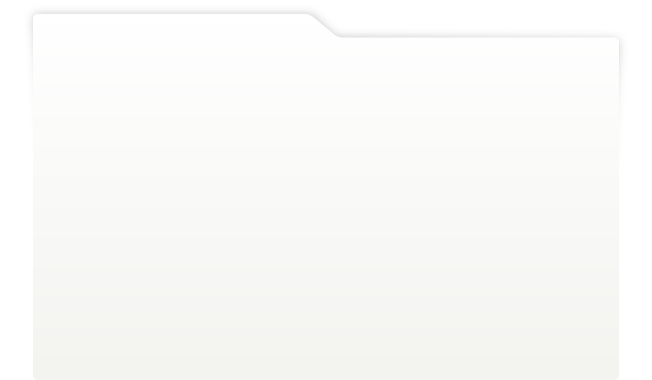
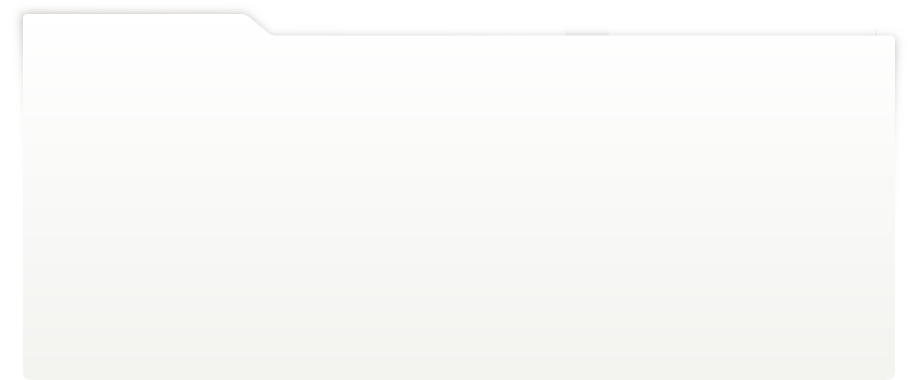
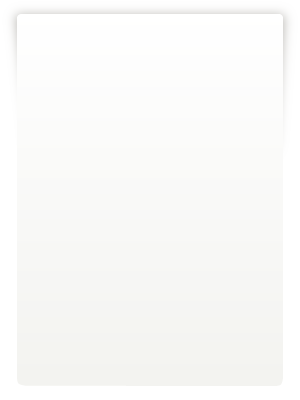
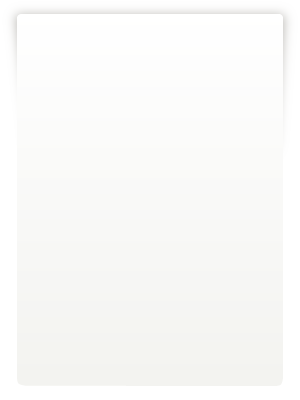
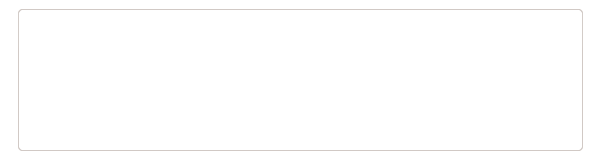
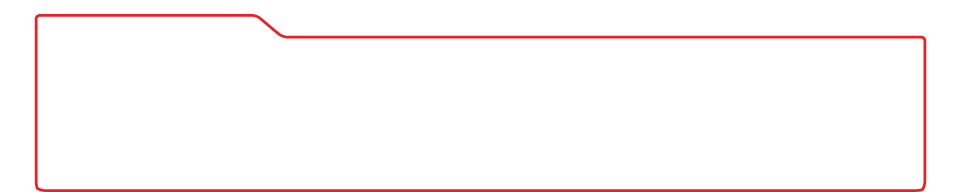
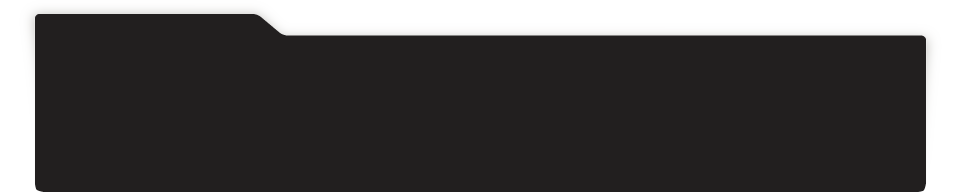
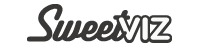
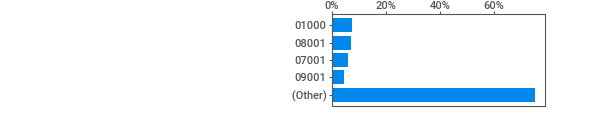
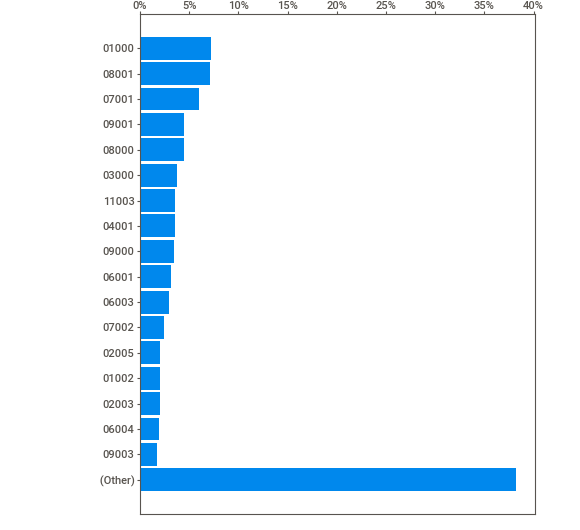
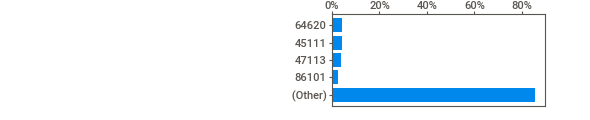
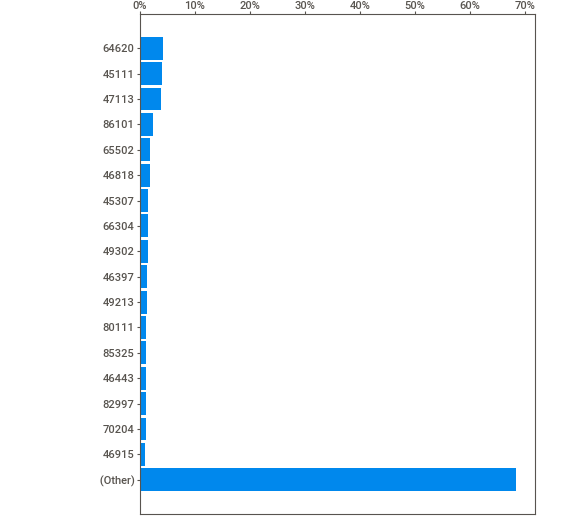
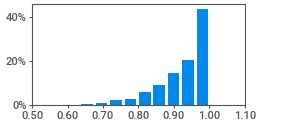
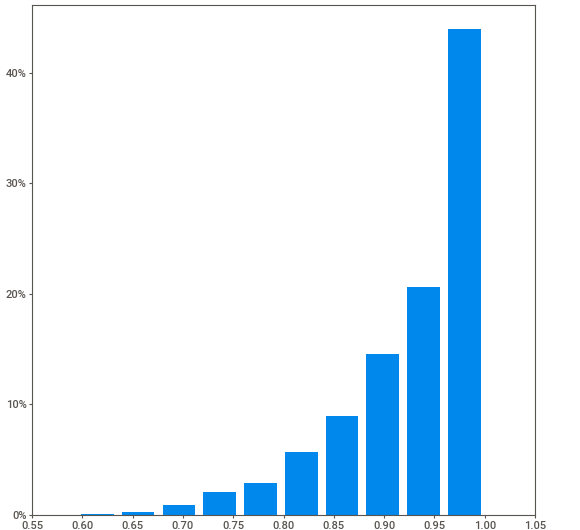
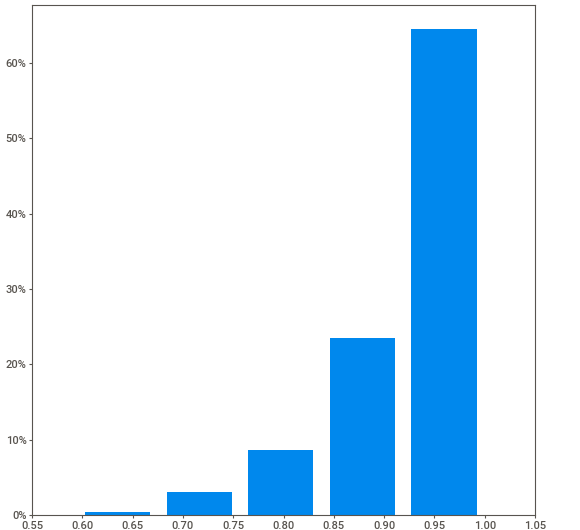
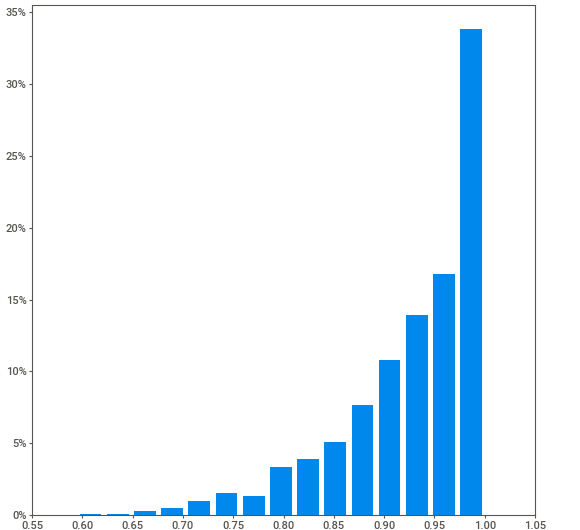
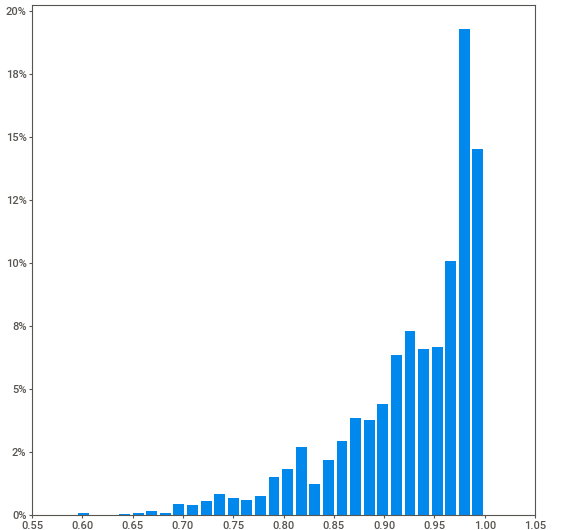
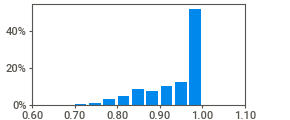
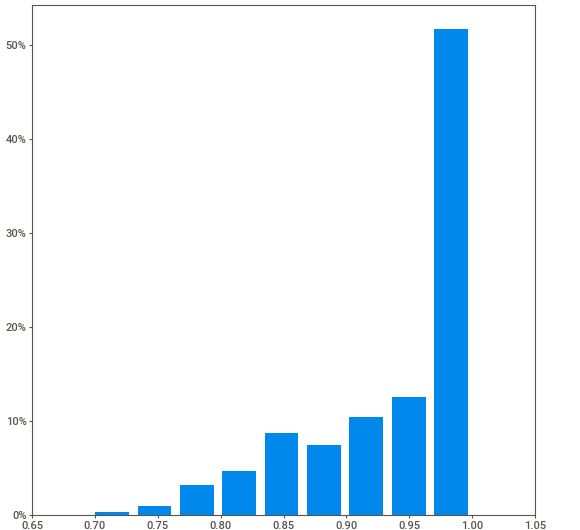
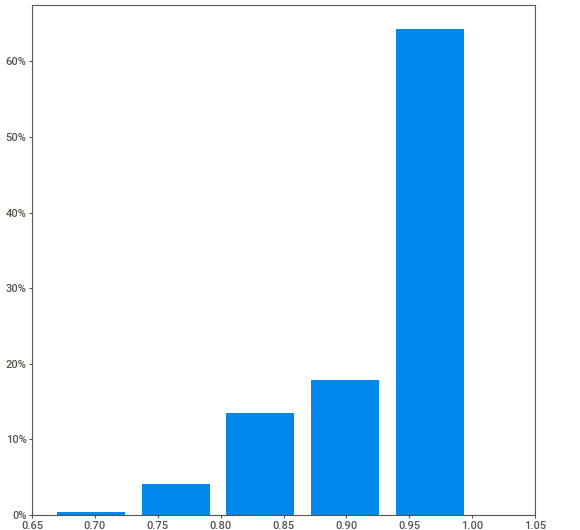
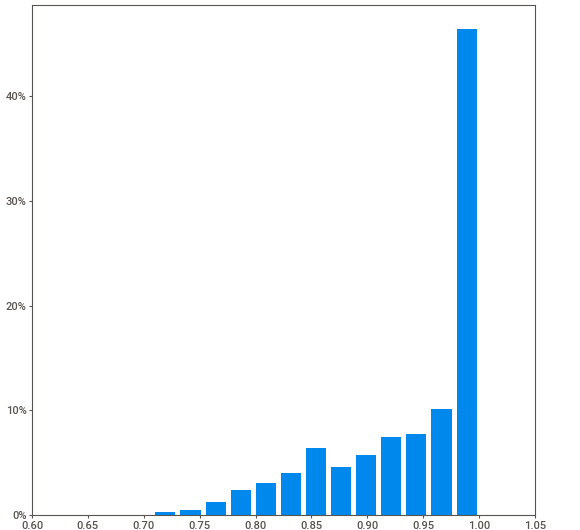
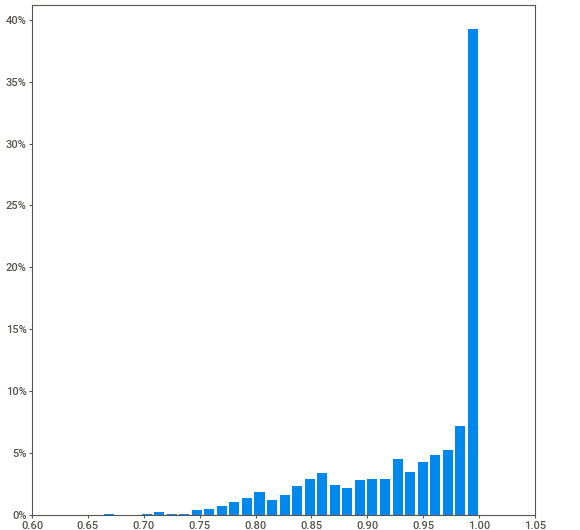
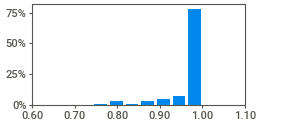
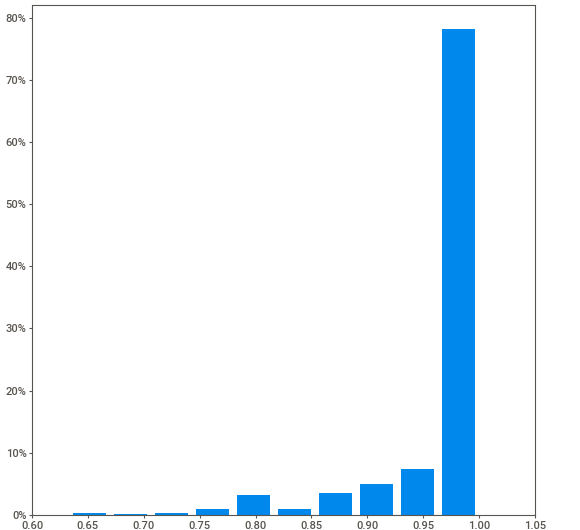
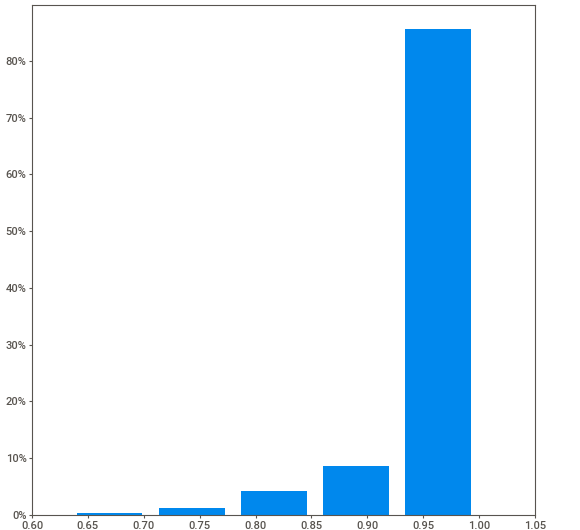
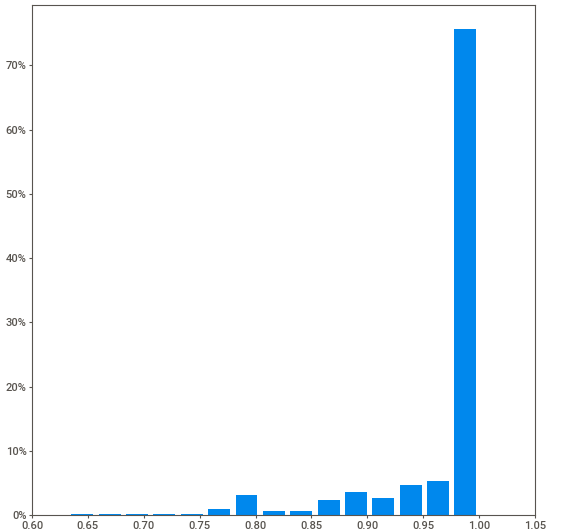
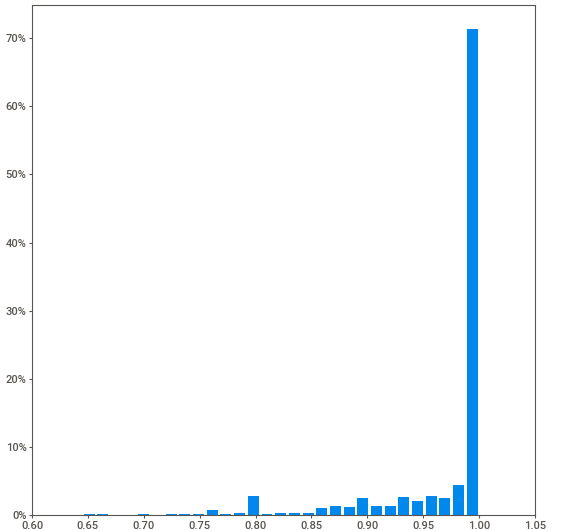
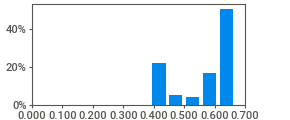
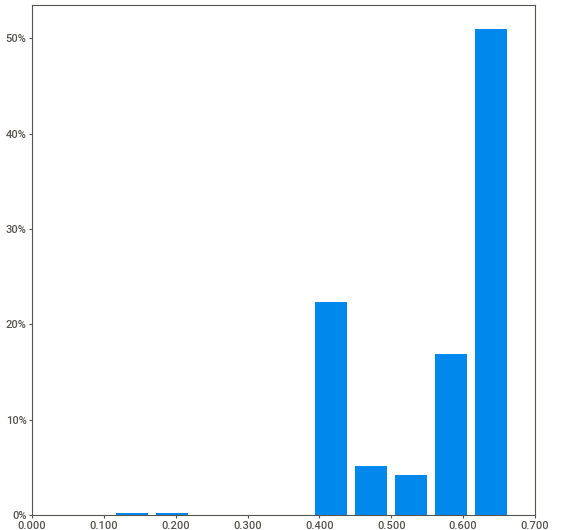
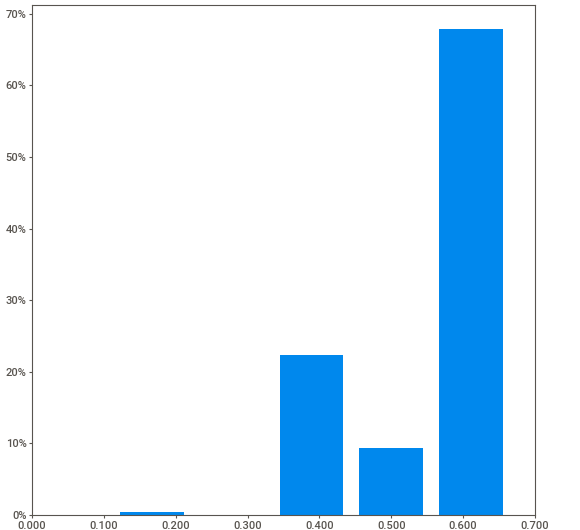
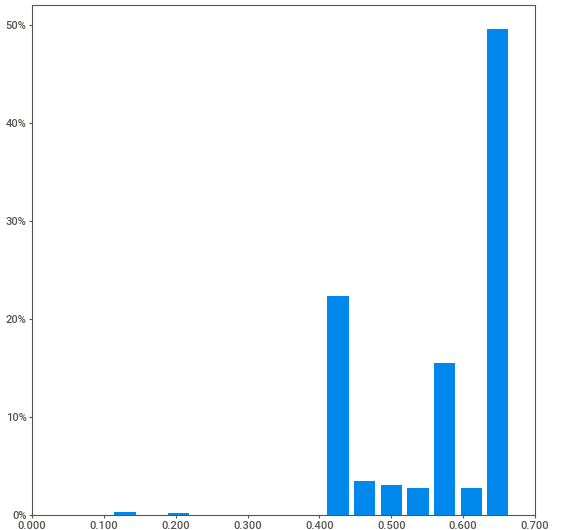
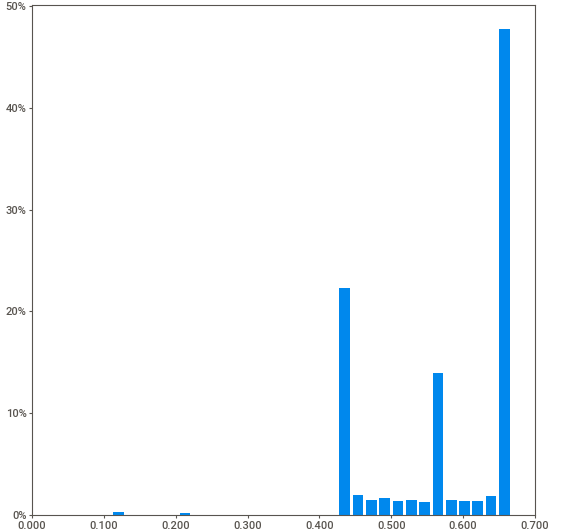
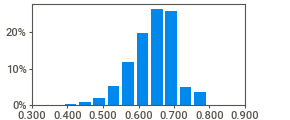
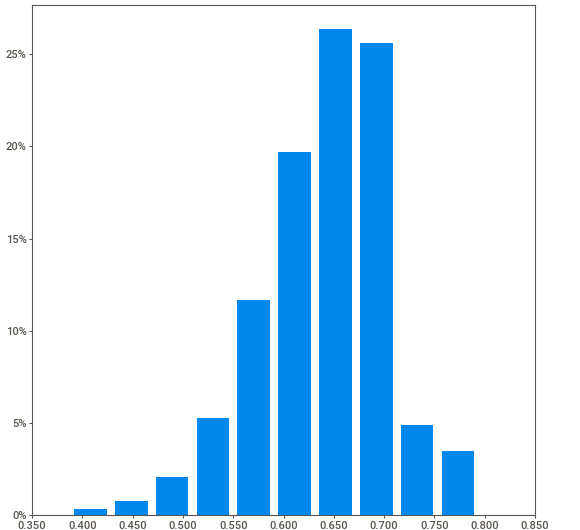
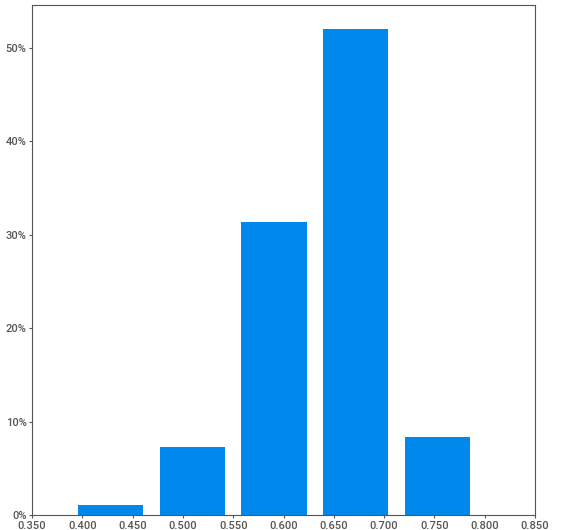
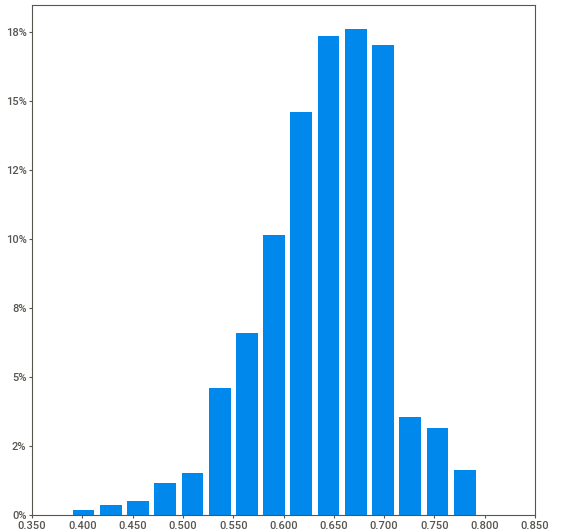
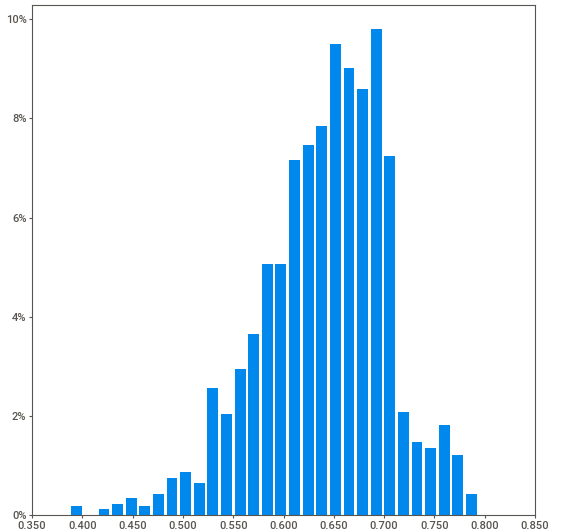
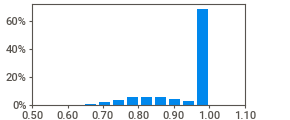
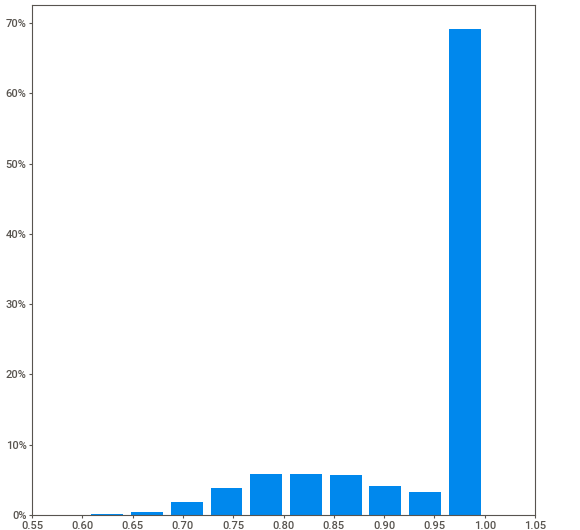
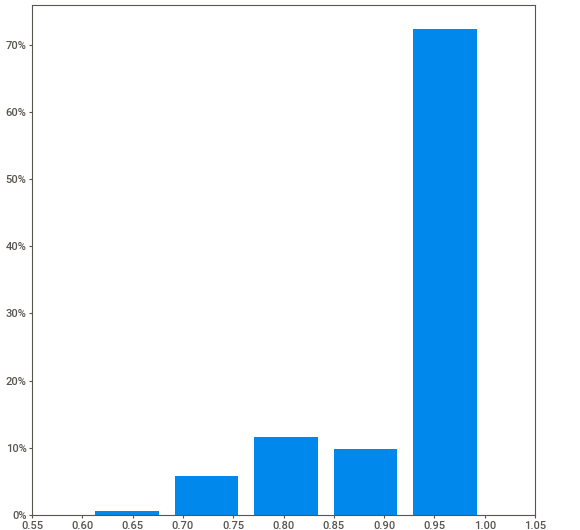
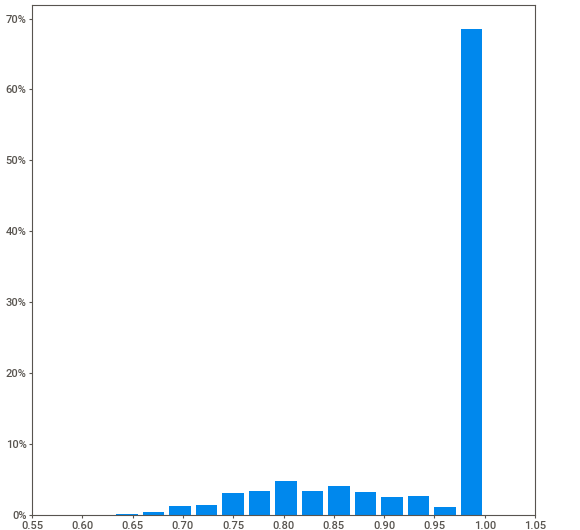
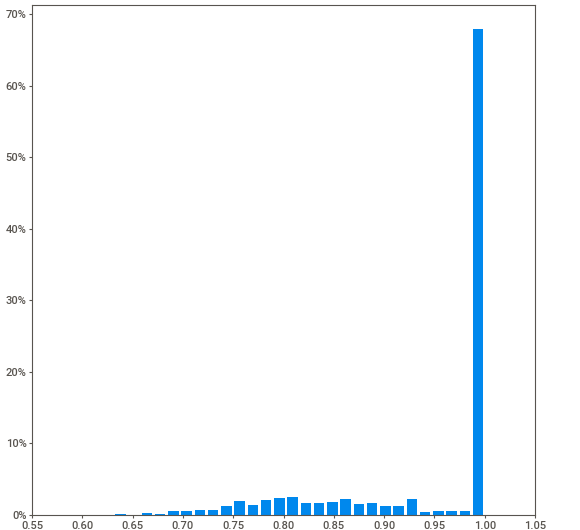
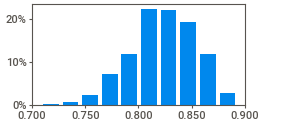
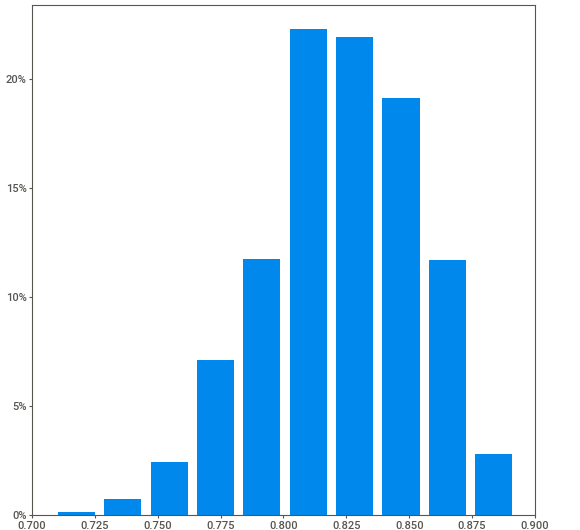
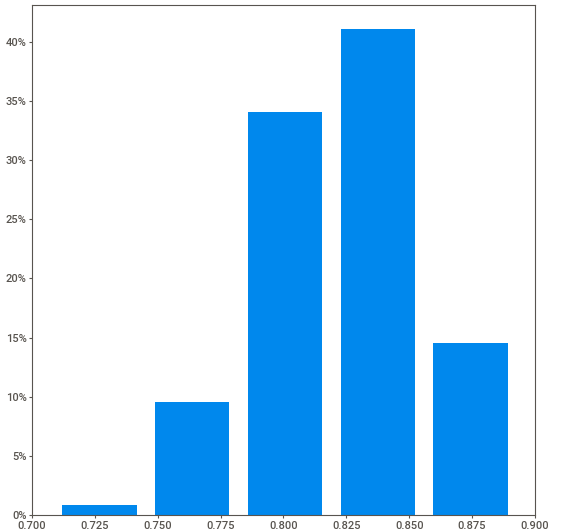
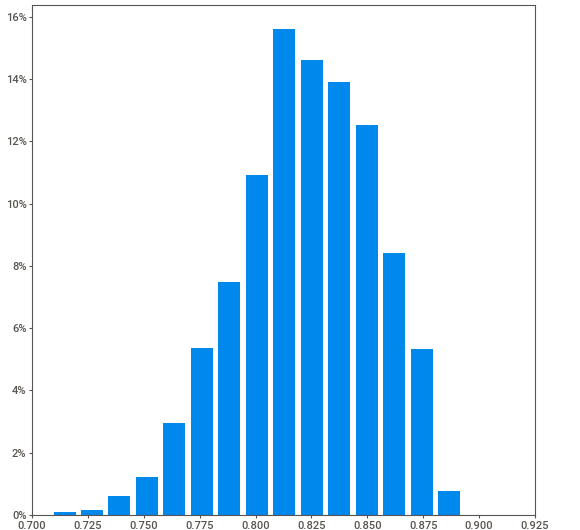
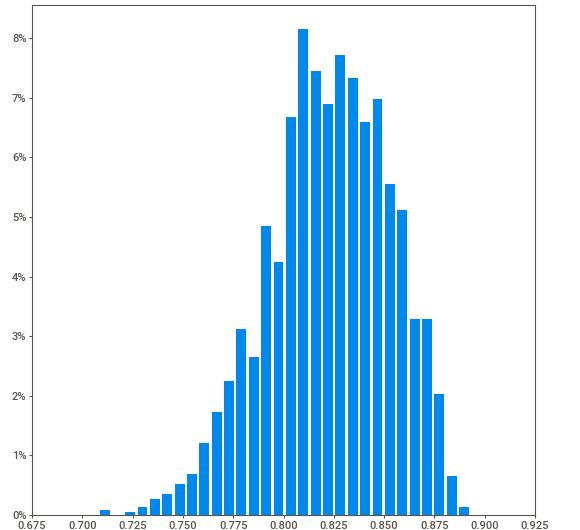
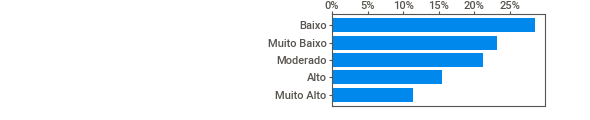
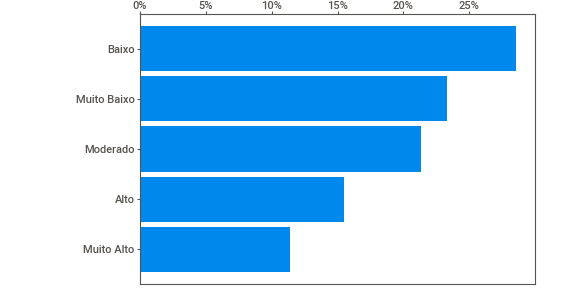
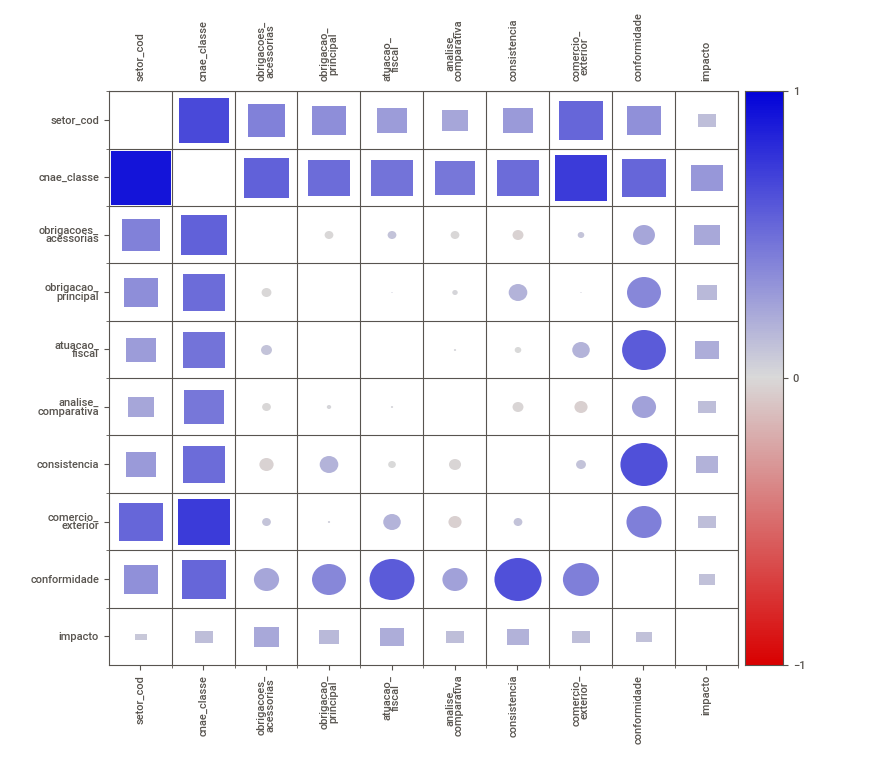
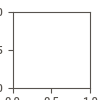

In [29]:
sv_config = sv.FeatureConfig(skip=['cluster'], 
                             
                             force_cat=['setor_cod','cnae_classe','impacto'])

rais_report = sv.analyze(df_kmeans_cl3, feat_cfg=sv_config)

#Salvando o Relatório
rais_report.show_html('Rais_kmeans3.html')

#Mostrando o Relatório
rais_report.show_notebook()

In [30]:
# Analisando Cluster 4
df_kmeans_cl4.describe()

obrigacoes_acessorias  obrigacao_principal  atuacao_fiscal  \
count              1204.0000            1204.0000       1204.0000   
mean                  0.9030               0.6861          0.8929   
std                   0.0822               0.1011          0.1153   
min                   0.5506               0.2777          0.3397   
25%                   0.8635               0.6472          0.8085   
50%                   0.9250               0.7066          0.9256   
75%                   0.9676               0.7461          0.9949   
max                   1.0000               0.9324          1.0000   

       analise_comparativa  consistencia  comercio_exterior  conformidade  \
count            1204.0000     1204.0000          1204.0000     1204.0000   
mean                0.4993        0.7492             0.8918        0.7865   
std                 0.1084        0.1214             0.1056        0.0492   
min                 0.1111        0.4029             0.4635        0.6111   
25%                 0.4444        0.6480             0.8058        0.7561   
50%                 0.4937        0.7612             0.8997        0.7880   
75%                 0.5556        0.8585             1.0000        0.8206   
max                 0.6667        0.9756             1.0000        0.8932   

        cluster  
count 1204.0000  
mean     4.0000  
std      0.0000  
min      4.0000  
25%      4.0000  
50%      4.0000  
75%      4.0000  
max      4.0000

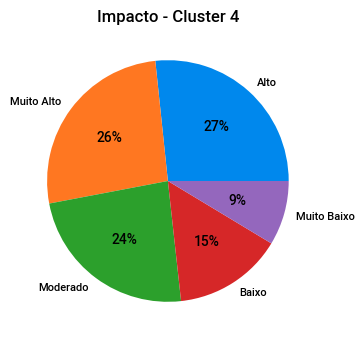

In [31]:
plot_pizza(df_kmeans_cl4, 'impacto', 'Impacto - Cluster 4', 5)

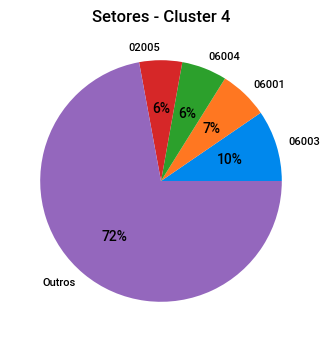

In [32]:
plot_pizza(df_kmeans_cl4, 'setor_cod', 'Setores - Cluster 4', 5)

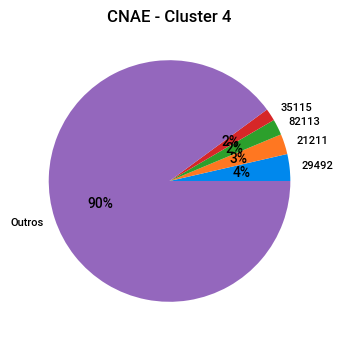

In [33]:
plot_pizza(df_kmeans_cl2, 'cnae_classe', 'CNAE - Cluster 4', 5)


Report Rais_kmeans4.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



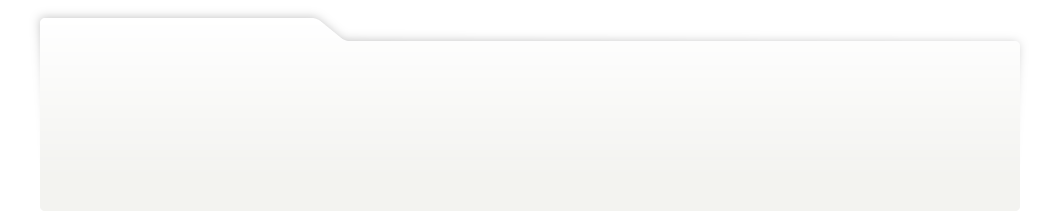
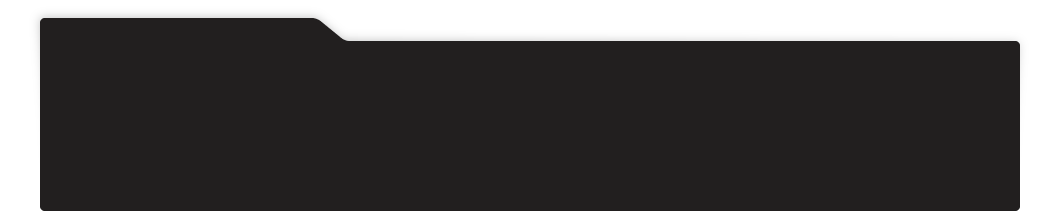
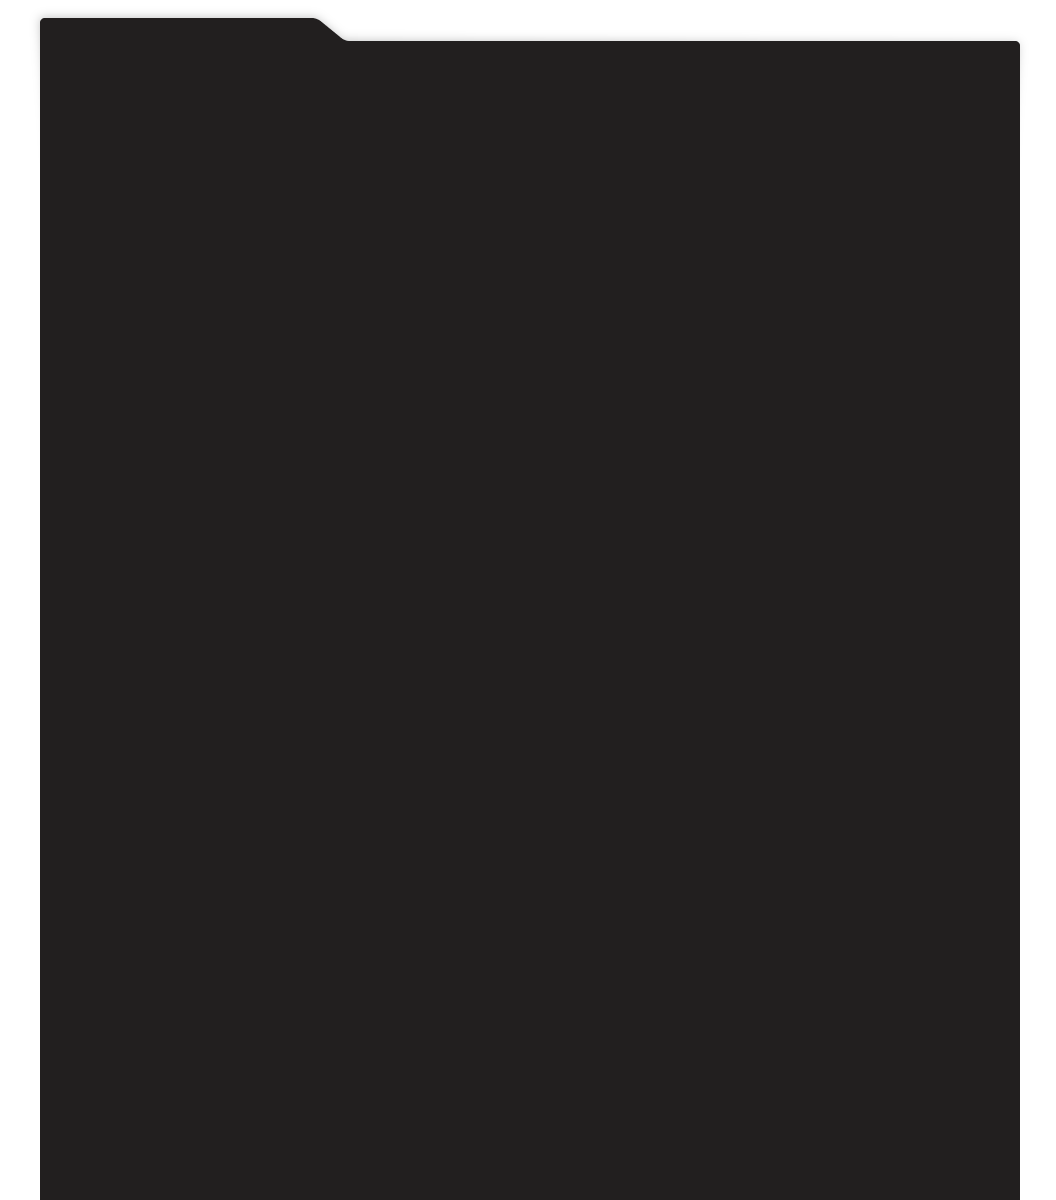
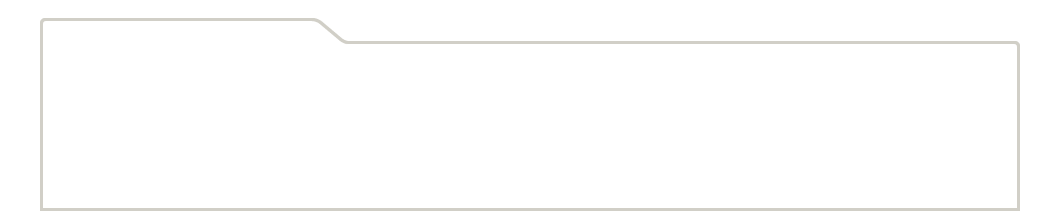
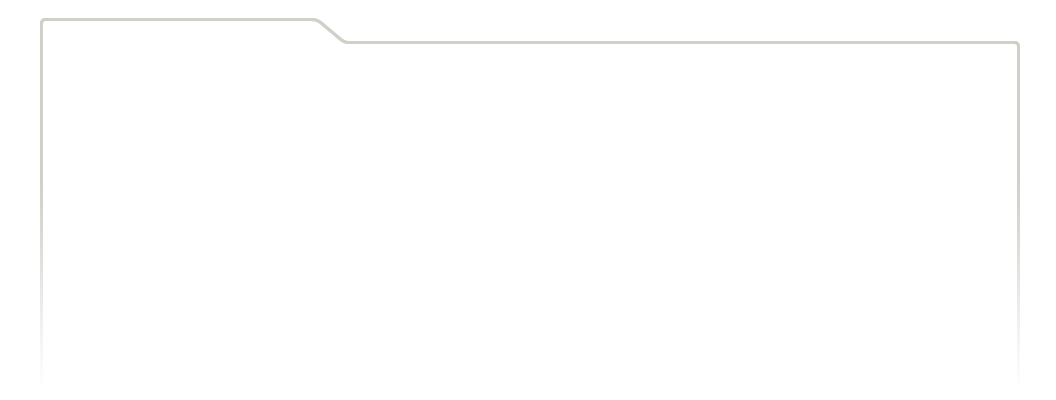
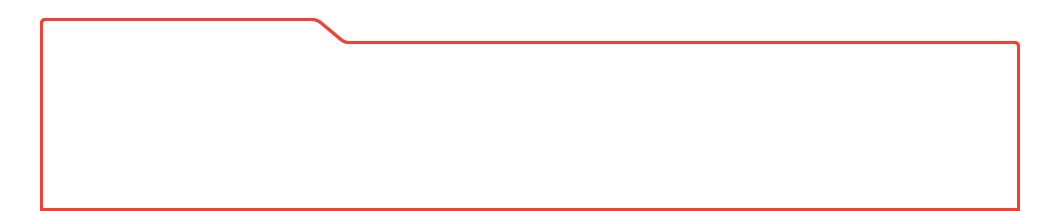
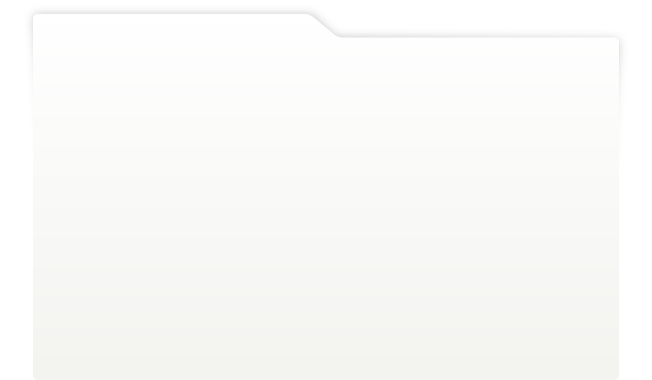
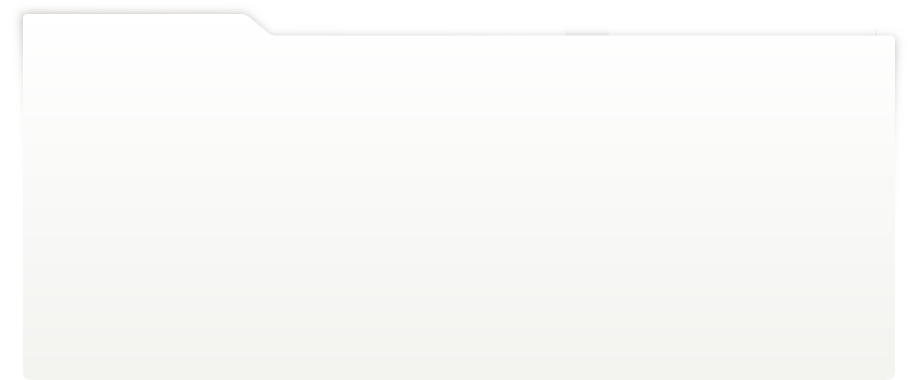
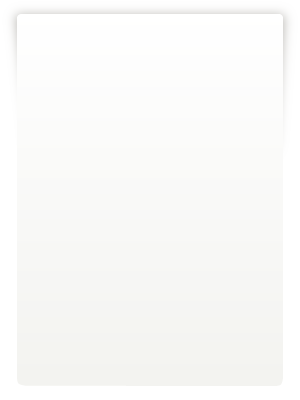
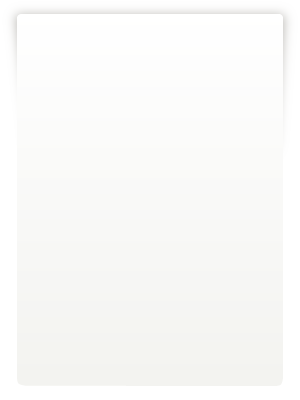
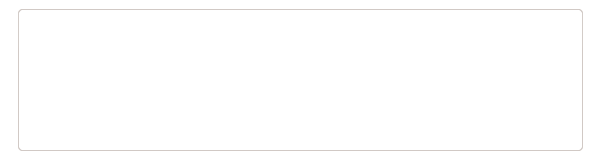
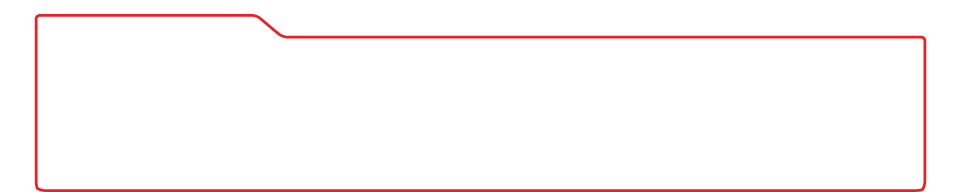
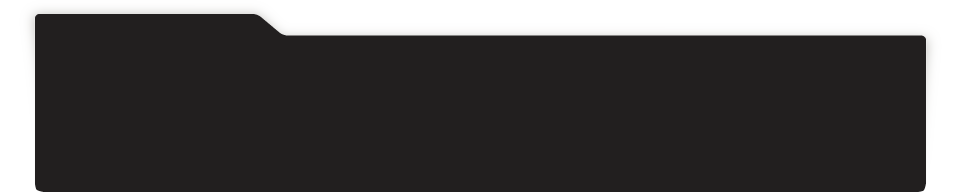
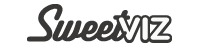
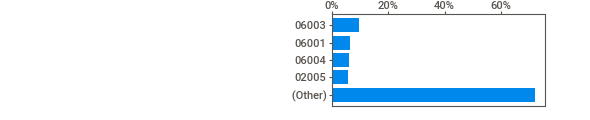
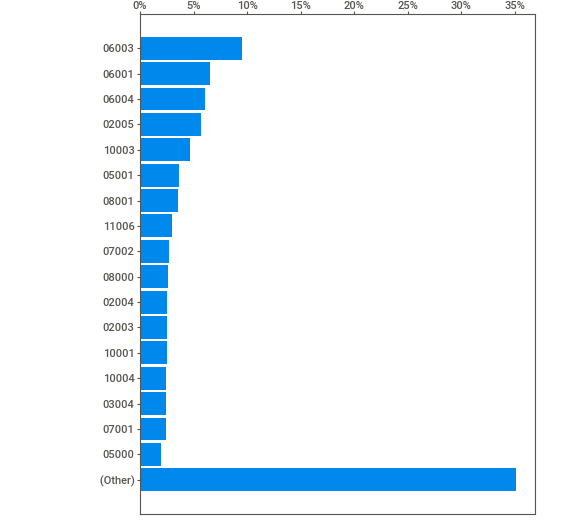
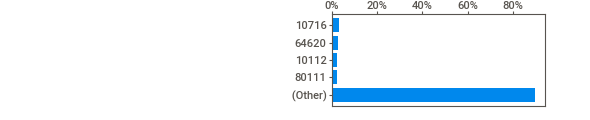
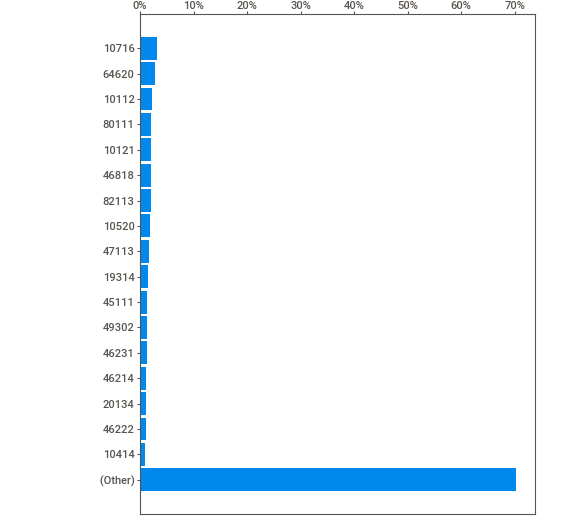
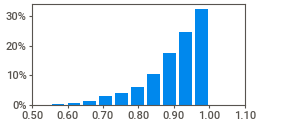
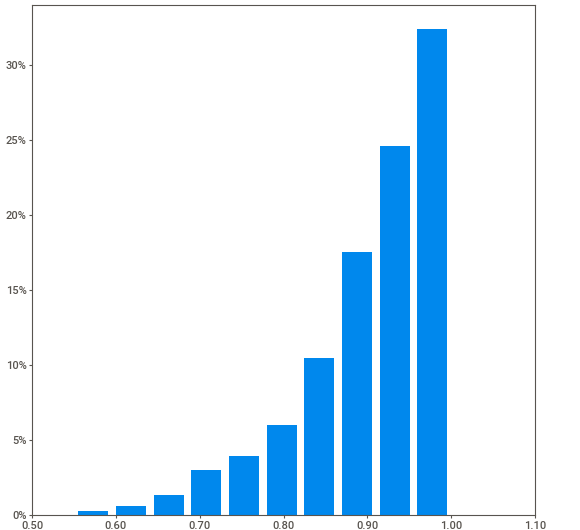
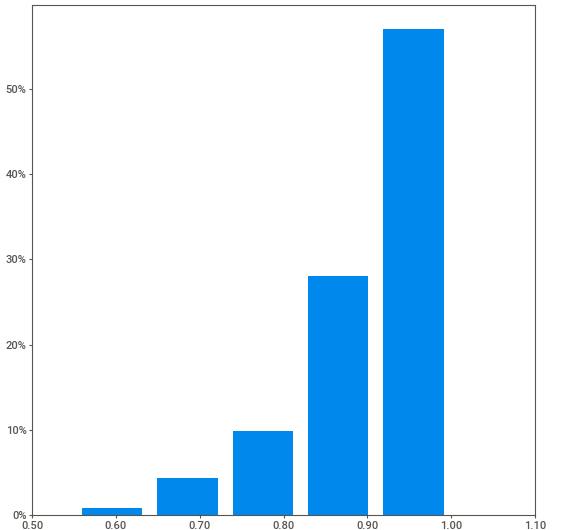
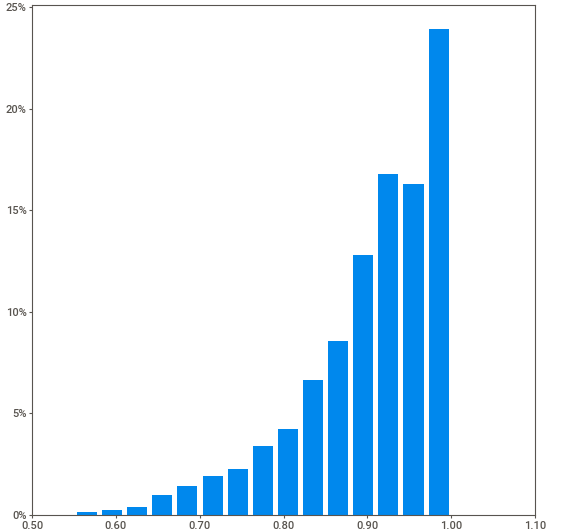
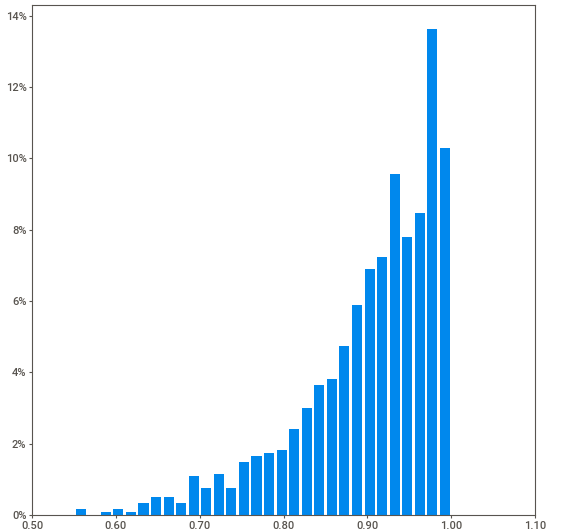
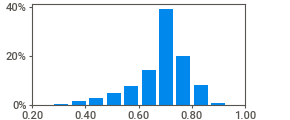
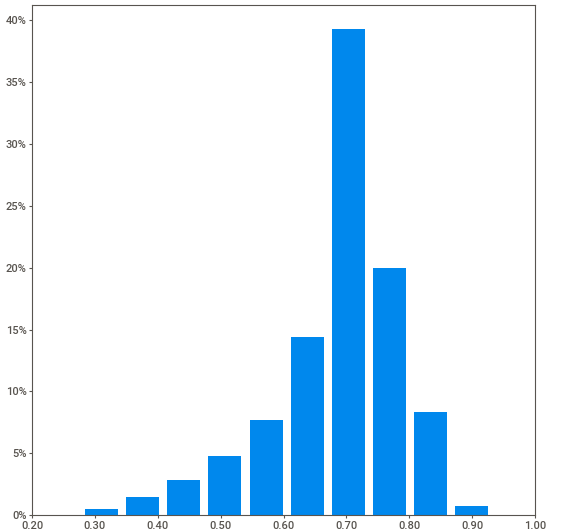
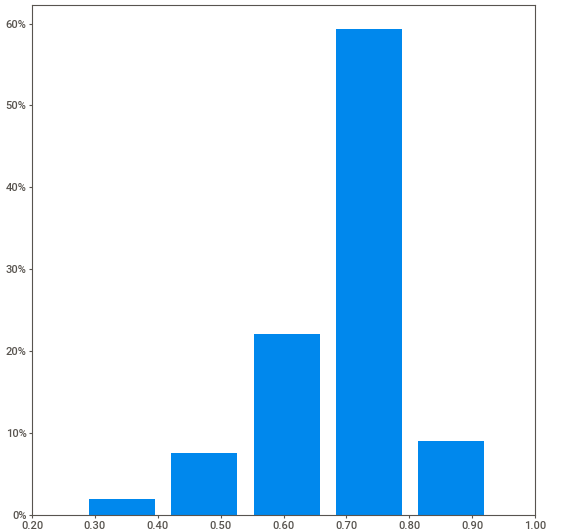
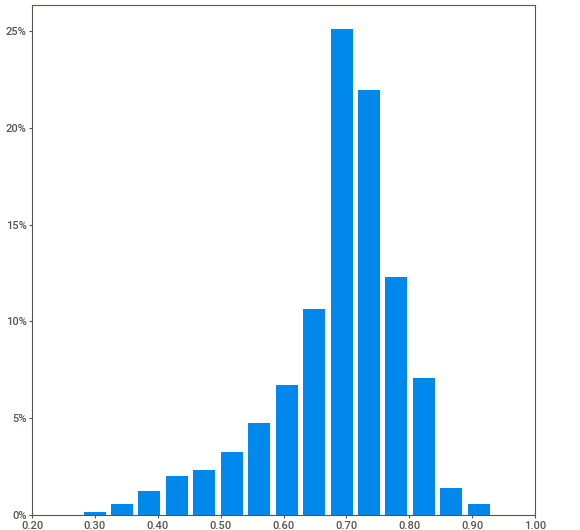
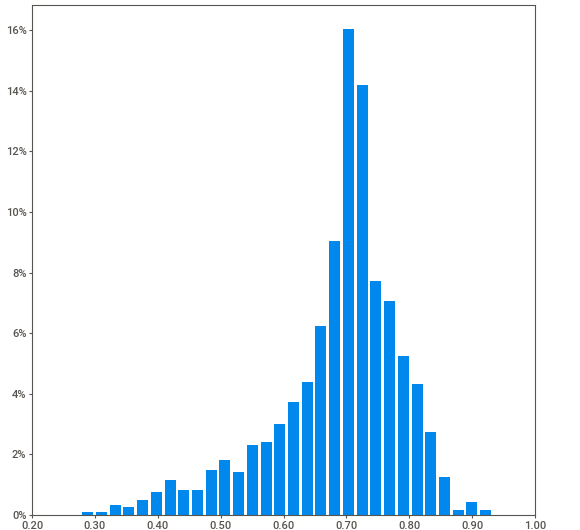
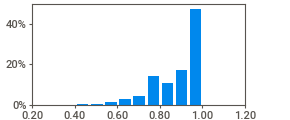
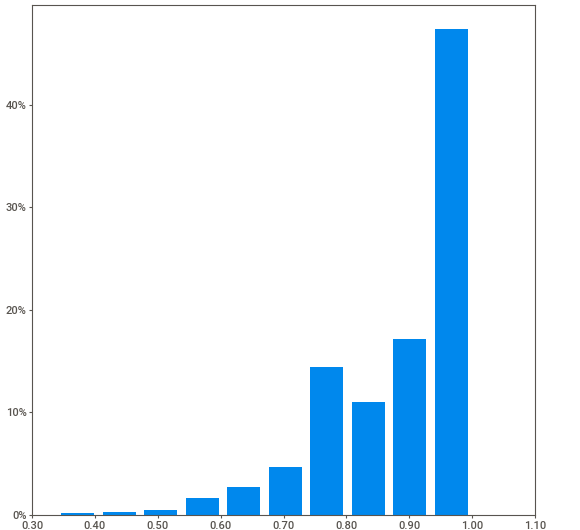
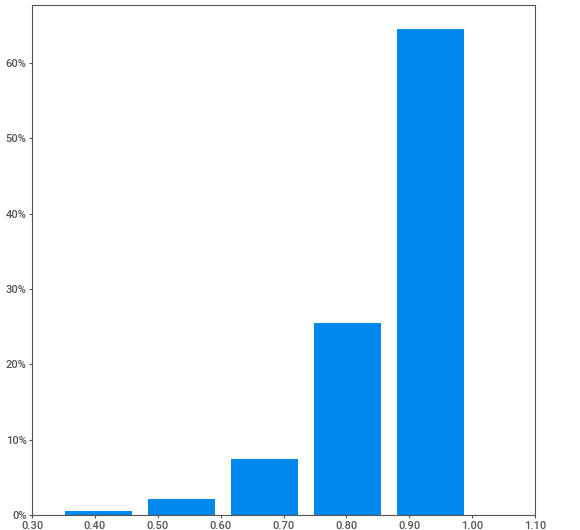
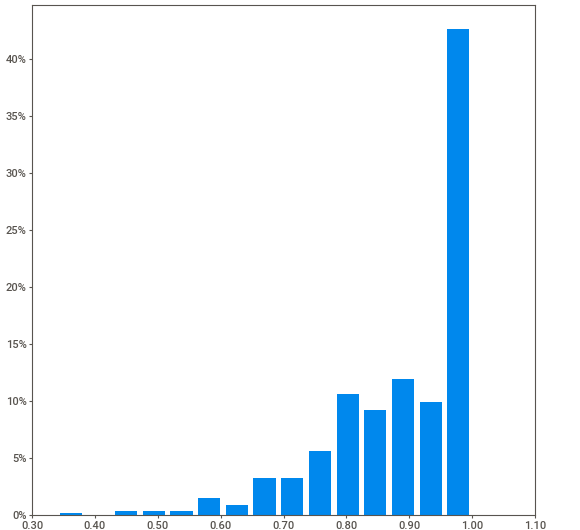
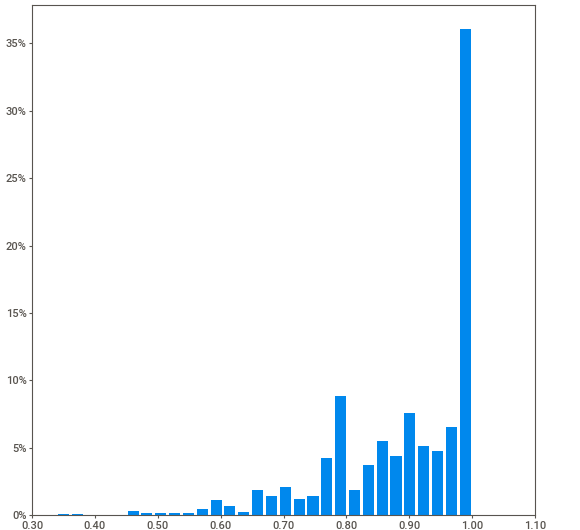
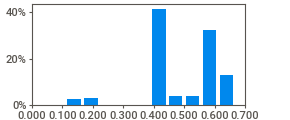
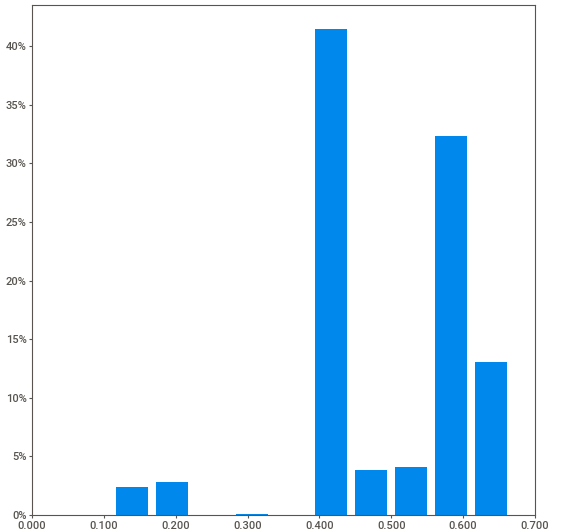
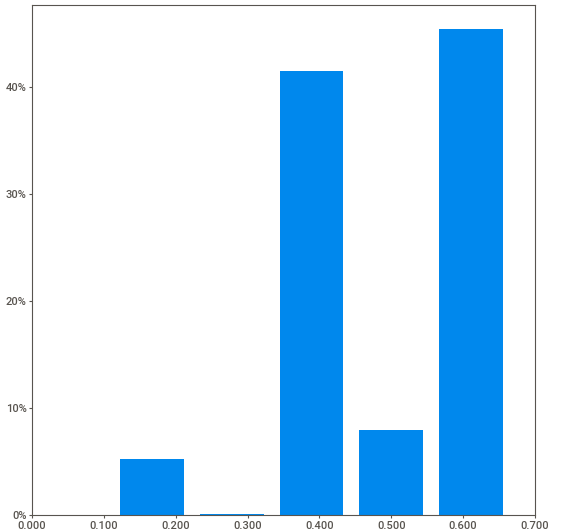
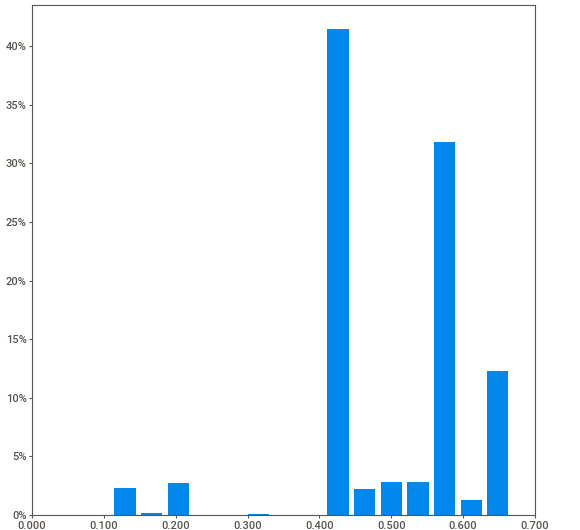
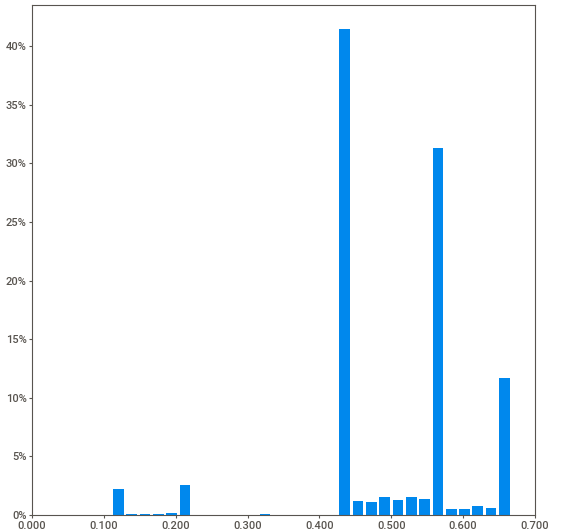
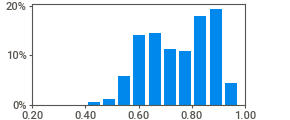
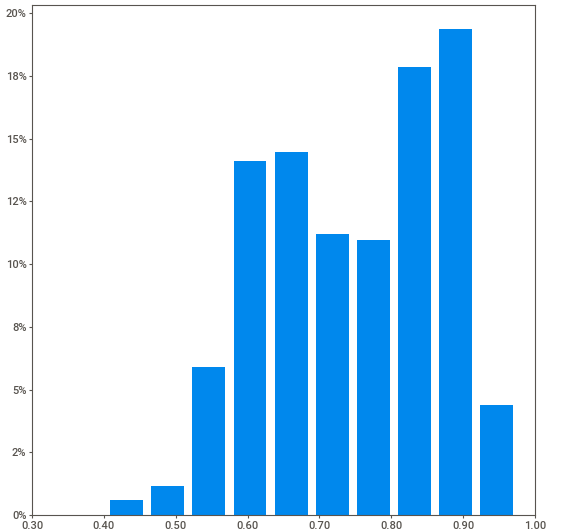
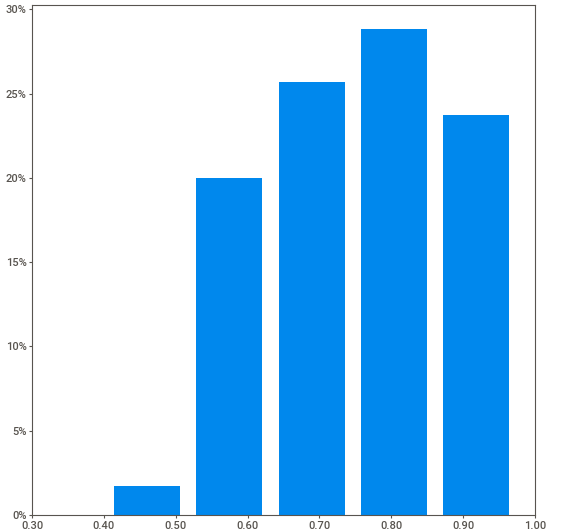
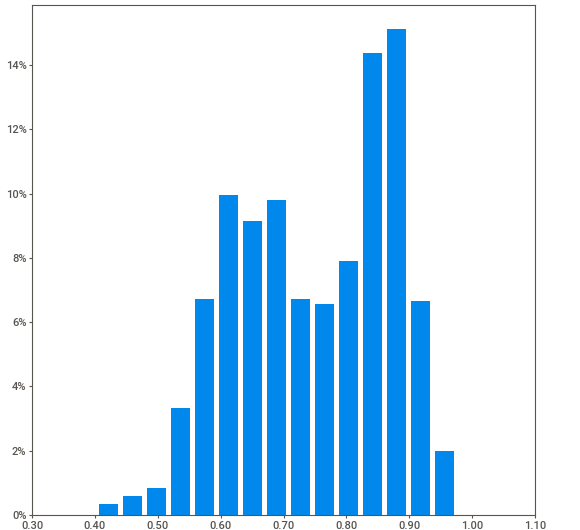
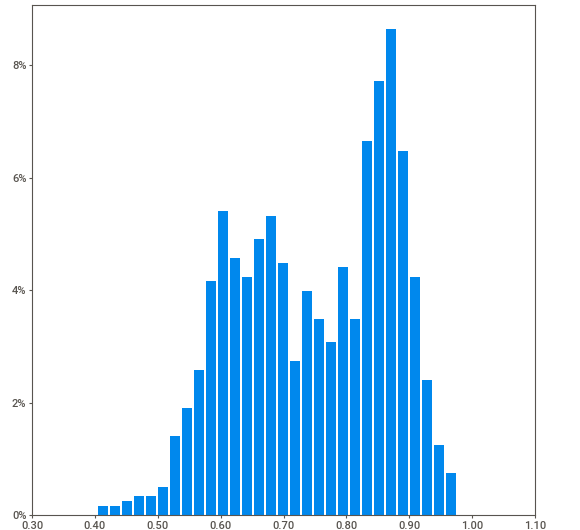
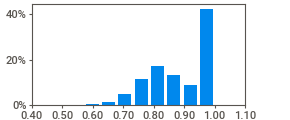
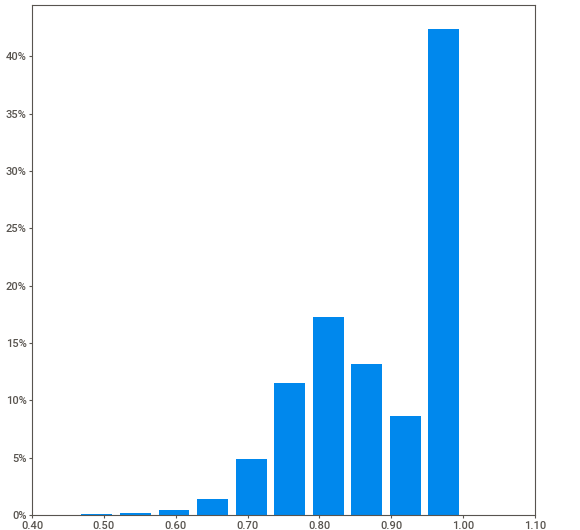
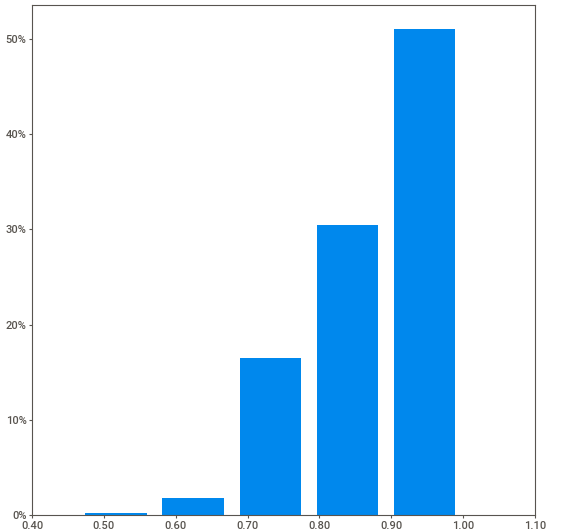
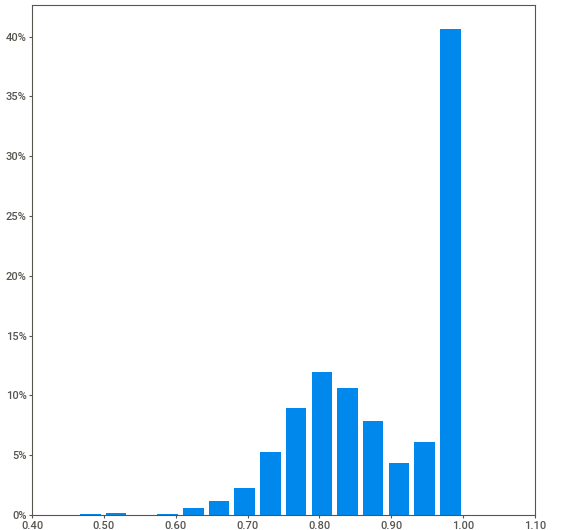
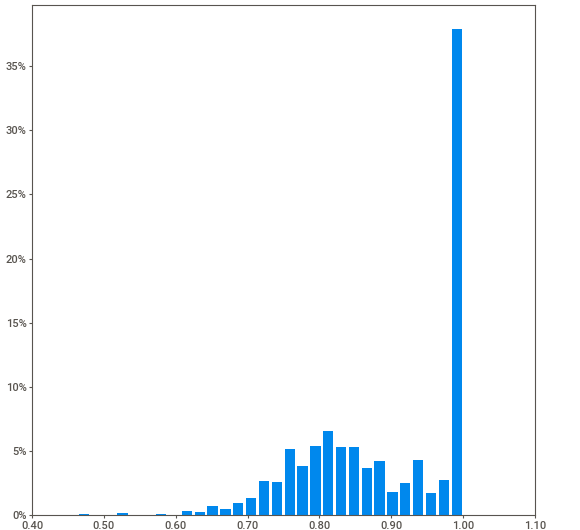
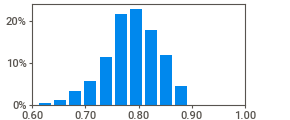
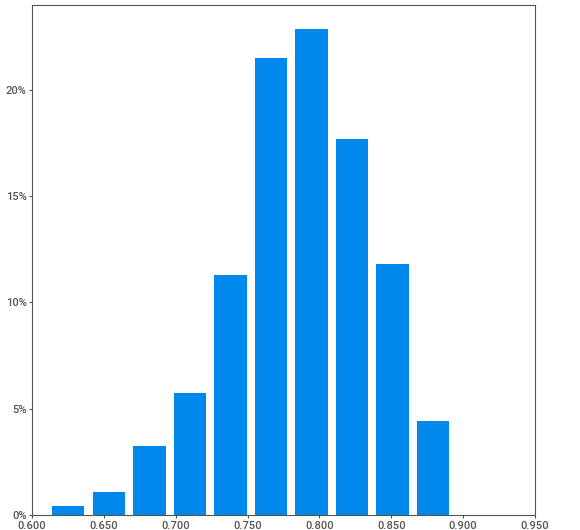
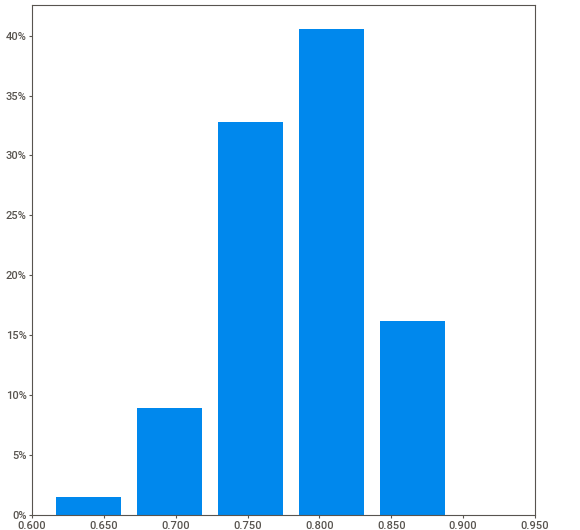
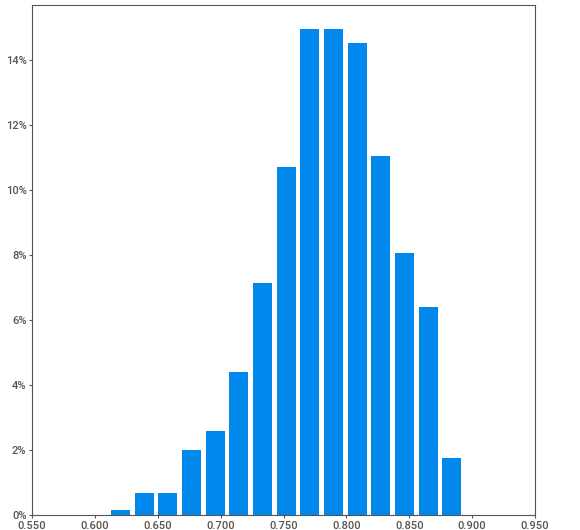
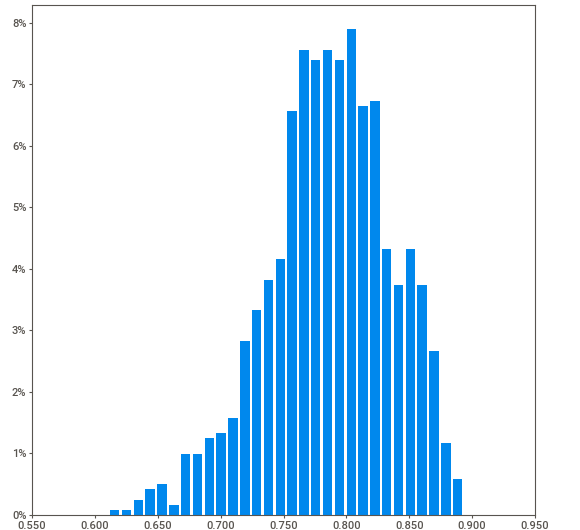
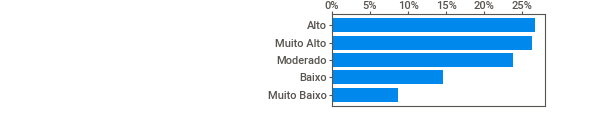
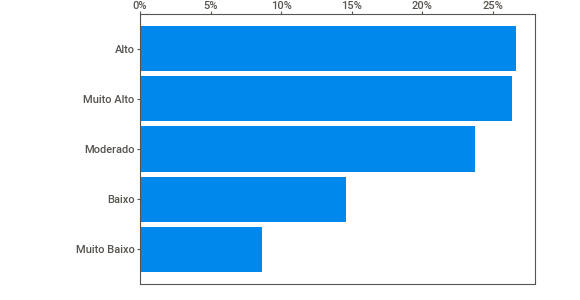
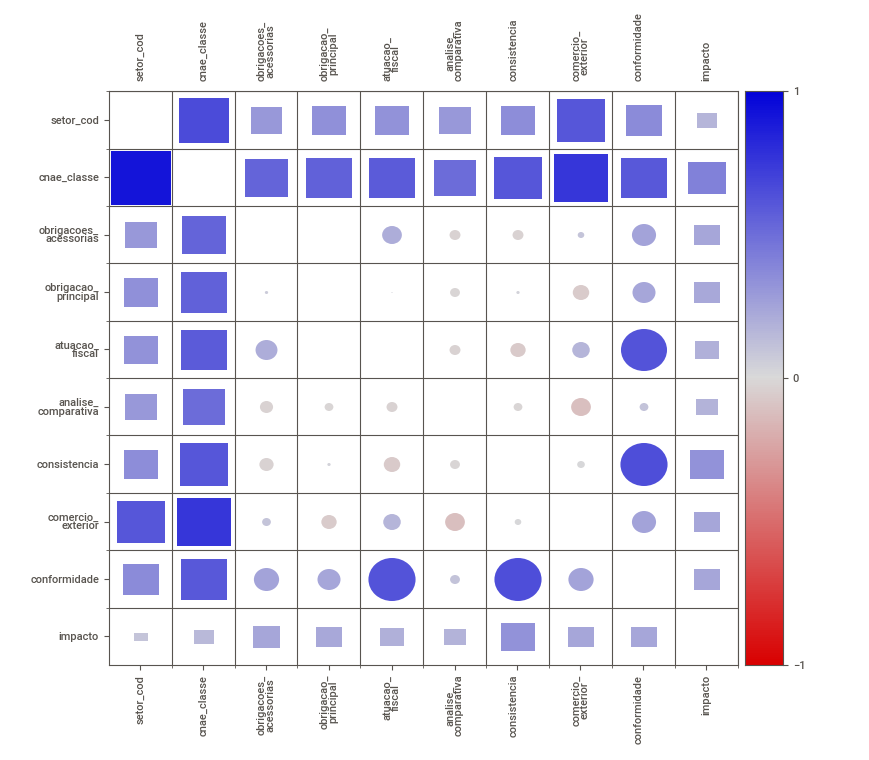
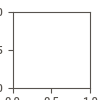

In [34]:
sv_config = sv.FeatureConfig(skip=['cluster'], 
                             
                             force_cat=['setor_cod','cnae_classe','impacto'])

rais_report = sv.analyze(df_kmeans_cl4, feat_cfg=sv_config)

#Salvando o Relatório
rais_report.show_html('Rais_kmeans4.html')

#Mostrando o Relatório
rais_report.show_notebook()

In [35]:
# Salvar o novo dataset após o tratamento realizado nesta etapa
df_kmeans.to_csv('tcc_kmeans.csv', index=False)